# Descrição

Este conjunto de dados contém uma lista de jogos de vídeo com vendas superiores a 100.000 cópias. Foi gerado através da coleta de dados do site vgchartz.com.

Entradas das colunas da matriz (atributos):

1. Rank - Classificação das vendas totais

2.  Name - Classificação das vendas totais

3.  Platform - Plataforma de lançamento dos jogos (PC, PS4, etc.)

4. Year - Ano de lançamento do jogo

5. Genre - Gênero do jogo

6. Publisher - Gênero do jogo

7. NA_Sales -  Vendas na América do Norte (em milhões)

8. EU_Sales -  Vendas na América do Norte (em milhões)

9. JP_Sales - Vendas no Japão (em milhões)

10. Other_Sales - Vendas no resto do mundo (em milhões)

11. Global_Sales - Vendas totais em todo o mundo.

















# Bibliotecas

In [ ]:
import os
import numpy as np # algebra linear
import pandas as pd # para o processamento de dados
import warnings # modificar as mensagens de erro
from google.colab import drive


# bibliotecas para exibição
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


# Bibliotecas para métodos matemáticos
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


# Importação de modelos inteligentes
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Revisão dos Dados

In [ ]:
# Leitura e exibição dos dados
df=pd.read_csv('/content/drive/MyDrive/Inteligencia_Computacional/ProjetoFinal/vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

Obtenha as características e rótulos do DataFrame (conjunto de dados). As características são todas as colunas exceto 'status', e os rótulos são aqueles na coluna 'status'.

In [ ]:
# Dados das colunas do dataframe criado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Descrição dos dados armazenados no dataframe
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [ ]:
# Verificação dos dados nulos presentes na tabela
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Verificando duplicatas

In [ ]:
# Verificação dos dados duplicados.
len(df)-len(df.drop_duplicates())

0

# Pré Processamento dos Dados

In [ ]:
# Retirando os dados nulos
# Pouca influencia devido a baixa ocorrência de dados nulos
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)


In [ ]:
df.describe()


Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [ ]:
df.head()


Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# Análise Manual dos Dados

<ipython-input-1350-4122688511d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'],color='green')


<Axes: xlabel='Year', ylabel='Density'>

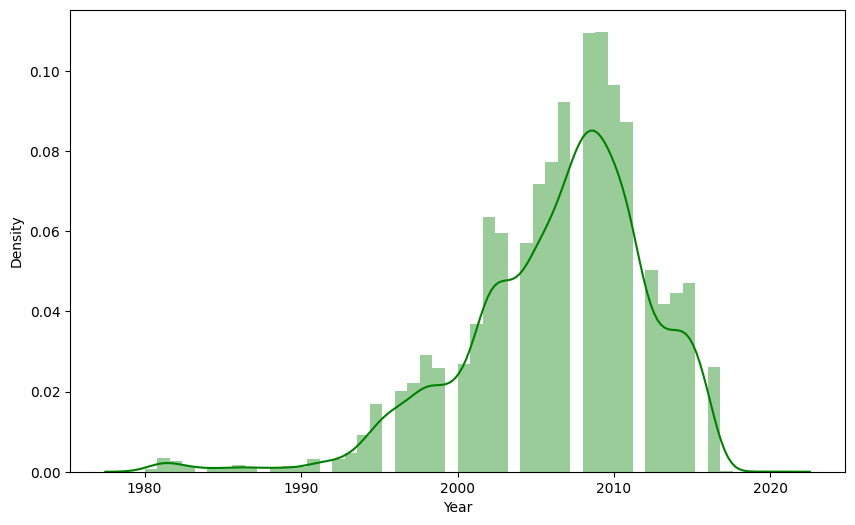

In [ ]:
# Criando gráfico para a ocorrência dos anos de lançamento
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='green')

O pico de lançamento de jogos é em 2009.


-------------------------------------------------------------

**Vendas de diferentes gêneros na América do Norte.**

Text(0.5, 1.0, 'Vendas de diferentes Gêneros na América do Norte')

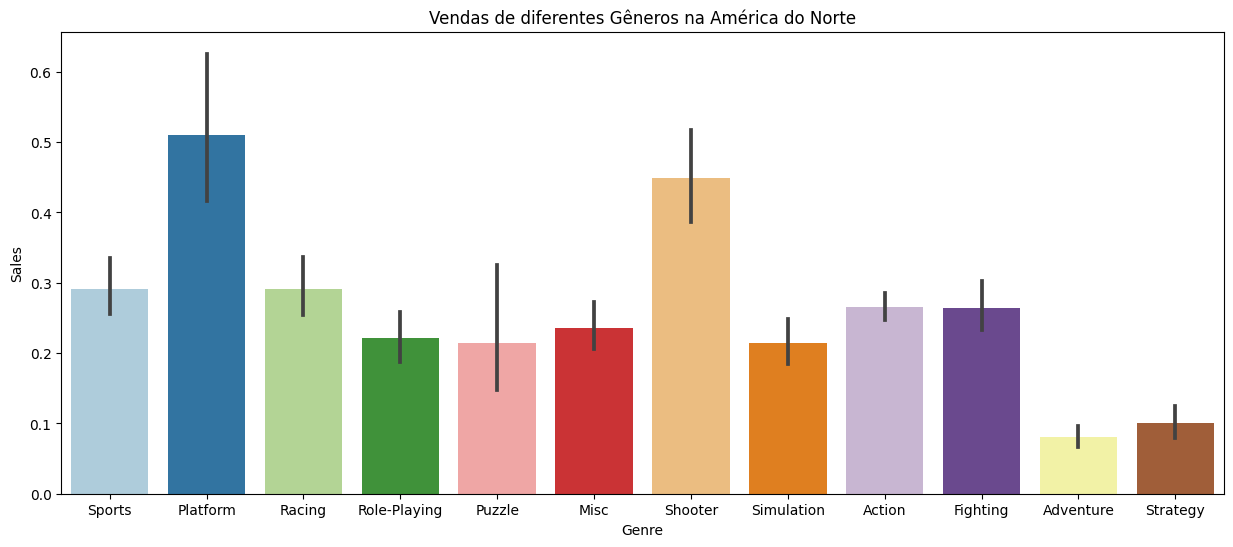

In [ ]:
# Criando gráfico entre a venda dos jogos e o Gênero
# Para a América do Norte.
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Vendas de diferentes Gêneros na América do Norte')

Jogos de plataforma e tiro (shooter) são os gêneros de jogo mais jogados na América do Norte.

---------------------------------------------------------

**Vendas de diferentes gêneros globalmente.**

Text(0.5, 1.0, 'Vendas de diferentes gêneros Globalmente.')

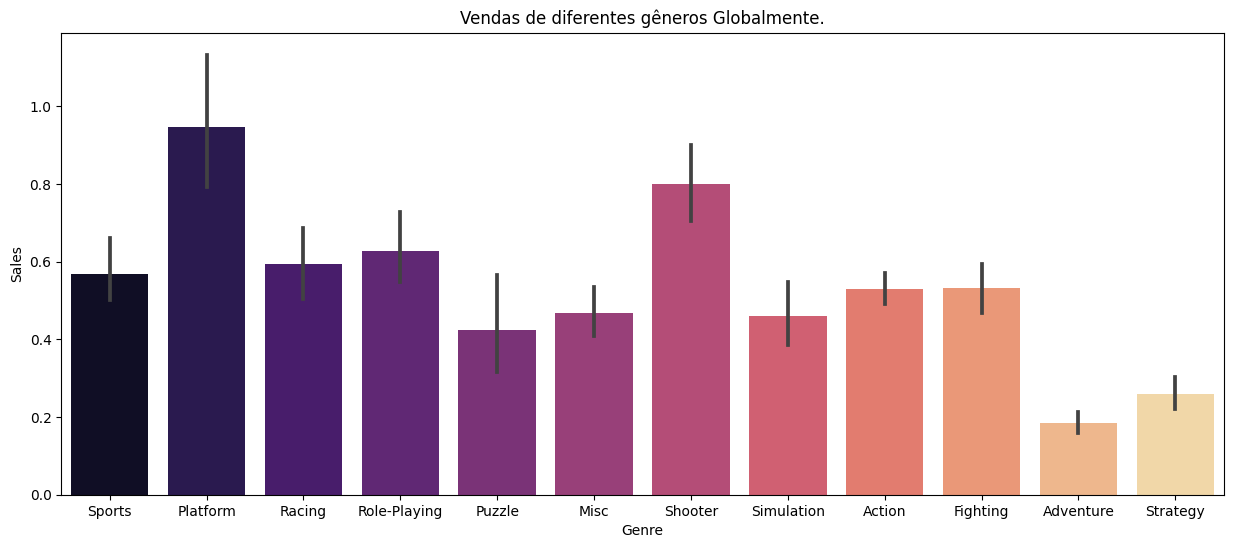

In [ ]:
# Criando gráfico entre a venda dos jogos e o Gênero
# Para o Mundo todo.
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Global_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Vendas de diferentes gêneros Globalmente.')

Jogos de plataforma e tiro (shooter) são os gêneros de jogo mais jogados globalmente.


---------------------------------------


Top 5 anos de lançamento de jogos por gênero.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011')])

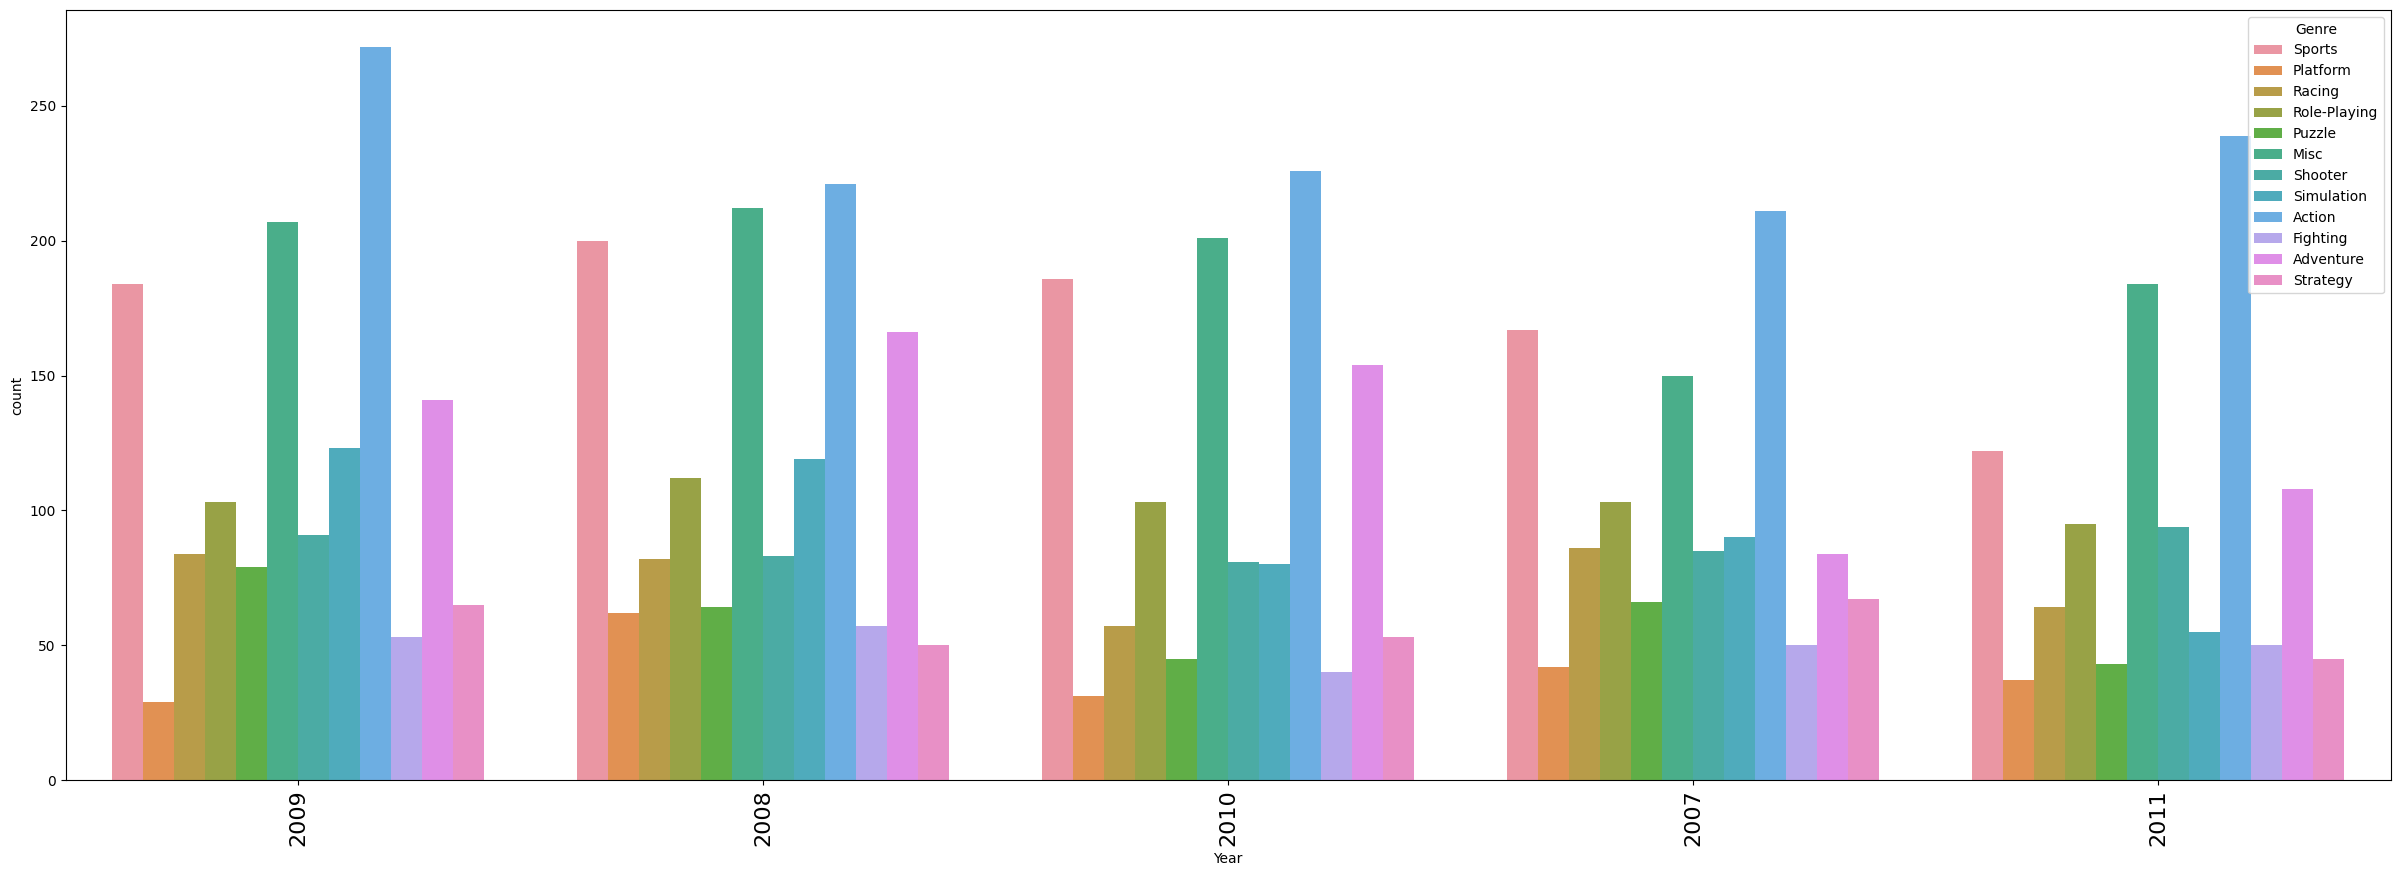

In [ ]:
# Criando gráfico para análise
# Para os 5 anos com mais lançamentos
# Em relação ao lançamento por gênero
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

-----------------------------------------------------------

Frequência de diferentes gêneros.



Text(0.5, 1.0, 'Frequência de Diferentes Gêneros.')

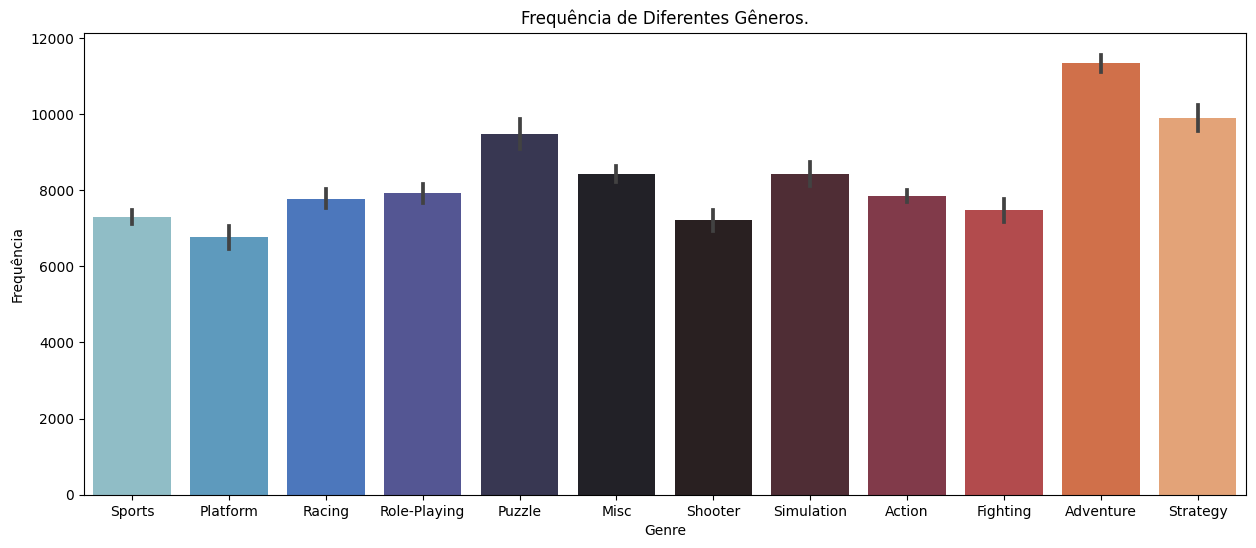

In [ ]:
# Criando gráfico entre o lançamento e os Gêneros dos jogos.
a=np.arange(1,16292)
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y=a,data=df,palette='icefire')
plt.ylabel('Frequência')
plt.title('Frequência de Diferentes Gêneros.')

Jogos de aventura e estratégia são os mais numerosos no conjunto de dados.


------------------------------------------------------

Vendas globais ao longo dos anos.

Text(0.5, 1.0, 'Vendas Globais ao longo dos anos.')

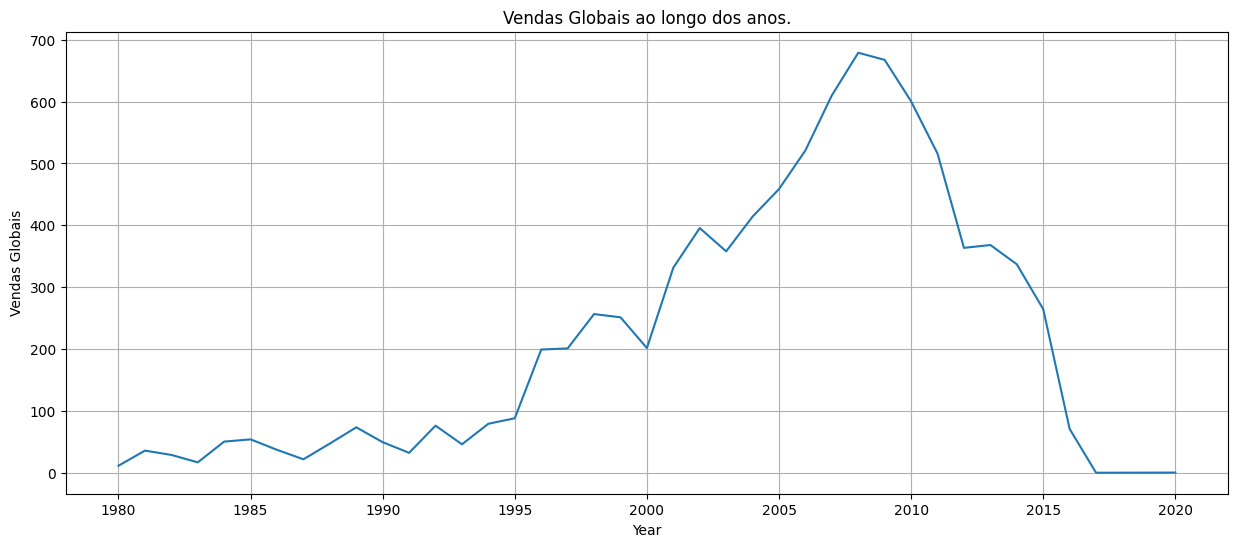

In [ ]:
# Criando gráfico entre as vendas globais
# e os anos de lançamento
ax=plt.figure(figsize=(15,6))
df.groupby(['Year'])['Global_Sales'].sum().plot()
plt.grid()
plt.ylabel('Vendas Globais')
plt.title('Vendas Globais ao longo dos anos.')

As vendas mais altas foram registradas de 2007 a 2010.


----------------------------------------------------------

Qual gênero de jogo vendeu mais em um único ano?

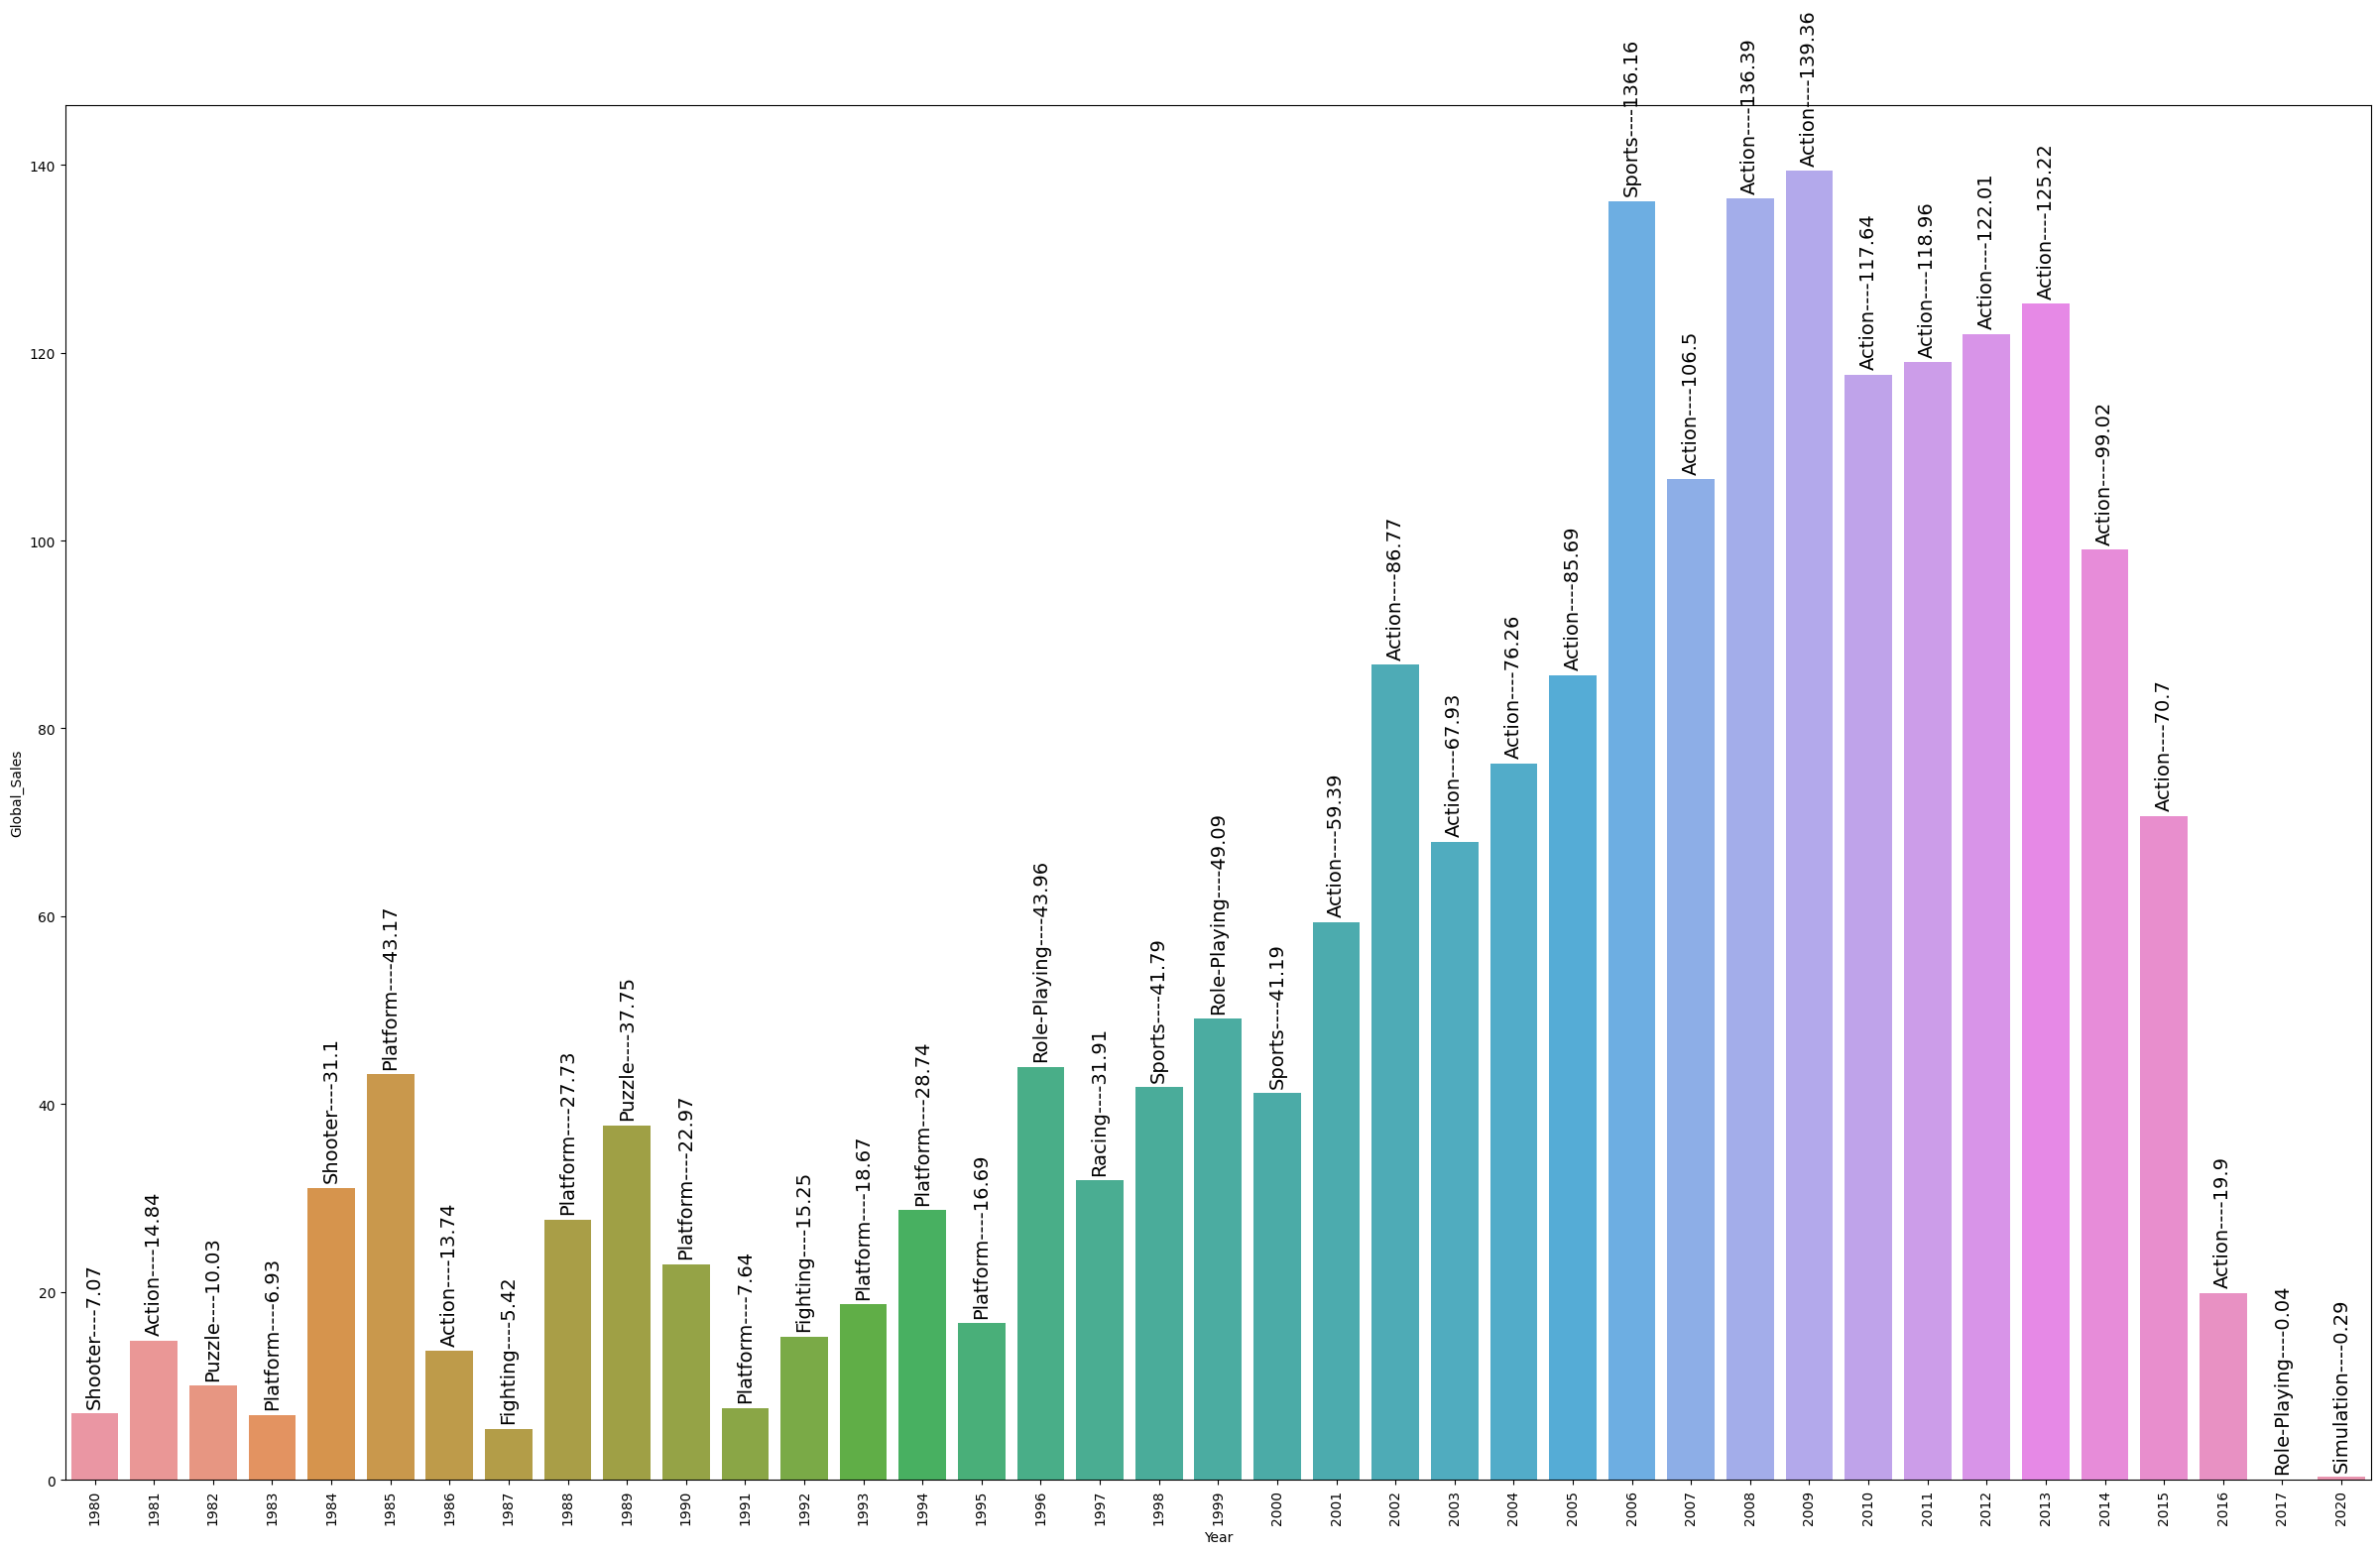

In [ ]:
# Criando gráfico entre o ano, e o gênero de jogo mais vendido nesse mesmo ano
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
genre = year_sale_max['Genre']
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Em 2009, o gênero de ação vendeu 139,36 milhões e em 2008, o gênero de ação vendeu 136,39 milhões.

------------------------------------------------------------------

In [ ]:
# Análise das vendas por Região
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "Região", 0: "Vendas"})
top_sale_reg


Região   Vendas
0     NA_Sales  4327.65
1     EU_Sales  2406.69
2     JP_Sales  1284.27
3  Other_Sales   788.91

([<matplotlib.patches.Wedge at 0x79d9edc10820>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

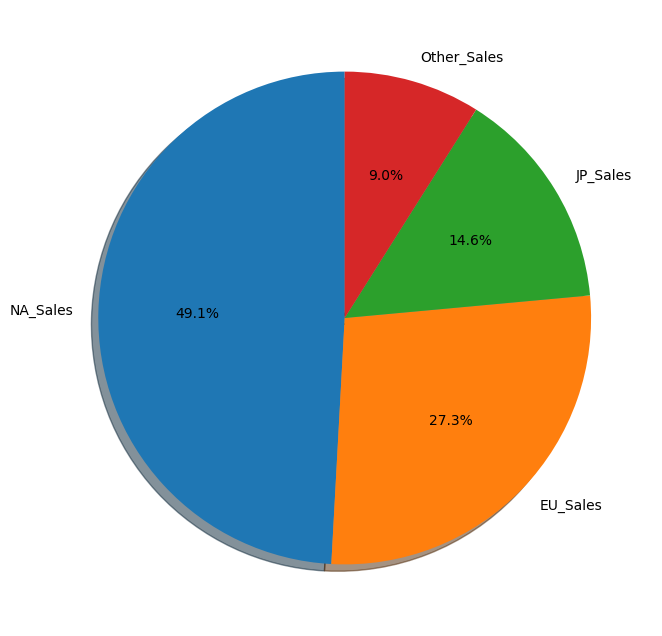

In [ ]:
labels = top_sale_reg['Região']
sizes = top_sale_reg['Vendas']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

A América do Norte possui a maior participação de Mercado

-----------------------------------------------------------------

# Lidando com os Outliers

<ipython-input-1359-436e7b7ae822>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcopy=df.corr()


<Axes: >

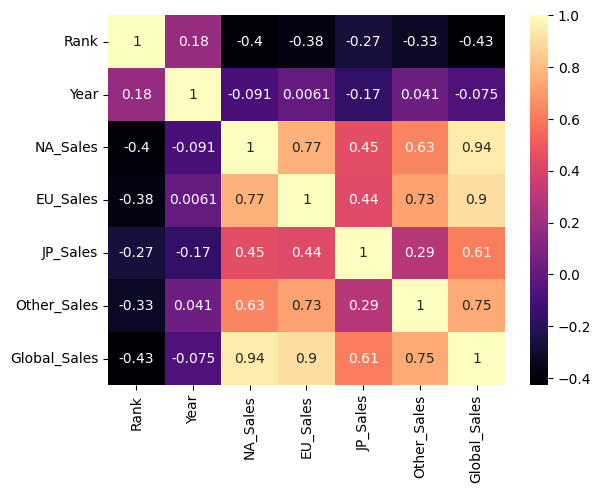

In [ ]:

# criando heatmap dos dados
dfcopy=df.corr()

sns.heatmap(dfcopy ,annot = True, cmap="magma")

Rank               Axes(0.125,0.653529;0.133621x0.226471)
Year            Axes(0.285345,0.653529;0.133621x0.226471)
NA_Sales         Axes(0.44569,0.653529;0.133621x0.226471)
EU_Sales        Axes(0.606034,0.653529;0.133621x0.226471)
JP_Sales        Axes(0.766379,0.653529;0.133621x0.226471)
Other_Sales        Axes(0.125,0.381765;0.133621x0.226471)
Global_Sales    Axes(0.285345,0.381765;0.133621x0.226471)
dtype: object

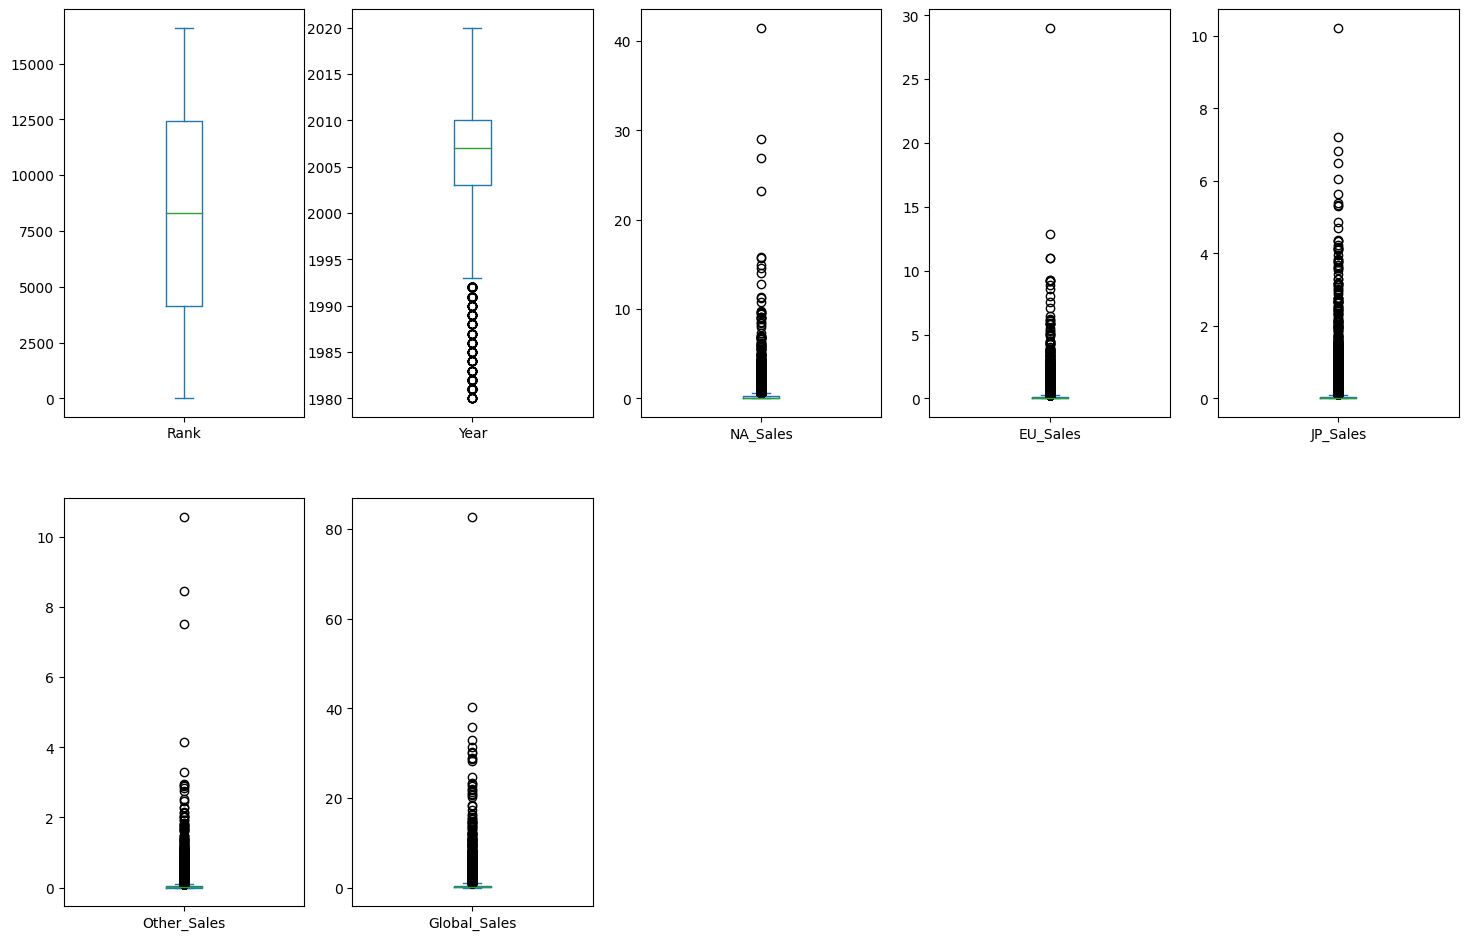

In [ ]:
# criando box plot, com as distribuições estatísticas
# com os 4 quartios
df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5))

(0.0, 30.47140487188924)

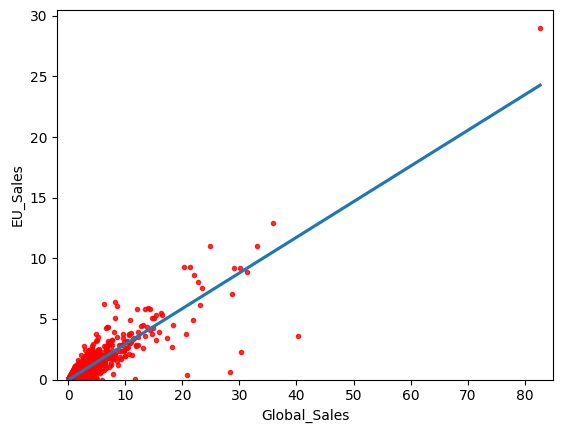

In [ ]:

# Criando distribuição entre vendas NA
# E vendas globais
g = sns.regplot(x=df.Global_Sales,y=df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [ ]:
df = df.drop([0],axis=0)

(0.0, 13.52411103334368)

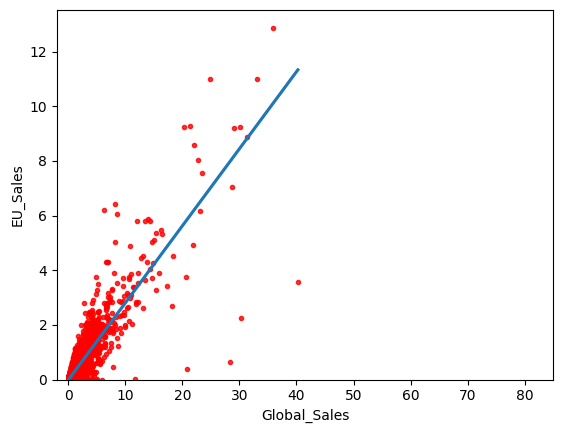

In [ ]:

# Criando distribuições entre vendas globais e
# vendas locais da Europa
g = sns.regplot(x=df.Global_Sales,y=df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

---------------------------------------------------------------

# Label Encoding e preparando X and y

In [ ]:

# Vizualizando primeiros dados
df.head()

Rank                      Name Platform  Year         Genre Publisher  \
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   
5     6                    Tetris       GB  1989        Puzzle  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26

In [ ]:

# Realizando o Label encoding para
# dar valores numéricos a dados a serem aplicados nos modelos
from sklearn.preprocessing import LabelEncoder

dff = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre"]


for col in feature:
    dff[col] = le.fit_transform(df[col])

In [ ]:

# Verificando dados após o Label Encoding
dff.head()

Rank                      Name  Platform  Year  Genre Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4  Nintendo     29.08   
2     3            Mario Kart Wii        26  2008      6  Nintendo     15.85   
3     4         Wii Sports Resort        26  2009     10  Nintendo     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7  Nintendo     11.27   
5     6                    Tetris         5  1989      5  Nintendo     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

---------------------------------------------------

In [ ]:

# Definindo as variáveis Independentes
# e a variável alvo.
X = dff[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = dff['Global_Sales'].values

# Treino | Testes

In [ ]:

# Forma do X, variáveis Independentes
X.shape

(16290, 6)

In [ ]:

# forma do y, variáveis alvo
y.shape

(16290,)

In [ ]:

# Separando os dados entre 75% para treino
# e 25% para teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:

# Mudando a Escala para uma escala padrão,
# Com uma faixa de valores centradas no zero
# Remoção dos Outliers
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()

In [ ]:

# Aplicando o Robust Scaler nos dados
x_train = ro.fit_transform(x_train)
x_test = ro.fit_transform(x_test)

# Modelos

In [ ]:

# Importando ferramentas úteis
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

**Decision Tree**

In [ ]:

# Modelo de Regressão por Árvore de Decisão

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:

# Treinamento do modelo
regressor.score(x_train,y_train)

0.9999977849831169

In [ ]:

# Teste do modelo
regressor.score(x_test,y_test)

0.9600132190481512

In [ ]:


yTreePre= regressor.predict(x_test)

In [ ]:

# Métrica de avaliação
# Coeficiente de Determinação
r2Tree= r2_score(y_test ,yTreePre )
r2Tree

0.9600132190481512

In [ ]:

# Métrica de Avaliação
# Erro Absoluto Médio
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yTreePre, y_test)
print('Erro Absoluto Médio '+str(mae))

Erro Absoluto Médio 0.04714600949645273


In [ ]:

# Visualização dos dados Reais e Predições
db = pd.DataFrame({'Real': y_test, 'Predição': yTreePre})
db

Real  Predição
0     0.57  0.570000
1     0.02  0.020000
2     0.33  0.320000
3     0.67  0.600000
4     0.15  0.155000
...    ...       ...
4068  0.05  0.043333
4069  0.23  0.240000
4070  2.20  2.220000
4071  0.19  0.190000
4072  0.13  0.131667

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

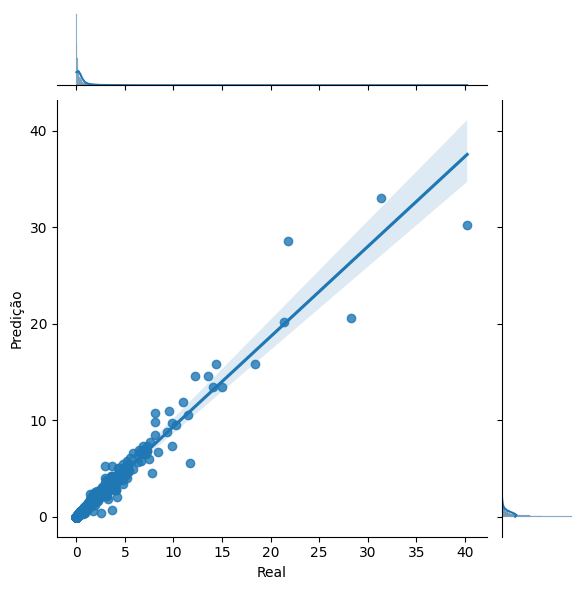

In [ ]:

# Verificando a dispersão da predição
# em relação aos valores reais
test = pd.DataFrame({'Predição':yTreePre,'Real':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test,kind='reg',);

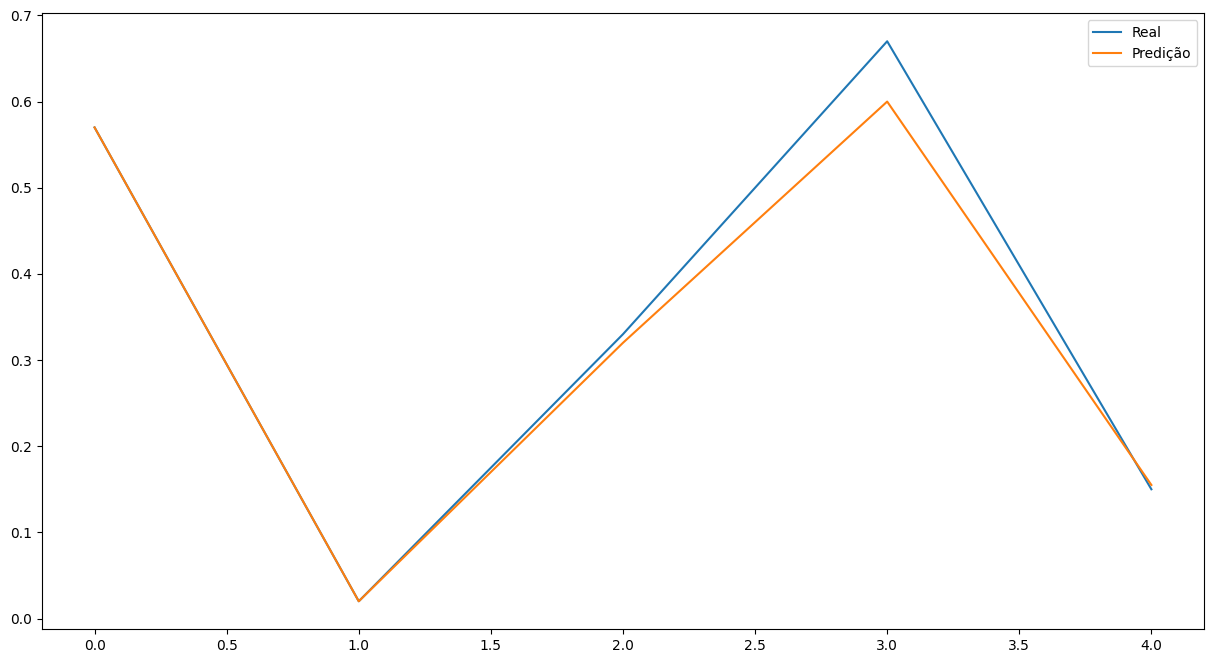

In [ ]:

# comparação da dispersão por gráfico de linhas
# no tempo
db1 = db.head()
db1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:

# Coeficiente de decisão
# das variáveis Independentes
regressor.feature_importances_

array([0.0009385 , 0.00167652, 0.84674074, 0.11258302, 0.03135989,
       0.00670133])

------------------------------------------

**Ridge**

In [ ]:

# Modelo Ridge
# Treino do modelo
rid = Ridge()
rid.fit(x_train,y_train)

Ridge()

In [ ]:
# Teste do treinamento do modelo

rid.score(x_train,y_train)

0.9999861192147286

In [ ]:

# Teste da predição do modelo
rid.score(x_test,y_test)

0.999987986050178

In [ ]:
yRidPre = rid.predict(x_test)

In [ ]:
# Métrica de avaliação
# Coeficiente de Determinação

r2Rid = r2_score(y_test ,yRidPre )
r2Rid

0.999987986050178

In [ ]:

# Métrica de Avaliação
# Erro Absoluto Médio

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRidPre, y_test)
print('Erro Absoluto Médio '+str(mae))

Erro Absoluto Médio 0.002955137510258357


In [ ]:

# Visualização dos dados Reais e Predições
dbRidge = pd.DataFrame({'Real': y_test, 'Predição': yRidPre})
dbRidge

Real  Predição
0     0.57  0.570265
1     0.02  0.020326
2     0.33  0.320226
3     0.67  0.670218
4     0.15  0.150223
...    ...       ...
4068  0.05  0.040200
4069  0.23  0.240351
4070  2.20  2.200274
4071  0.19  0.190430
4072  0.13  0.130424

[4073 rows x 2 columns]

In [ ]:
x_test.shape

(4073, 6)

In [ ]:
y_test.shape

(4073,)

<Figure size 1600x800 with 0 Axes>

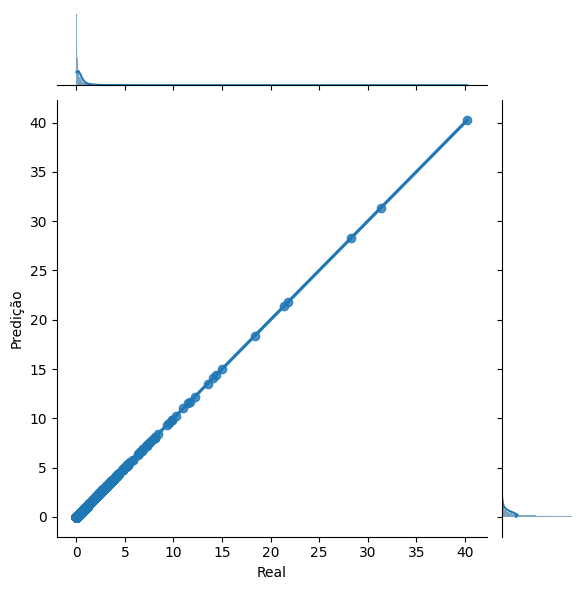

In [ ]:

# Verificando a dispersão da predição
# em relação aos valores reais
test = pd.DataFrame({'Predição':yRidPre,'Real':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test,kind='reg',);

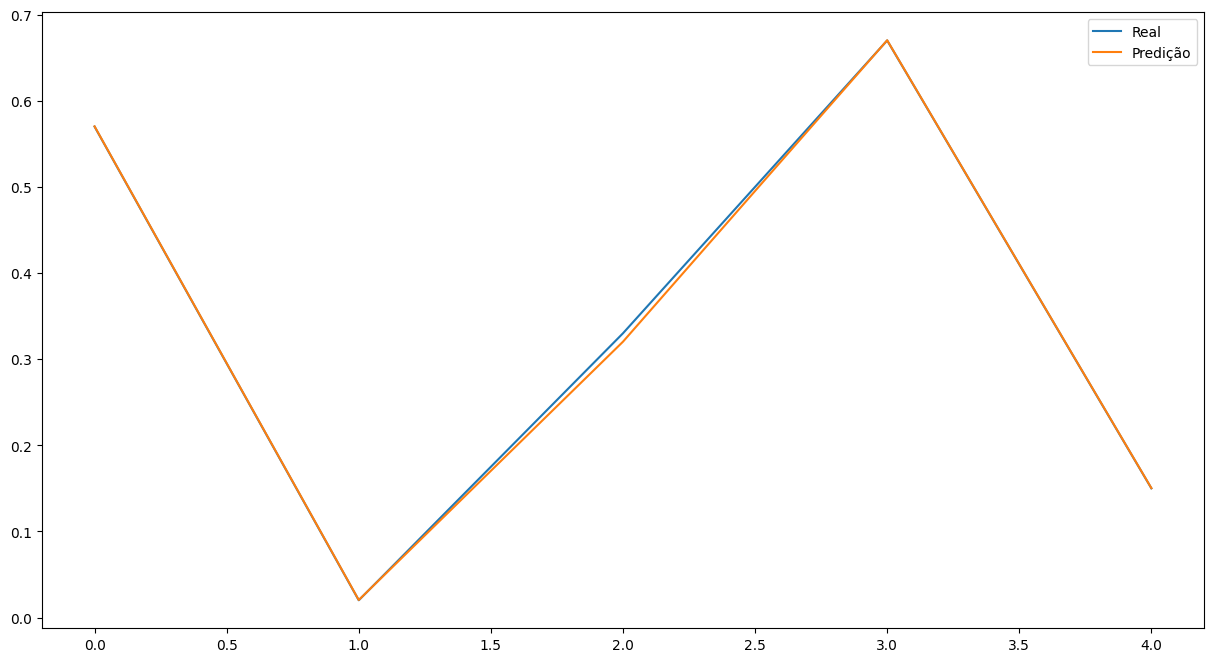

In [ ]:

# comparação da dispersão por gráfico de linhas
# no tempo
dbridge1 = dbRidge.head()
dbridge1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:

# Coeficiente de decisão
# das variáveis Independentes
rid.coef_

array([-1.08639110e-04, -4.71152381e-05,  2.39991637e-01,  1.10008370e-01,
        3.99908258e-02,  3.99685165e-02])

--------------------------------------------------------

**LinearRegression**

In [ ]:

# Modelo Regressão Linear
# Treino do modelo
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:

# Teste do treinamento do modelo
lr.score(x_train,y_train)

0.9999861192562169

In [ ]:

# Teste da predição do modelo
lr.score(x_test,y_test)

0.9999879850329042

In [ ]:

# Métrica de avaliação
# Coeficiente de Determinação
yLinearPre = lr.predict(x_test)

In [ ]:
r2Linear = r2_score(y_test , yLinearPre)
r2Linear

0.9999879850329042

<Figure size 1600x800 with 0 Axes>

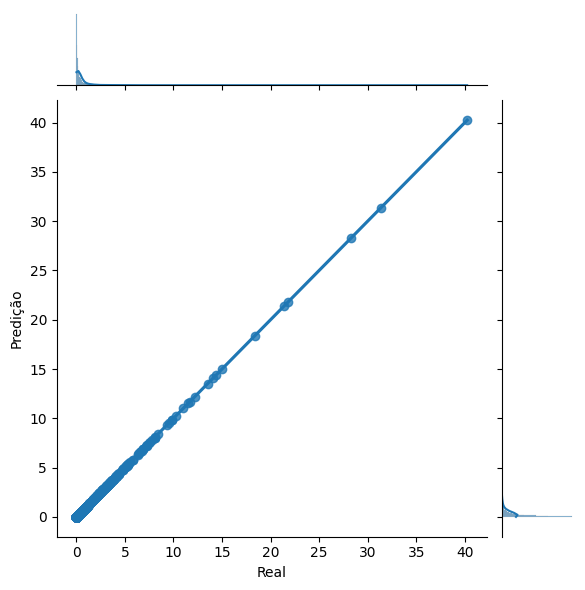

In [ ]:
# Verificando a dispersão da predição
# em relação aos valores reais
test = pd.DataFrame({'Predição':yLinearPre,'Real':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test,kind='reg',);

In [ ]:

# Métrica de Avaliação
# Erro Absoluto Médio
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yLinearPre, y_test)
print('Erro Médio Absoluto '+str(mae))

Erro Médio Absoluto 0.0029547715225954007


In [ ]:

# Visualização dos dados Reais e Predições
dbLinear = pd.DataFrame({'Real': y_test, 'Predição': yLinearPre})
dbLinear

Real  Predição
0     0.57  0.570270
1     0.02  0.020324
2     0.33  0.320229
3     0.67  0.670215
4     0.15  0.150223
...    ...       ...
4068  0.05  0.040197
4069  0.23  0.240351
4070  2.20  2.200280
4071  0.19  0.190427
4072  0.13  0.130425

[4073 rows x 2 columns]

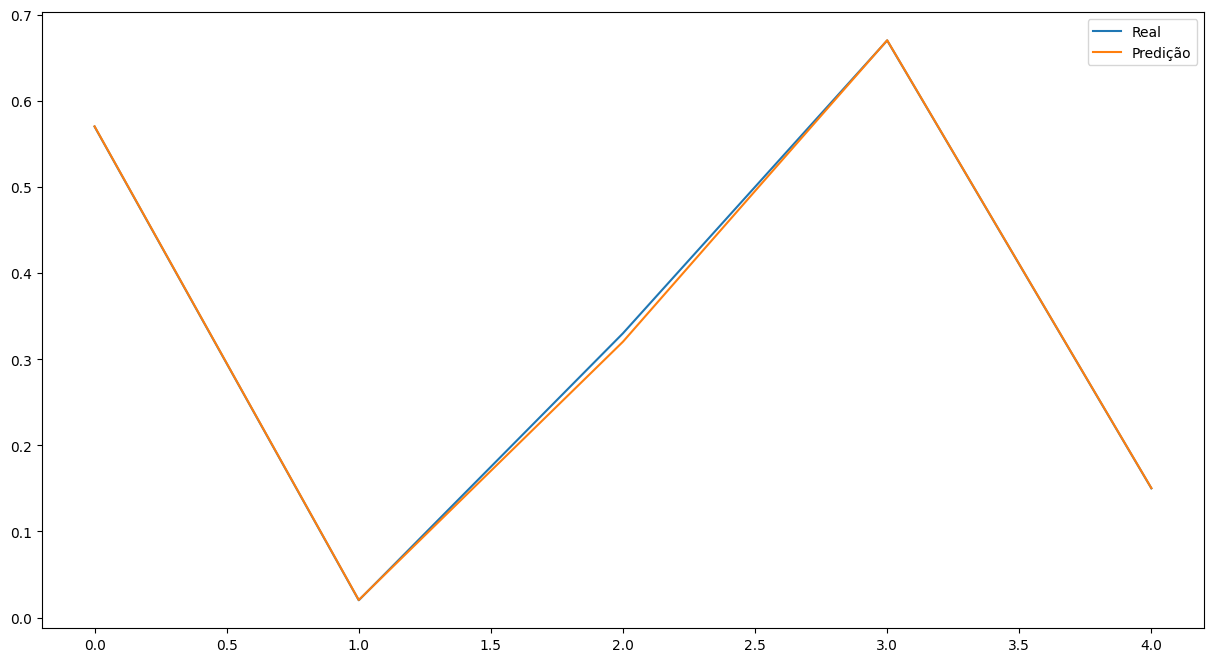

In [ ]:

# comparação da dispersão por gráfico de linhas
# no tempo
dbLinear1 = dbLinear.head()
dbLinear1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:

# Coeficiente de decisão
# das variáveis Independentes
lr.coef_

array([-1.09384339e-04, -4.72731391e-05,  2.39996484e-01,  1.10007377e-01,
        3.99904466e-02,  3.99673977e-02])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
# Modelo Regressão por Random Forest
# Treino do modelo
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [ ]:
# Teste do treinamento do modelo
rf.score(x_train,y_train)

0.9970386839986933

In [ ]:
# Teste da predição do modelo
rf.score(x_test,y_test)

0.9591450012506179

In [ ]:
# Métrica de avaliação
# Coeficiente de Determinação
yRandomPre= rf.predict(x_test)

In [ ]:
r2Random = r2_score(y_test , yRandomPre)
r2Random

0.9591450012506179

In [ ]:
# Métrica de Avaliação
# Erro Absoluto Médio
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRandomPre, y_test)
print('Erro Médio Absoluto '+str(mae))

Erro Médio Absoluto 0.030947812566712654


In [ ]:
# Visualização dos dados Reais e Predições
dbRandom = pd.DataFrame({'Real': y_test, 'Predição': yRandomPre})
dbRandom

Real  Predição
0     0.57  0.572150
1     0.02  0.020000
2     0.33  0.320700
3     0.67  0.630800
4     0.15  0.155177
...    ...       ...
4068  0.05  0.043770
4069  0.23  0.238900
4070  2.20  2.247100
4071  0.19  0.190000
4072  0.13  0.131583

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

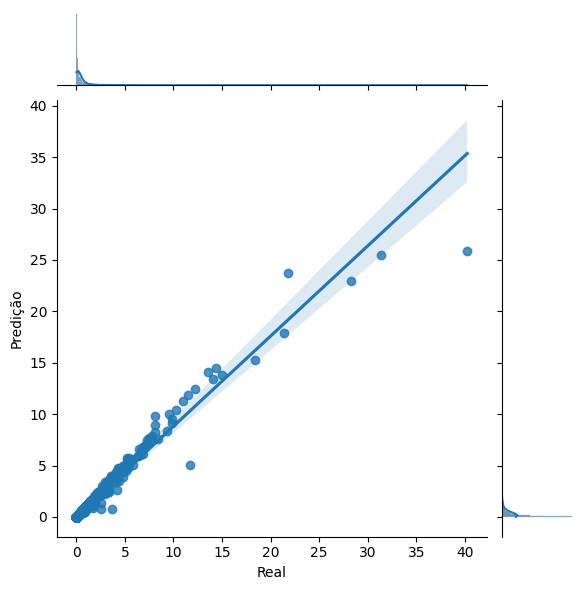

In [ ]:
# Verificando a dispersão da predição
# em relação aos valores reais
test = pd.DataFrame({'Predição':yRandomPre,'Real':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test,kind='reg',);

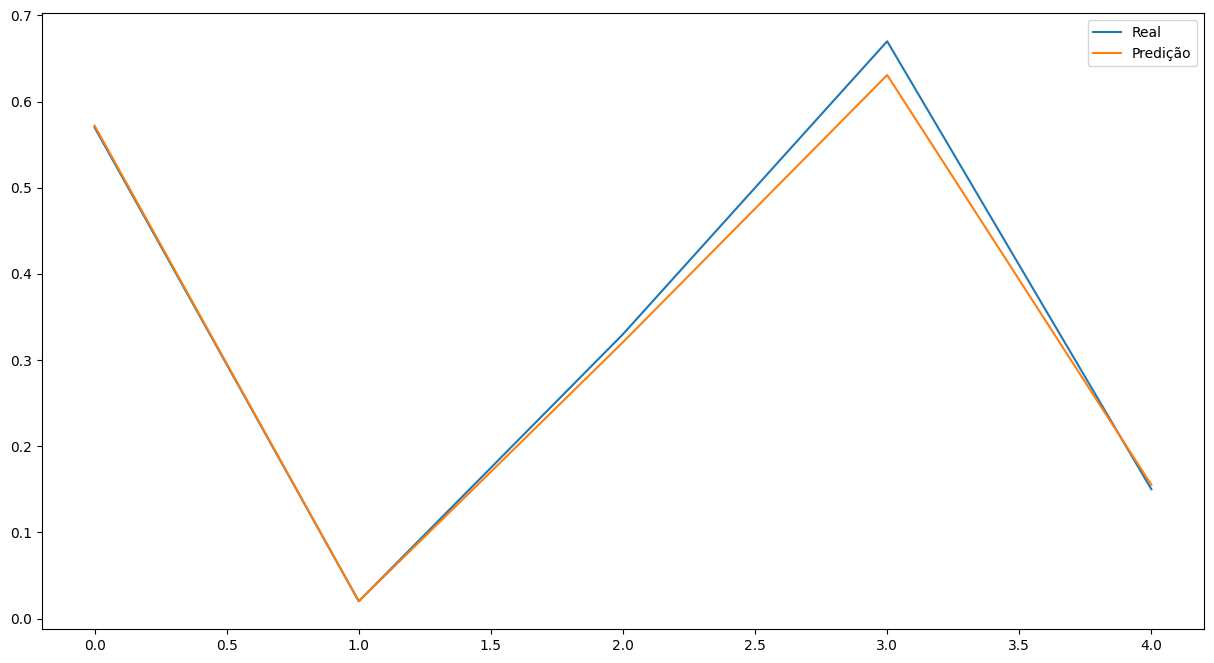

In [ ]:
# comparação da dispersão por gráfico de linhas
# no tempo
dbRandom1 = dbRandom.head()
dbRandom1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
# Coeficiente de decisão
# das variáveis Independentes
rf.feature_importances_

array([0.0013173 , 0.00120741, 0.79539486, 0.15717228, 0.03177144,
       0.01313671])

----------------------------------------------------------------

**KNN**

In [ ]:

# Modelo Regressão por Random Forest
# Treino do modelo
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
# Teste do treinamento do modelo
knn.score(x_train,y_train)

0.9830286155722257

In [ ]:
# Teste da predição do modelo
knn.score(x_test , y_test)

0.9134505144593599

In [ ]:
# Métrica de avaliação
# Coeficiente de Determinação
pred = knn.predict(x_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.9134505144593599


In [ ]:
# Métrica de Avaliação
# Erro Absoluto Médio
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred, y_test)
print('Erro Médio Absoluto '+str(mae))

Erro Médio Absoluto 0.046915295850724285


In [ ]:
# Visualização dos dados Reais e Predições
dbKNN = pd.DataFrame({'Real': y_test, 'Predição': pred})
dbKNN

Real  Predição
0     0.57     0.560
1     0.02     0.020
2     0.33     0.320
3     0.67     0.578
4     0.15     0.150
...    ...       ...
4068  0.05     0.022
4069  0.23     0.254
4070  2.20     2.180
4071  0.19     0.190
4072  0.13     0.132

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

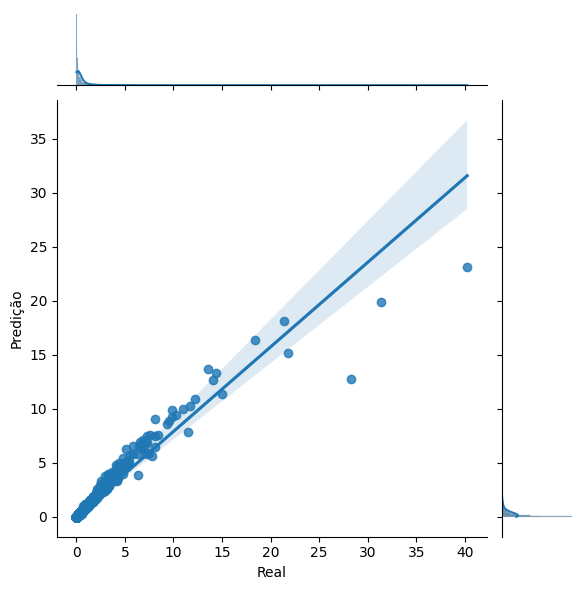

In [ ]:

# Verificando a dispersão da predição
# em relação aos valores reais
test = pd.DataFrame({'Predição':pred,'Real':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test,kind='reg',);

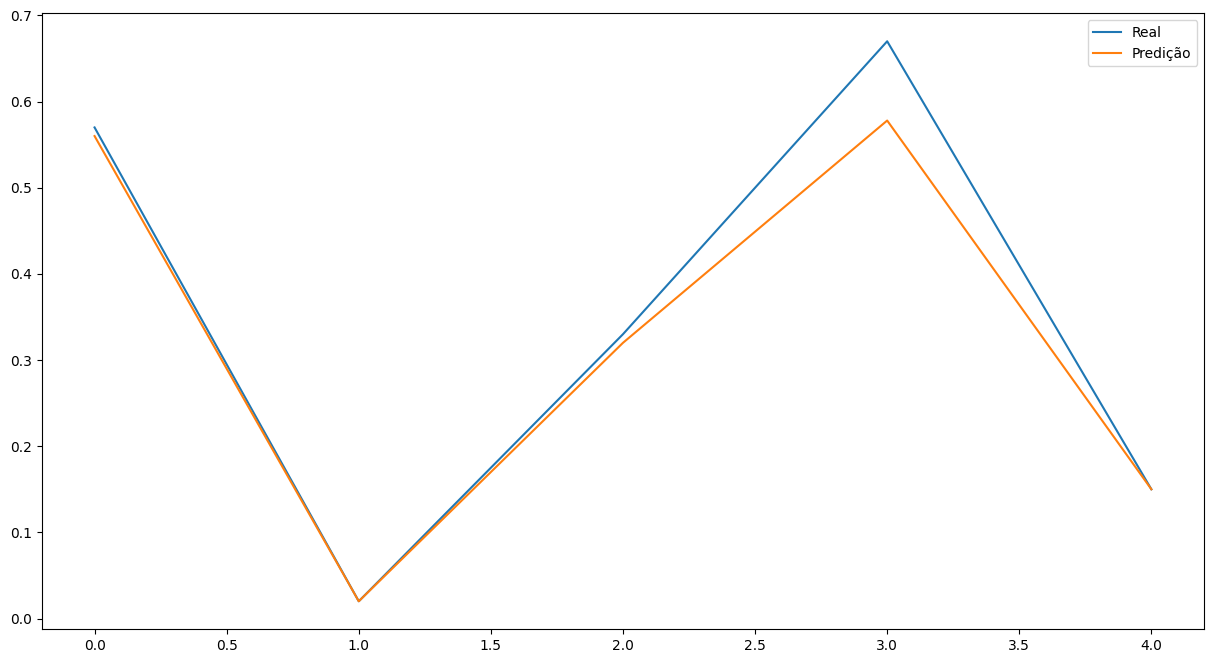

In [ ]:

# comparação da dispersão por gráfico de linhas
# no tempo
dbKNN1 = dbKNN.head()
dbKNN1.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np
np.random.seed(1)
m = sm.add_constant(X)
est = sm.OLS(y, m)
est2 = est.fit()
print(est2.params)

[ 4.76457202e-04 -9.44528385e-06 -6.76156906e-07  9.99946770e-01
  9.99943041e-01  9.99876334e-01  9.99612604e-01]


--------------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
from scipy import stats
m = sm.add_constant(X)
est=sm.OLS(y,m)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.032e+08
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:24:00   Log-Likelihood:                 62487.
No. Observations:               16290   AIC:                        -1.250e+05
Df Residuals:                   16283   BIC:                        -1.249e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      4.638      0.0

# Teste NA - GLOBAL

In [ ]:
dff_NA_GB = df.copy()

le_NA_GB = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_NA_GB[col] = le_NA_GB.fit_transform(df[col])

In [ ]:
dff_NA_GB.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_NA_GB = dff_NA_GB[['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']].values

y_NA_GB = dff_NA_GB['Global_Sales'].values

In [ ]:
x_train_NA_GB, x_test_NA_GB, y_train_NA_GB, y_test_NA_GB = train_test_split(X_NA_GB, y_NA_GB, test_size=0.25, random_state=42)

In [ ]:
ro_NA_GB = RobustScaler()

In [ ]:
x_train_NA_GB = ro_NA_GB.fit_transform(x_train_NA_GB)
x_test_NA_GB = ro_NA_GB.fit_transform(x_test_NA_GB)


**Decision Tree**

In [ ]:
regressor_NA_GB = DecisionTreeRegressor()
regressor_NA_GB.fit(x_train_NA_GB, y_train_NA_GB)




DecisionTreeRegressor()

In [ ]:
regressor_NA_GB.score(x_train_NA_GB,y_train_NA_GB)

0.9982744362518978

In [ ]:
regressor_NA_GB.score(x_test_NA_GB,y_test_NA_GB)


0.8360941441779789

In [ ]:
yTreePre_NA_GB = regressor_NA_GB.predict(x_test_NA_GB)

In [ ]:
r2Tree_NA_GB = r2_score(y_test_NA_GB ,yTreePre_NA_GB )
r2Tree_NA_GB

0.8360941441779789

In [ ]:
mae_NA_GB = mean_absolute_error(yTreePre_NA_GB, y_test_NA_GB)
print('Erro Absoluto Médio '+str(mae_NA_GB))

Erro Absoluto Médio 0.2146494627804473


In [ ]:
db_NA_GB = pd.DataFrame({'Real': y_test_NA_GB, 'Predição': yTreePre_NA_GB})
db_NA_GB

Real  Predição
0     0.57      0.73
1     0.02      0.03
2     0.33      0.45
3     0.67      1.11
4     0.15      0.29
...    ...       ...
4068  0.05      0.02
4069  0.23      0.23
4070  2.20      2.06
4071  0.19      0.12
4072  0.13      0.16

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

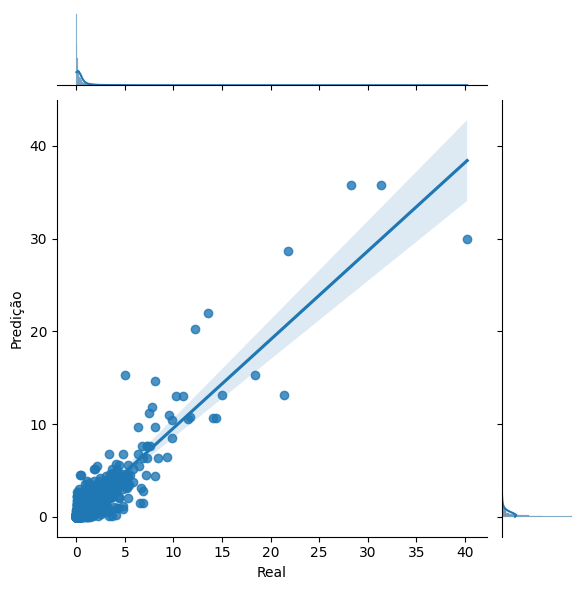

In [ ]:
test_NA_GB = pd.DataFrame({'Predição':yTreePre_NA_GB,'Real':y_test_NA_GB})
fig_NA_GB = plt.figure(figsize=(16,8))
test_NA_GB = test_NA_GB.reset_index()
test_NA_GB = test_NA_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_GB,kind='reg',);

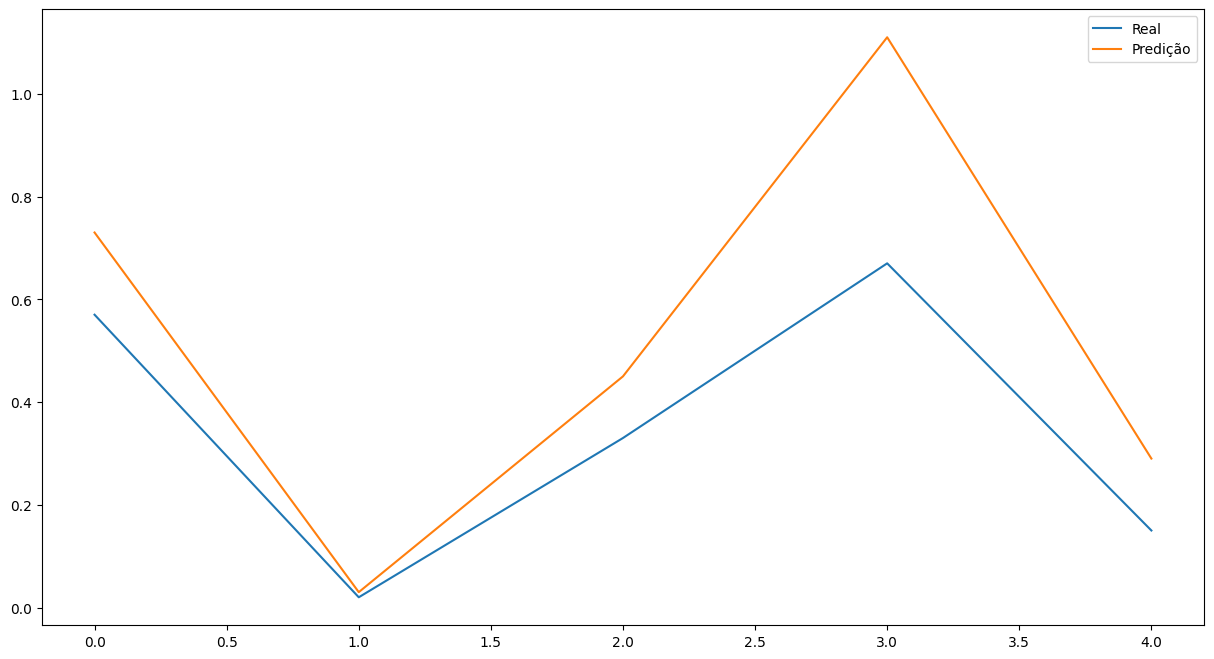

In [ ]:
db1_NA_GB = db_NA_GB.head()
db1_NA_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_NA_GB.feature_importances_

array([0.01856878, 0.02633941, 0.01811213, 0.01716194, 0.91981774])

------------------------------------------

**Ridge**

In [ ]:
rid_NA_GB = Ridge()
rid_NA_GB.fit(x_train_NA_GB,y_train_NA_GB)

Ridge()

In [ ]:
rid_NA_GB.score(x_train_NA_GB,y_train_NA_GB)

0.8806476607657696

In [ ]:
rid_NA_GB.score(x_test_NA_GB,y_test_NA_GB)

0.8182571079042967

In [ ]:
yRidPre_NA_GB = rid_NA_GB.predict(x_test_NA_GB)

In [ ]:
r2Rid_NA_GB = r2_score(y_test_NA_GB ,yRidPre_NA_GB )
r2Rid_NA_GB

0.8182571079042967

In [ ]:
mae_NA_GB = mean_absolute_error(yRidPre_NA_GB, y_test_NA_GB)
print('Erro Absoluto Médio '+str(mae_NA_GB))

Erro Absoluto Médio 0.21002389377803662


In [ ]:
dbRidge_NA_GB = pd.DataFrame({'Real': y_test_NA_GB, 'Predição': yRidPre_NA_GB})
dbRidge_NA_GB

Real  Predição
0     0.57  0.911844
1     0.02  0.032927
2     0.33  0.567959
3     0.67  0.407264
4     0.15  0.269637
...    ...       ...
4068  0.05  0.075730
4069  0.23  0.208486
4070  2.20  2.034968
4071  0.19  0.117930
4072  0.13  0.345731

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

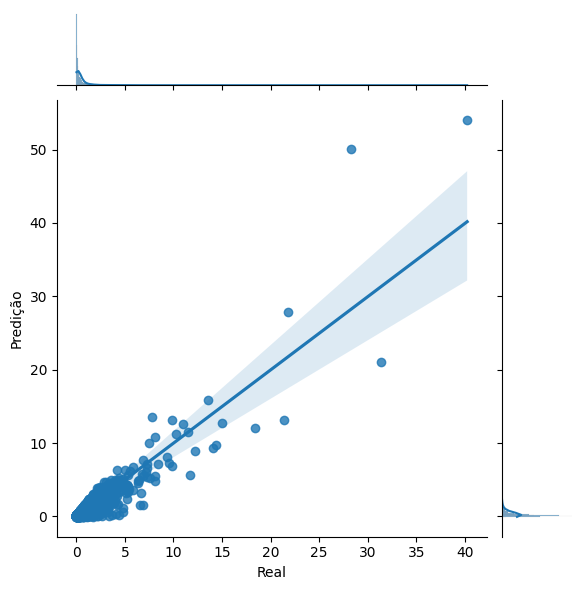

In [ ]:
test_NA_GB = pd.DataFrame({'Predição':yRidPre_NA_GB,'Real':y_test_NA_GB})
fig = plt.figure(figsize=(16,8))
test_NA_GB = test_NA_GB.reset_index()
test_NA_GB = test_NA_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_GB,kind='reg',);

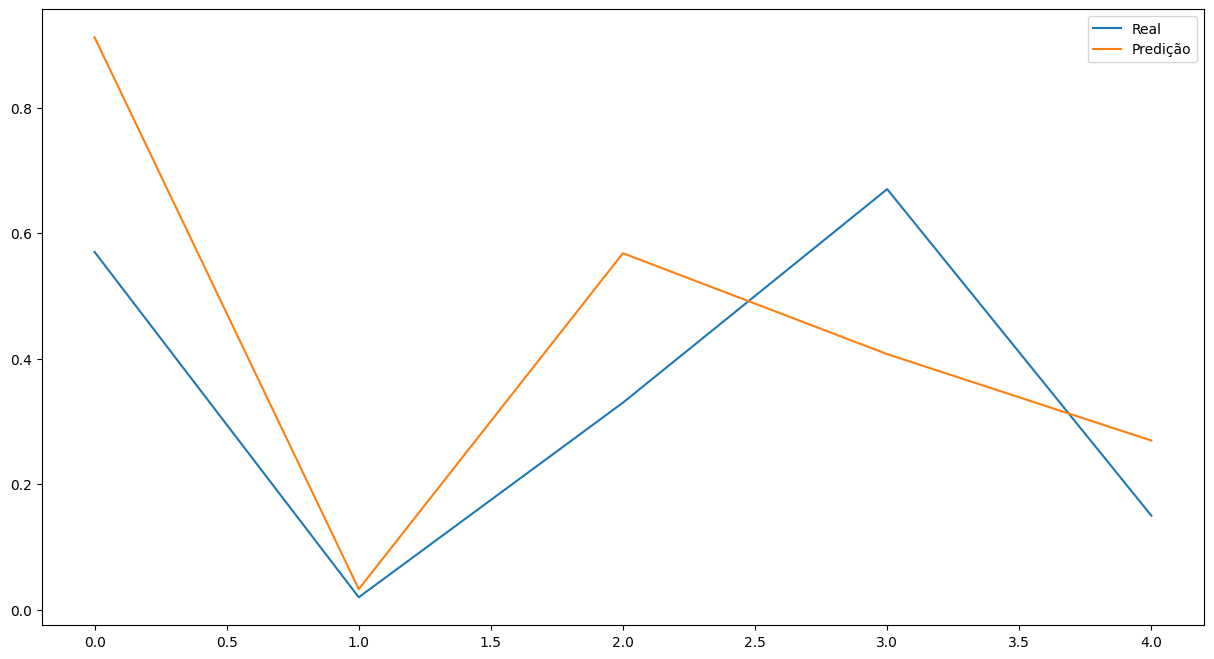

In [ ]:
dbridge1_NA_GB = dbRidge_NA_GB.head()
dbridge1_NA_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_NA_GB.coef_

array([-0.04373733,  0.02272034,  0.01860615,  0.04454818,  0.44583023])

------------------------------------------

**LinearRegression**

In [ ]:
lr_NA_GB = LinearRegression()
lr_NA_GB.fit(x_train_NA_GB,y_train_NA_GB)

LinearRegression()

In [ ]:
lr_NA_GB.score(x_train_NA_GB,y_train_NA_GB)

0.8806476609034004

In [ ]:
lr_NA_GB.score(x_test_NA_GB,y_test_NA_GB)

0.8182535454465529

In [ ]:
yLinearPre_NA_GB = lr_NA_GB.predict(x_test_NA_GB)

In [ ]:
r2Linear_NA_GB = r2_score(y_test_NA_GB , yLinearPre_NA_GB)
r2Linear_NA_GB

0.8182535454465529

<Figure size 1600x800 with 0 Axes>

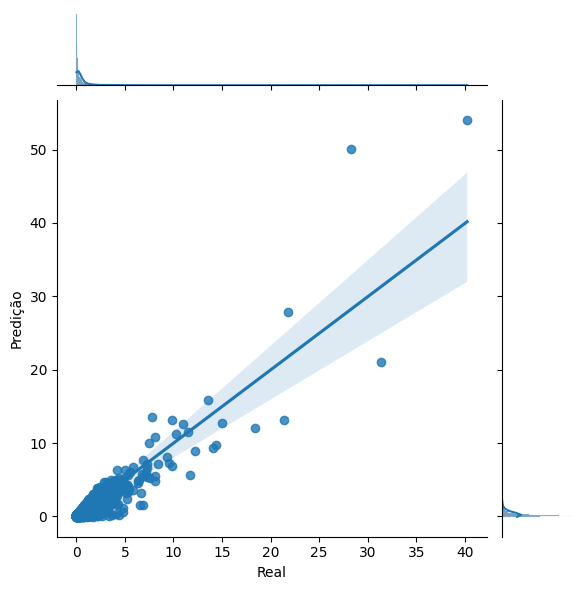

In [ ]:
test_NA_GB = pd.DataFrame({'Predição':yLinearPre_NA_GB,'Real':y_test_NA_GB})
fig= plt.figure(figsize=(16,8))
test_NA_GB = test_NA_GB.reset_index()
test_NA_GB = test_NA_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_GB,kind='reg',);

In [ ]:
mae_NA_GB = mean_absolute_error(yLinearPre_NA_GB, y_test_NA_GB)
print('Erro Absoluto Médio '+str(mae_NA_GB))

Erro Absoluto Médio 0.21002621277250916


In [ ]:
dbLinear_NA_GB = pd.DataFrame({'Real': y_test_NA_GB, 'Predição': yLinearPre_NA_GB})
dbLinear_NA_GB

Real  Predição
0     0.57  0.911845
1     0.02  0.032916
2     0.33  0.567948
3     0.67  0.407266
4     0.15  0.269623
...    ...       ...
4068  0.05  0.075723
4069  0.23  0.208461
4070  2.20  2.034989
4071  0.19  0.117944
4072  0.13  0.345748

[4073 rows x 2 columns]

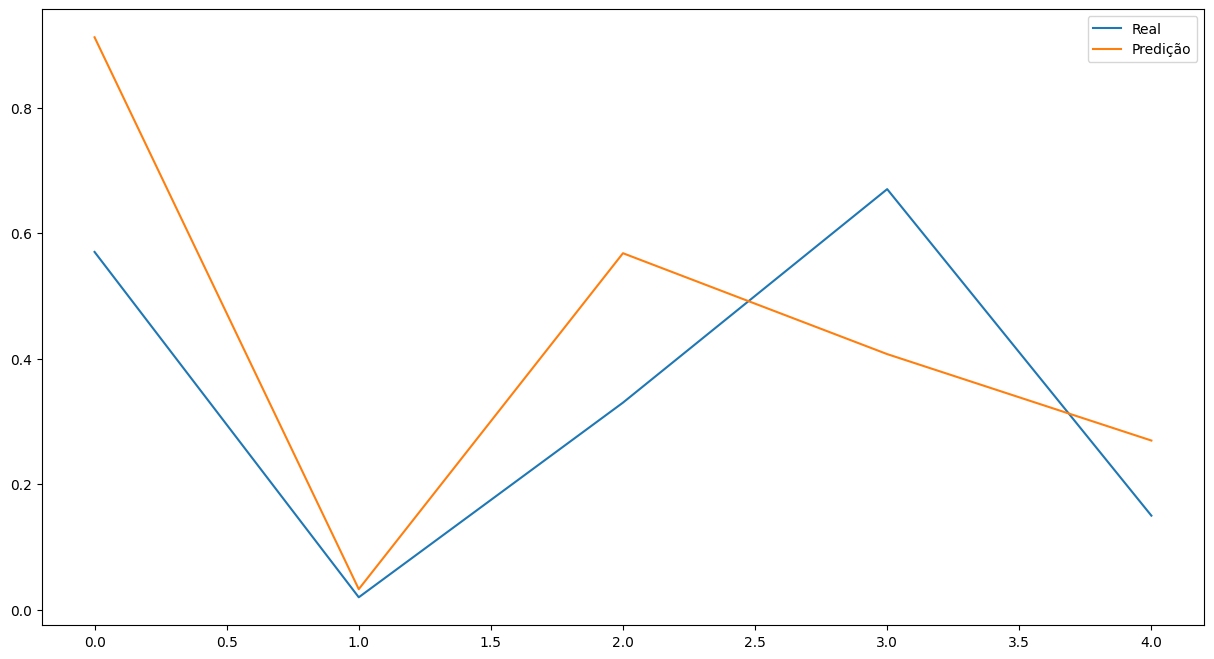

In [ ]:
dbLinear1_NA_GB = dbLinear_NA_GB.head()
dbLinear1_NA_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_NA_GB.coef_

array([-0.04374976,  0.02272624,  0.01861315,  0.04455986,  0.44583465])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_NA_GB = RandomForestRegressor()
rf_NA_GB.fit(x_train_NA_GB , y_train_NA_GB)

RandomForestRegressor()

In [ ]:
rf_NA_GB.score(x_train_NA_GB,y_train_NA_GB)

0.9859744737848355

In [ ]:
rf_NA_GB.score(x_test_NA_GB,y_test_NA_GB)

0.8956546552739884

In [ ]:
yRandomPre_NA_GB = rf_NA_GB.predict(x_test_NA_GB)

In [ ]:
r2Random_NA_GB = r2_score(y_test_NA_GB , yRandomPre_NA_GB)
r2Random_NA_GB

0.8956546552739884

In [ ]:
mae_NA_GB = mean_absolute_error(yRandomPre_NA_GB, y_test_NA_GB)
print('Erro Absoluto Médio '+str(mae_NA_GB))

Erro Absoluto Médio 0.17662931719771582


In [ ]:
dbRandom_NA_GB = pd.DataFrame({'Real': y_test_NA_GB, 'Predição': yRandomPre_NA_GB})
dbRandom_NA_GB

Real  Predição
0     0.57  0.792900
1     0.02  0.030860
2     0.33  0.415600
3     0.67  0.731900
4     0.15  0.219700
...    ...       ...
4068  0.05  0.053250
4069  0.23  0.301750
4070  2.20  1.735600
4071  0.19  0.129723
4072  0.13  0.158500

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

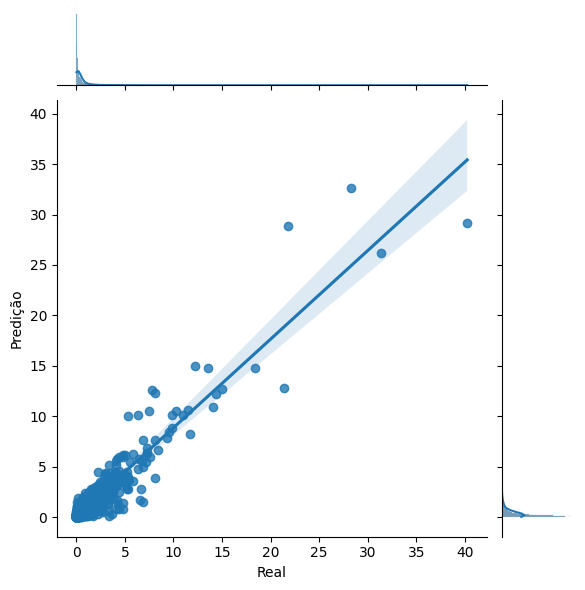

In [ ]:
test_NA_GB = pd.DataFrame({'Predição':yRandomPre_NA_GB,'Real':y_test_NA_GB})
fig= plt.figure(figsize=(16,8))
test_NA_GB = test_NA_GB.reset_index()
test_NA_GB = test_NA_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_GB,kind='reg',);

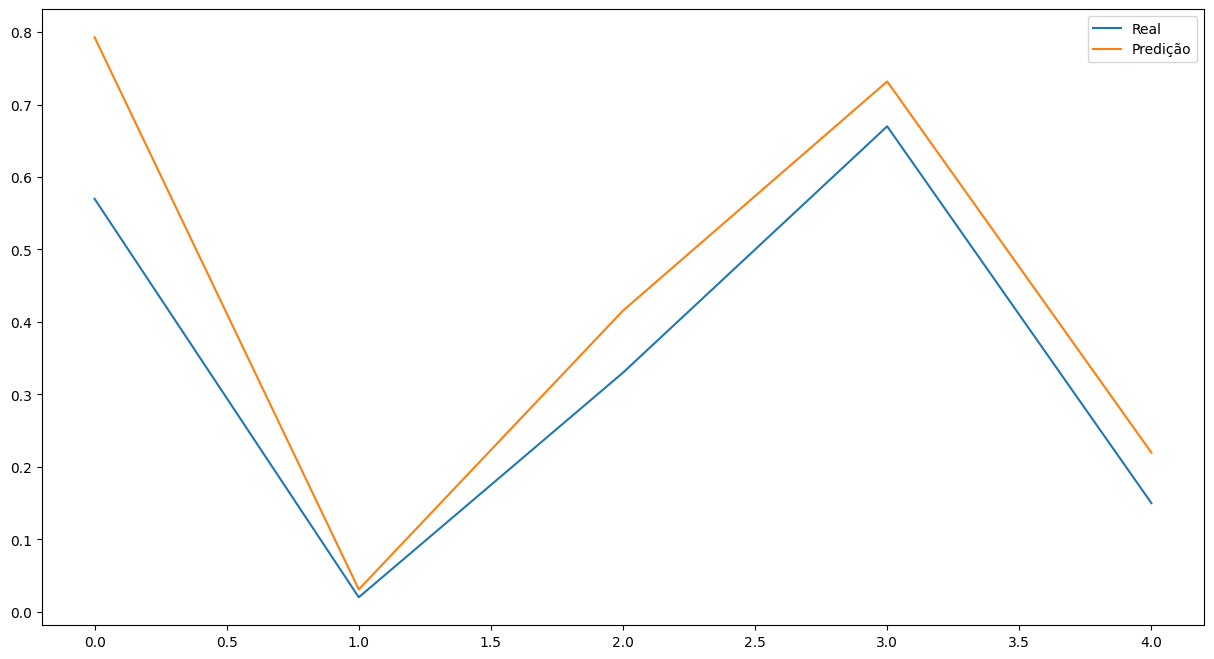

In [ ]:
dbRandom1_NA_GB = dbRandom_NA_GB.head()
dbRandom1_NA_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_NA_GB.feature_importances_

array([0.02199668, 0.02315024, 0.01497826, 0.01729276, 0.92258205])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_NA_GB = KNeighborsRegressor()
knn_NA_GB.fit(x_train_NA_GB, y_train_NA_GB)

KNeighborsRegressor()

In [ ]:
knn_NA_GB.score(x_train_NA_GB,y_train_NA_GB)

0.9272802446096448

In [ ]:
knn_NA_GB.score(x_test_NA_GB , y_test_NA_GB)

0.8851487385248397

In [ ]:
pred_NA_GB = knn_NA_GB.predict(x_test_NA_GB)

r2_knn_NA_GB = r2_score(y_test_NA_GB,pred_NA_GB)
print(r2_knn_NA_GB)

0.8851487385248397


In [ ]:
mae_NA_GB = mean_absolute_error(pred_NA_GB, y_test_NA_GB)
print('Erro Absoluto Médio '+str(mae_NA_GB))

Erro Absoluto Médio 0.17709206972747363


In [ ]:
dbKNN_NA_GB = pd.DataFrame({'Real': y_test_NA_GB, 'Predição': pred_NA_GB})
dbKNN_NA_GB

Real  Predição
0     0.57     0.810
1     0.02     0.030
2     0.33     0.434
3     0.67     0.678
4     0.15     0.382
...    ...       ...
4068  0.05     0.036
4069  0.23     0.194
4070  2.20     1.388
4071  0.19     0.120
4072  0.13     0.204

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

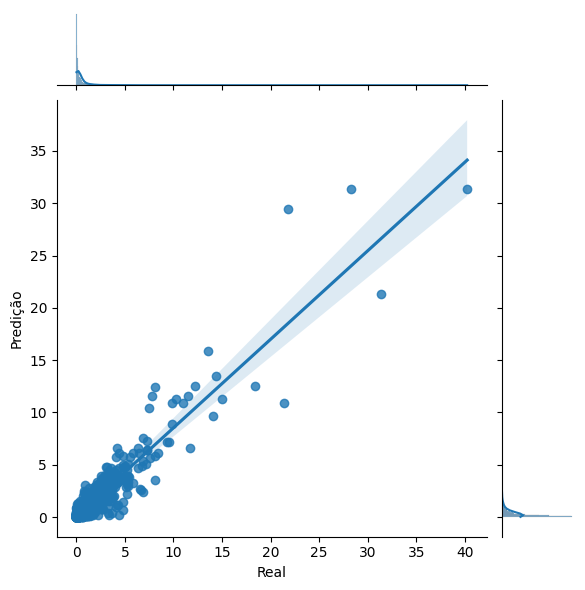

In [ ]:
test_NA_GB = pd.DataFrame({'Predição':pred_NA_GB,'Real':y_test_NA_GB})
fig= plt.figure(figsize=(16,8))
test_NA_GB = test_NA_GB.reset_index()
test_NA_GB = test_NA_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_GB,kind='reg',);

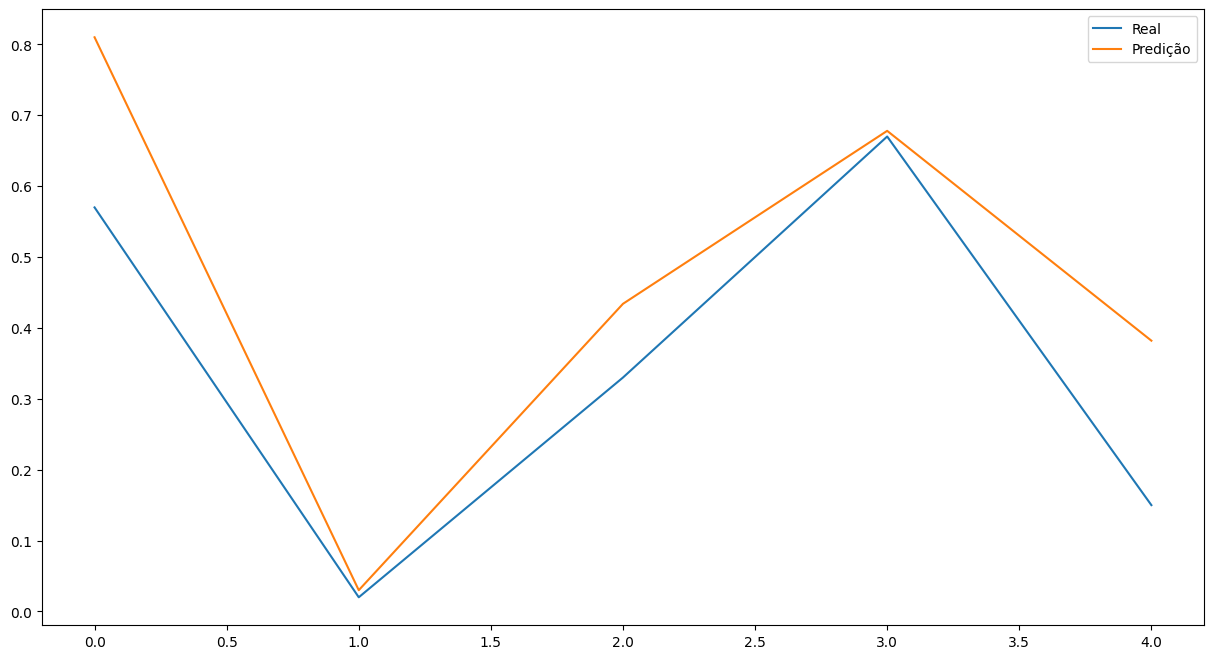

In [ ]:
dbKNN1_NA_GB = dbKNN_NA_GB.head()
dbKNN1_NA_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_NA_GB = sm.add_constant(X_NA_GB)
est_NA_GB = sm.OLS(y_NA_GB, m_NA_GB)
est2_NA_GB = est_NA_GB.fit()
print(est2_NA_GB.params)

[-6.67787580e+00 -2.50123957e-03  3.35819904e-03  3.19335550e-03
  1.24615335e-04  1.76066077e+00]


--------------------------------------------------------------------------------------

In [ ]:
m_NA_GB = sm.add_constant(X_NA_GB)
est_NA_GB=sm.OLS(y_NA_GB,m_NA_GB)
est2_NA_GB = est_NA_GB.fit()
print(est2_NA_GB.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 2.102e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:24:33   Log-Likelihood:                -12566.
No. Observations:               16290   AIC:                         2.514e+04
Df Residuals:                   16284   BIC:                         2.519e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6779      1.452     -4.600      0.0

--------------------------------------------------------------------------------------

# Teste EU - GLOBAL

In [ ]:
dff_EU_GB = df.copy()

le_EU_GB = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_EU_GB[col] = le_EU_GB.fit_transform(df[col])

In [ ]:
dff_EU_GB.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_EU_GB = dff_EU_GB[['Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales']].values

y_EU_GB = dff_EU_GB['Global_Sales'].values

In [ ]:
x_train_EU_GB, x_test_EU_GB, y_train_EU_GB, y_test_EU_GB = train_test_split(X_EU_GB, y_EU_GB, test_size=0.25, random_state=42)

In [ ]:
ro_EU_GB = RobustScaler()

In [ ]:
x_train_EU_GB = ro_EU_GB.fit_transform(x_train_EU_GB)
x_test_EU_GB = ro_EU_GB.fit_transform(x_test_EU_GB)


**Decision Tree**

In [ ]:
regressor_EU_GB = DecisionTreeRegressor()
regressor_EU_GB.fit(x_train_EU_GB, y_train_EU_GB)




DecisionTreeRegressor()

In [ ]:
regressor_EU_GB.score(x_train_EU_GB,y_train_EU_GB)

0.9968622074072969

In [ ]:
regressor_EU_GB.score(x_test_EU_GB,y_test_EU_GB)


0.7043389599980396

In [ ]:
yTreePre_EU_GB = regressor_EU_GB.predict(x_test_EU_GB)

In [ ]:
r2Tree_EU_GB = r2_score(y_test_EU_GB ,yTreePre_EU_GB )
r2Tree_EU_GB

0.7043389599980396

In [ ]:
mae_EU_GB = mean_absolute_error(yTreePre_EU_GB, y_test_EU_GB)
print('Erro Absoluto Médio '+str(mae_EU_GB))

Erro Absoluto Médio 0.2714105257619866


In [ ]:
db_EU_GB = pd.DataFrame({'Real': y_test_EU_GB, 'Predição': yTreePre_EU_GB})
db_EU_GB

Real  Predição
0     0.57     0.220
1     0.02     0.030
2     0.33     0.450
3     0.67     1.880
4     0.15     0.020
...    ...       ...
4068  0.05     0.020
4069  0.23     0.230
4070  2.20     2.090
4071  0.19     0.135
4072  0.13     0.146

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

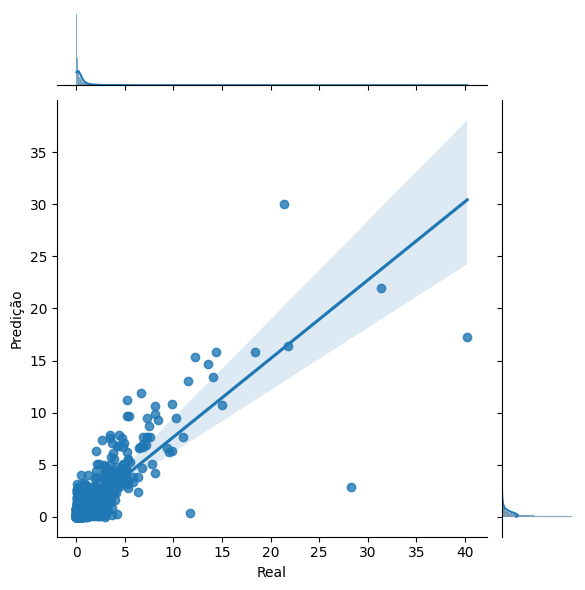

In [ ]:
test_EU_GB = pd.DataFrame({'Predição':yTreePre_EU_GB,'Real':y_test_EU_GB})
fig_EU_GB = plt.figure(figsize=(16,8))
test_EU_GB = test_EU_GB.reset_index()
test_EU_GB = test_EU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_EU_GB,kind='reg',);

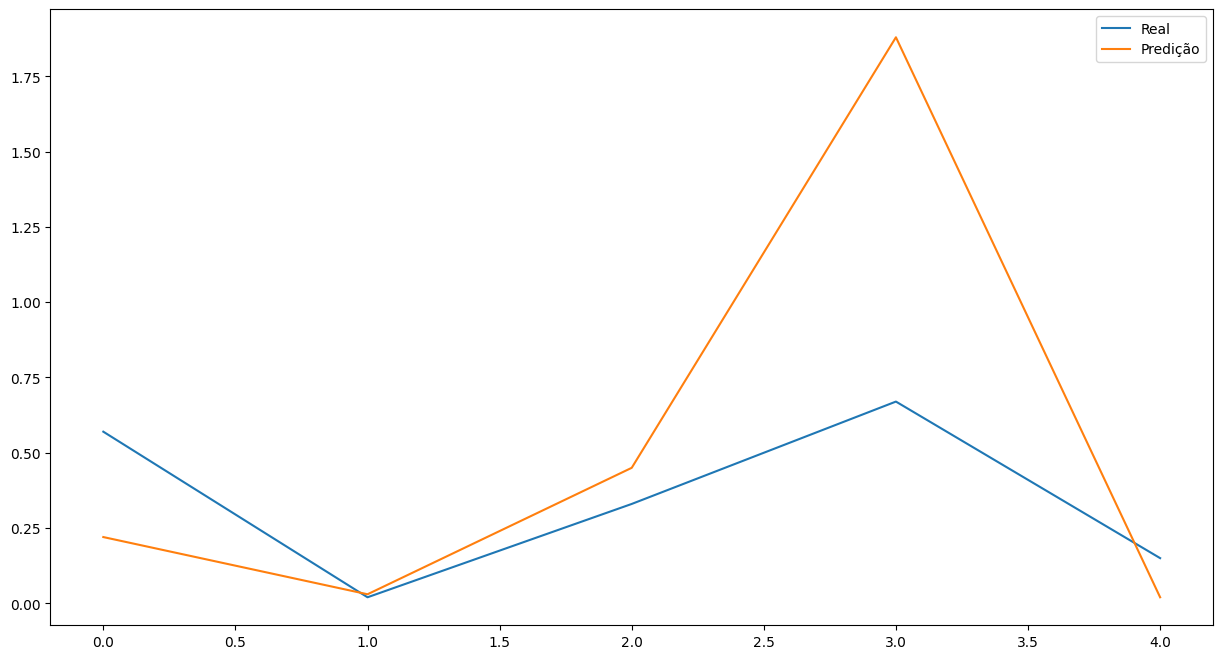

In [ ]:
db1_EU_GB = db_EU_GB.head()
db1_EU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_EU_GB.feature_importances_

array([0.03178334, 0.05916232, 0.03316899, 0.02150542, 0.85437993])

------------------------------------------

**Ridge**

In [ ]:
rid_EU_GB = Ridge()
rid_EU_GB.fit(x_train_EU_GB,y_train_EU_GB)

Ridge()

In [ ]:
rid_EU_GB.score(x_train_EU_GB,y_train_EU_GB)

0.8183718007413421

In [ ]:
rid_EU_GB.score(x_test_EU_GB,y_test_EU_GB)

0.7034627286992357

In [ ]:
yRidPre_EU_GB = rid_EU_GB.predict(x_test_EU_GB)

In [ ]:
r2Rid_EU_GB = r2_score(y_test_EU_GB ,yRidPre_EU_GB )
r2Rid_EU_GB

0.7034627286992357

In [ ]:
mae_EU_GB = mean_absolute_error(yRidPre_EU_GB, y_test_EU_GB)
print('Erro Absoluto Médio '+str(mae_EU_GB))

Erro Absoluto Médio 0.25623222696934284


In [ ]:
dbRidge_EU_GB = pd.DataFrame({'Real': y_test_EU_GB, 'Predição': yRidPre_EU_GB})
dbRidge_EU_GB

Real  Predição
0     0.57  0.235675
1     0.02  0.021394
2     0.33  0.101450
3     0.67  0.640445
4     0.15  0.083802
...    ...       ...
4068  0.05  0.010073
4069  0.23  0.556685
4070  2.20  2.602105
4071  0.19 -0.027472
4072  0.13  0.098119

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

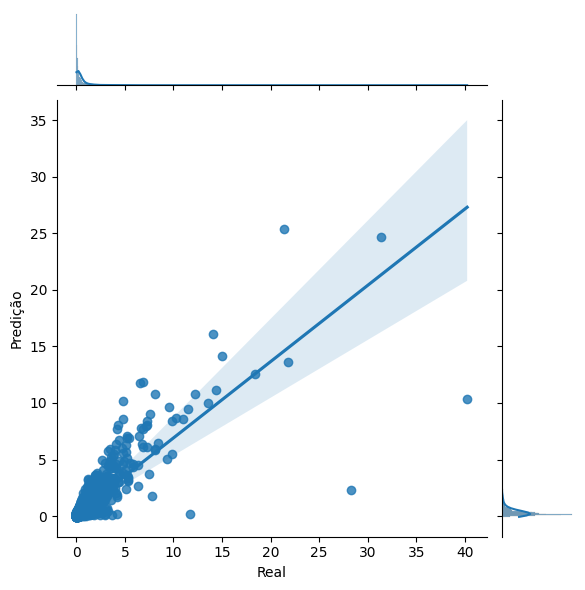

In [ ]:
test_EU_GB = pd.DataFrame({'Predição':yRidPre_EU_GB,'Real':y_test_EU_GB})
fig = plt.figure(figsize=(16,8))
test_EU_GB = test_EU_GB.reset_index()
test_EU_GB = test_EU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_EU_GB,kind='reg',);

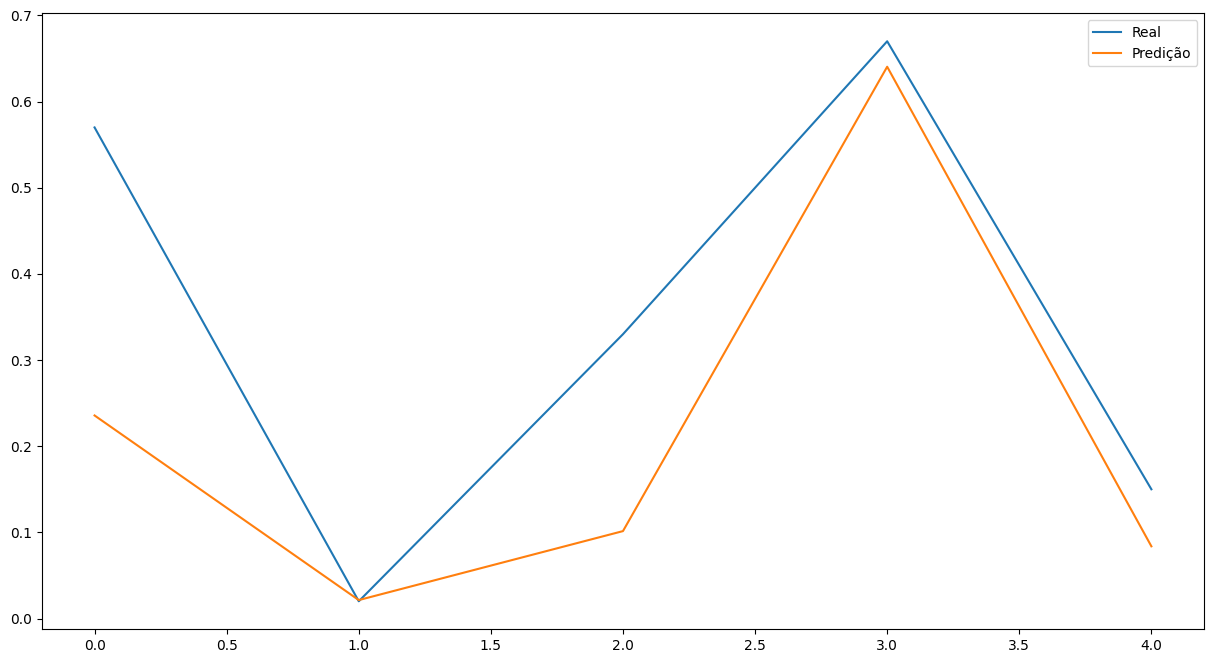

In [ ]:
dbridge1_EU_GB = dbRidge_EU_GB.head()
dbridge1_EU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_EU_GB.coef_

array([ 0.00064054, -0.13217664,  0.0027411 ,  0.02124519,  0.30123419])

------------------------------------------

**LinearRegression**

In [ ]:
lr_EU_GB = LinearRegression()
lr_EU_GB.fit(x_train_EU_GB,y_train_EU_GB)

LinearRegression()

In [ ]:
lr_EU_GB.score(x_train_EU_GB,y_train_EU_GB)

0.8183718008537416

In [ ]:
lr_EU_GB.score(x_test_EU_GB,y_test_EU_GB)

0.7034637356888962

In [ ]:
yLinearPre_EU_GB = lr_EU_GB.predict(x_test_EU_GB)

In [ ]:
r2Linear_EU_GB = r2_score(y_test_EU_GB , yLinearPre_EU_GB)
r2Linear_EU_GB

0.7034637356888962

<Figure size 1600x800 with 0 Axes>

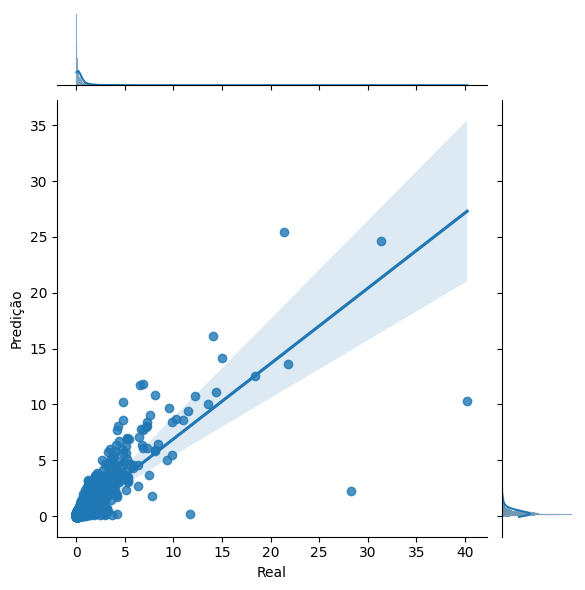

In [ ]:
test_EU_GB = pd.DataFrame({'Predição':yLinearPre_EU_GB,'Real':y_test_EU_GB})
fig= plt.figure(figsize=(16,8))
test_EU_GB = test_EU_GB.reset_index()
test_EU_GB = test_EU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_EU_GB,kind='reg',);

In [ ]:
mae_EU_GB = mean_absolute_error(yLinearPre_EU_GB, y_test_EU_GB)
print('Erro Absoluto Médio '+str(mae_EU_GB))

Erro Absoluto Médio 0.25623485926468986


In [ ]:
dbLinear_EU_GB = pd.DataFrame({'Real': y_test_EU_GB, 'Predição': yLinearPre_EU_GB})
dbLinear_EU_GB

Real  Predição
0     0.57  0.235681
1     0.02  0.021381
2     0.33  0.101448
3     0.67  0.640464
4     0.15  0.083798
...    ...       ...
4068  0.05  0.010054
4069  0.23  0.556705
4070  2.20  2.602107
4071  0.19 -0.027495
4072  0.13  0.098112

[4073 rows x 2 columns]

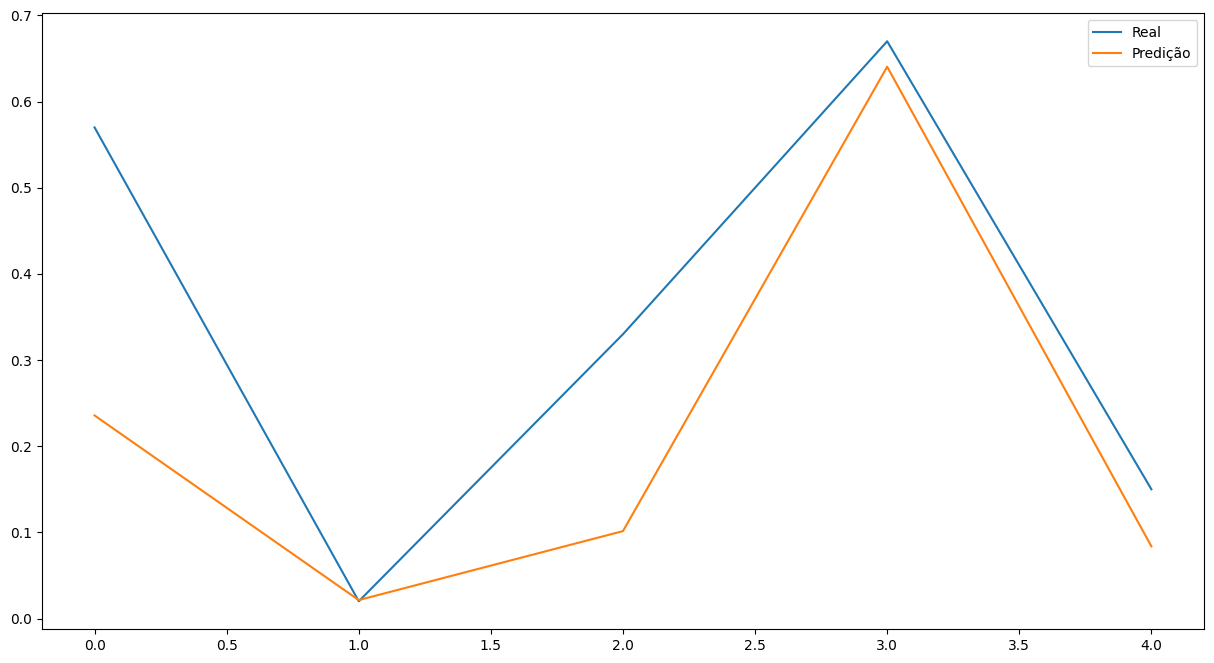

In [ ]:
dbLinear1_EU_GB = dbLinear_EU_GB.head()
dbLinear1_EU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_EU_GB.coef_

array([ 0.00064437, -0.13219289,  0.00273879,  0.02125126,  0.30123559])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_EU_GB = RandomForestRegressor()
rf_EU_GB.fit(x_train_EU_GB , y_train_EU_GB)

RandomForestRegressor()

In [ ]:
rf_EU_GB.score(x_train_EU_GB,y_train_EU_GB)

0.9783598821131774

In [ ]:
rf_EU_GB.score(x_test_EU_GB,y_test_EU_GB)

0.7742814949430679

In [ ]:
yRandomPre_EU_GB = rf_EU_GB.predict(x_test_EU_GB)

In [ ]:
r2Random_EU_GB = r2_score(y_test_EU_GB , yRandomPre_EU_GB)
r2Random_EU_GB

0.7742814949430679

In [ ]:
mae_EU_GB = mean_absolute_error(yRandomPre_EU_GB, y_test_EU_GB)
print('Erro Absoluto Médio '+str(mae_EU_GB))

Erro Absoluto Médio 0.2160596997440449


In [ ]:
dbRandom_EU_GB = pd.DataFrame({'Real': y_test_EU_GB, 'Predição': yRandomPre_EU_GB})
dbRandom_EU_GB

Real  Predição
0     0.57  0.237933
1     0.02  0.030860
2     0.33  0.316693
3     0.67  0.914100
4     0.15  0.050740
...    ...       ...
4068  0.05  0.025500
4069  0.23  0.305300
4070  2.20  2.016900
4071  0.19  0.132912
4072  0.13  0.147013

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

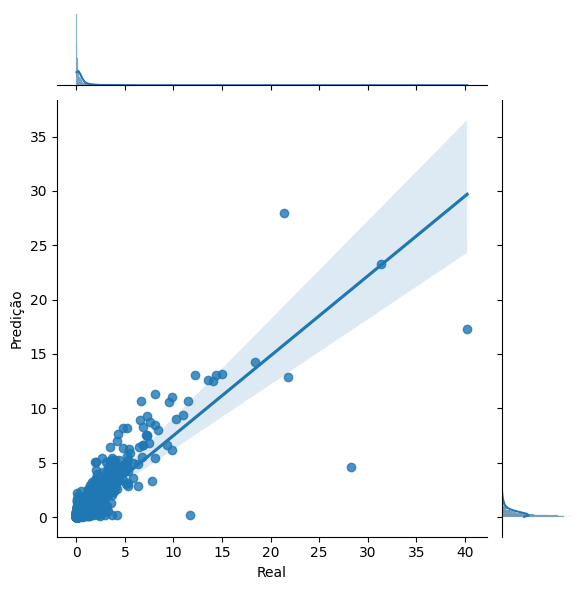

In [ ]:
test_EU_GB = pd.DataFrame({'Predição':yRandomPre_EU_GB,'Real':y_test_EU_GB})
fig= plt.figure(figsize=(16,8))
test_EU_GB = test_EU_GB.reset_index()
test_EU_GB = test_EU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_EU_GB,kind='reg',);

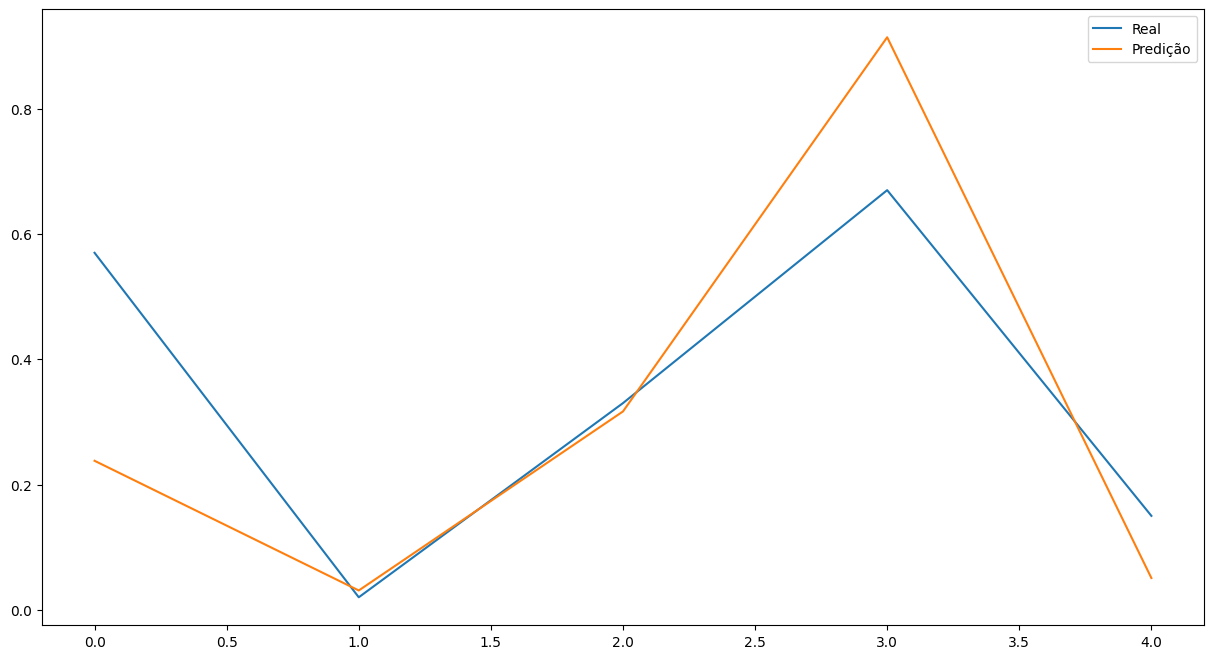

In [ ]:
dbRandom1_EU_GB = dbRandom_EU_GB.head()
dbRandom1_EU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_EU_GB.feature_importances_

array([0.0252931 , 0.0590704 , 0.02385342, 0.02626481, 0.86551827])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_EU_GB = KNeighborsRegressor()
knn_EU_GB.fit(x_train_EU_GB, y_train_EU_GB)

KNeighborsRegressor()

In [ ]:
knn_EU_GB.score(x_train_EU_GB,y_train_EU_GB)

0.8759340335123584

In [ ]:
knn_EU_GB.score(x_test_EU_GB , y_test_EU_GB)

0.7267607723185934

In [ ]:
pred_EU_GB = knn_EU_GB.predict(x_test_EU_GB)

r2_knn_EU_GB = r2_score(y_test_EU_GB,pred_EU_GB)
print(r2_knn_EU_GB)

0.7267607723185934


In [ ]:
mae_EU_GB = mean_absolute_error(pred_EU_GB, y_test_EU_GB)
print('Erro Absoluto Médio '+str(mae_EU_GB))

Erro Absoluto Médio 0.23550356002946232


In [ ]:
dbKNN_EU_GB = pd.DataFrame({'Real': y_test_EU_GB, 'Predição': pred_EU_GB})
dbKNN_EU_GB

Real  Predição
0     0.57     0.204
1     0.02     0.032
2     0.33     0.194
3     0.67     1.076
4     0.15     0.102
...    ...       ...
4068  0.05     0.036
4069  0.23     0.368
4070  2.20     2.028
4071  0.19     0.106
4072  0.13     0.146

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

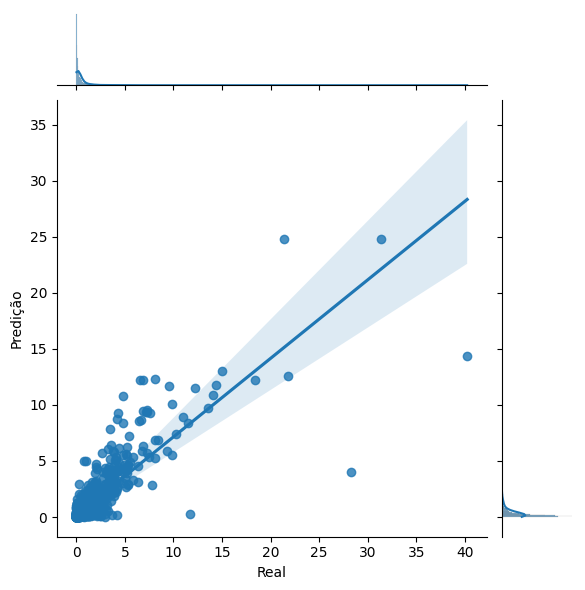

In [ ]:
test_EU_GB = pd.DataFrame({'Predição':pred_EU_GB,'Real':y_test_EU_GB})
fig= plt.figure(figsize=(16,8))
test_EU_GB = test_EU_GB.reset_index()
test_EU_GB = test_EU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_EU_GB,kind='reg',);

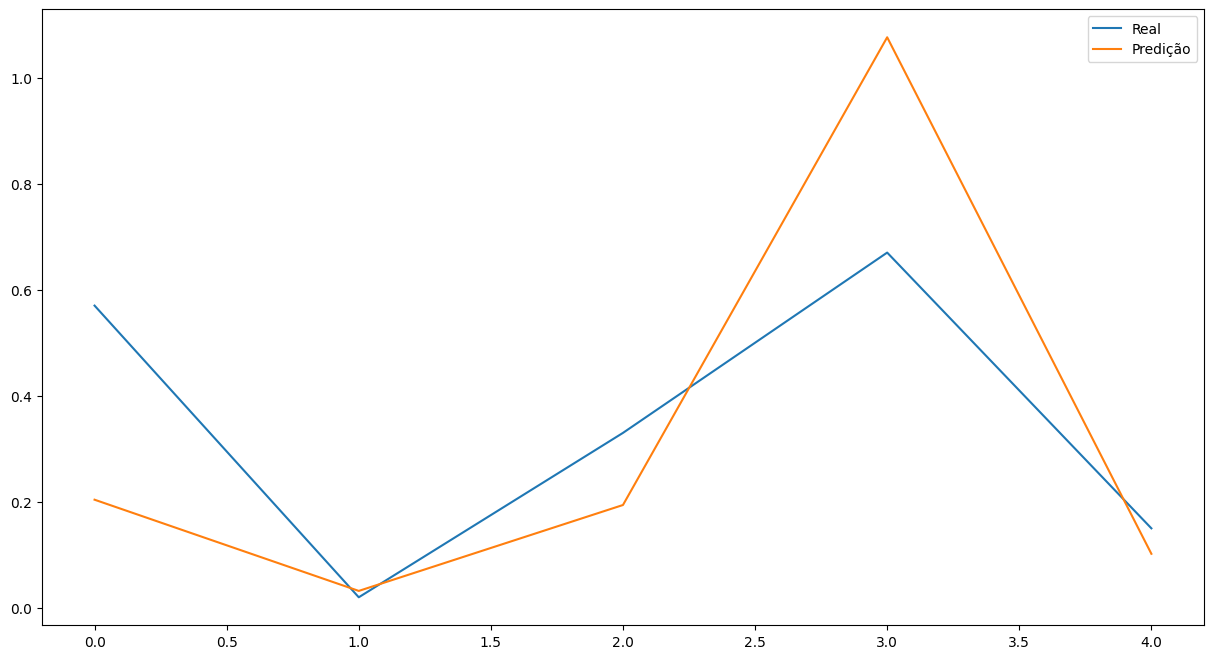

In [ ]:
dbKNN1_EU_GB = dbKNN_EU_GB.head()
dbKNN1_EU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_EU_GB = sm.add_constant(X_EU_GB)
est_EU_GB = sm.OLS(y_EU_GB, m_EU_GB)
est2_EU_GB = est_EU_GB.fit()
print(est2_EU_GB.params)

[ 4.36260681e+01 -7.61058114e-05 -2.16865107e-02 -1.16554890e-03
  8.60178126e-05  2.76492026e+00]


--------------------------------------------------------------------------------------

In [ ]:
m_EU_GB = sm.add_constant(X_EU_GB)
est_EU_GB=sm.OLS(y_EU_GB,m_EU_GB)
est2_EU_GB = est_EU_GB.fit()
print(est2_EU_GB.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 1.200e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:25:00   Log-Likelihood:                -16353.
No. Observations:               16290   AIC:                         3.272e+04
Df Residuals:                   16284   BIC:                         3.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6261      1.821     23.956      0.0

--------------------------------------------------------------------------------------

# Teste JP - GLOBAL

In [ ]:
dff_JP_GB = df.copy()

le_JP_GB = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_JP_GB[col] = le_JP_GB.fit_transform(df[col])

In [ ]:
dff_JP_GB.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_JP_GB = dff_JP_GB[['Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']].values

y_JP_GB = dff_JP_GB['Global_Sales'].values

In [ ]:
x_train_JP_GB, x_test_JP_GB, y_train_JP_GB, y_test_JP_GB = train_test_split(X_JP_GB, y_JP_GB, test_size=0.25, random_state=42)

In [ ]:
ro_JP_GB = RobustScaler()

In [ ]:
x_train_JP_GB = ro_JP_GB.fit_transform(x_train_JP_GB)
x_test_JP_GB = ro_JP_GB.fit_transform(x_test_JP_GB)


**Decision Tree**

In [ ]:
regressor_JP_GB = DecisionTreeRegressor()
regressor_JP_GB.fit(x_train_JP_GB, y_train_JP_GB)




DecisionTreeRegressor()

In [ ]:
regressor_JP_GB.score(x_train_JP_GB,y_train_JP_GB)

0.978964057072307

In [ ]:
regressor_JP_GB.score(x_test_JP_GB,y_test_JP_GB)


0.037774107184624706

In [ ]:
yTreePre_JP_GB = regressor_JP_GB.predict(x_test_JP_GB)

In [ ]:
r2Tree_JP_GB = r2_score(y_test_JP_GB ,yTreePre_JP_GB )
r2Tree_JP_GB

0.037774107184624706

In [ ]:
mae_JP_GB = mean_absolute_error(yTreePre_JP_GB, y_test_JP_GB)
print('Erro Absoluto Médio '+str(mae_JP_GB))

Erro Absoluto Médio 0.5038992496990612


In [ ]:
db_JP_GB = pd.DataFrame({'Real': y_test_JP_GB, 'Predição': yTreePre_JP_GB})
db_JP_GB

Real  Predição
0     0.57  0.123333
1     0.02  0.020000
2     0.33  0.450000
3     0.67  0.340000
4     0.15  0.536667
...    ...       ...
4068  0.05  0.010000
4069  0.23  0.020000
4070  2.20  0.040000
4071  0.19  0.470000
4072  0.13  0.214286

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

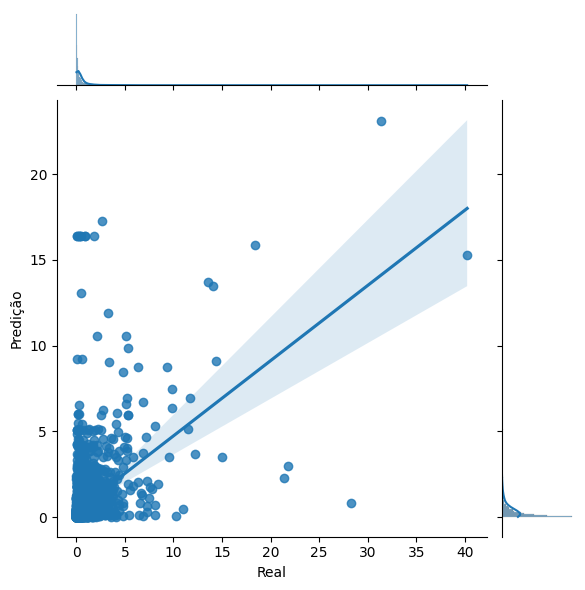

In [ ]:
test_JP_GB = pd.DataFrame({'Predição':yTreePre_JP_GB,'Real':y_test_JP_GB})
fig_JP_GB = plt.figure(figsize=(16,8))
test_JP_GB = test_JP_GB.reset_index()
test_JP_GB = test_JP_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_JP_GB,kind='reg',);

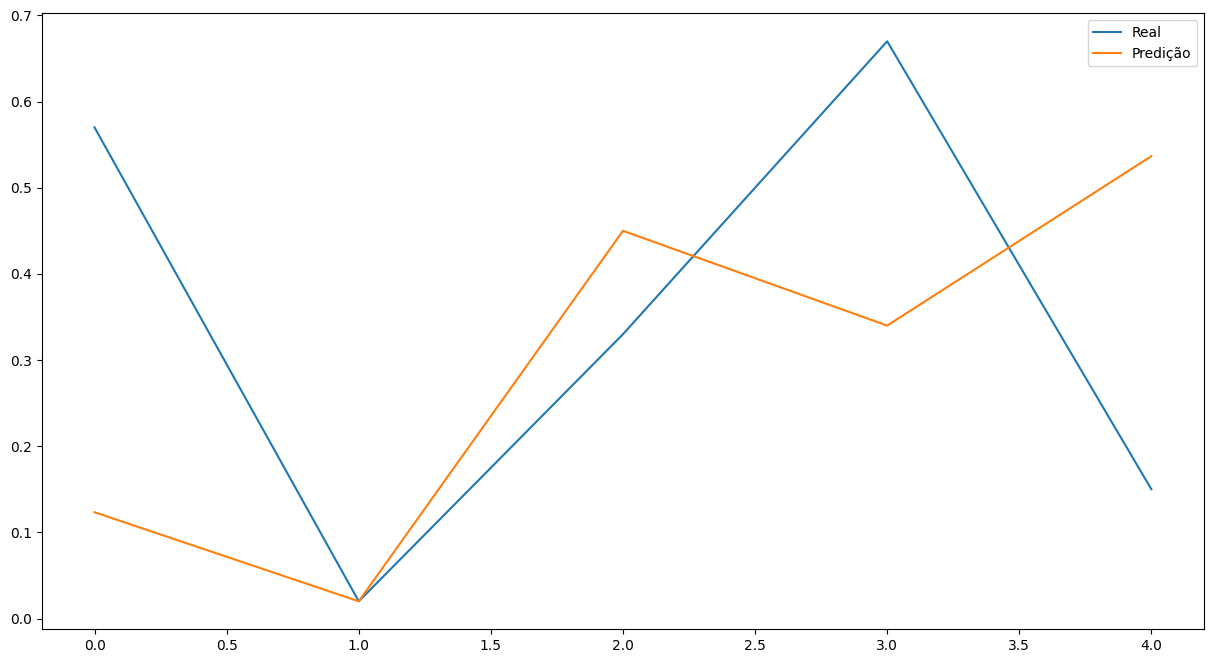

In [ ]:
db1_JP_GB = db_JP_GB.head()
db1_JP_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_JP_GB.feature_importances_

array([0.11443264, 0.08816236, 0.10733098, 0.15075756, 0.53931646])

------------------------------------------

**Ridge**

In [ ]:
rid_JP_GB = Ridge()
rid_JP_GB.fit(x_train_JP_GB,y_train_JP_GB)

Ridge()

In [ ]:
rid_JP_GB.score(x_train_JP_GB,y_train_JP_GB)

0.4026193025586555

In [ ]:
rid_JP_GB.score(x_test_JP_GB,y_test_JP_GB)

0.41866702785950904

In [ ]:
yRidPre_JP_GB = rid_JP_GB.predict(x_test_JP_GB)

In [ ]:
r2Rid_JP_GB = r2_score(y_test_JP_GB ,yRidPre_JP_GB )
r2Rid_JP_GB

0.41866702785950904

In [ ]:
mae_JP_GB = mean_absolute_error(yRidPre_JP_GB, y_test_JP_GB)
print('Erro Absoluto Médio '+str(mae_JP_GB))

Erro Absoluto Médio 0.49531129960973164


In [ ]:
dbRidge_JP_GB = pd.DataFrame({'Real': y_test_JP_GB, 'Predição': yRidPre_JP_GB})
dbRidge_JP_GB

Real  Predição
0     0.57  0.288641
1     0.02  0.443638
2     0.33  0.451734
3     0.67  1.140860
4     0.15  0.481955
...    ...       ...
4068  0.05  0.539949
4069  0.23  0.269646
4070  2.20  0.166403
4071  0.19  0.713297
4072  0.13  0.132931

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

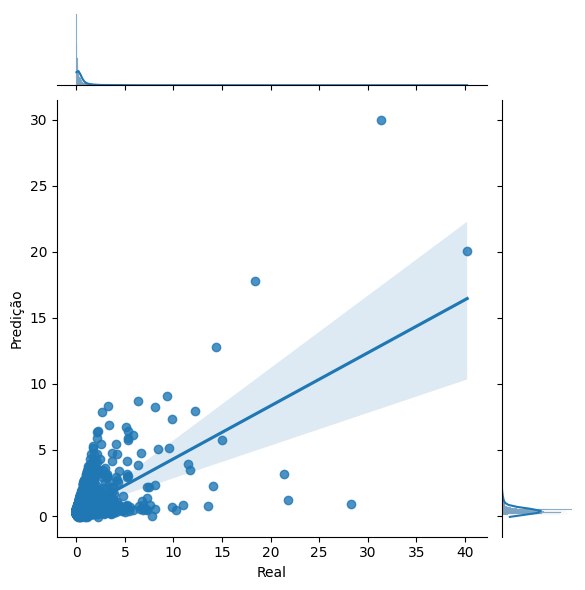

In [ ]:
test_JP_GB = pd.DataFrame({'Predição':yRidPre_JP_GB,'Real':y_test_JP_GB})
fig = plt.figure(figsize=(16,8))
test_JP_GB = test_JP_GB.reset_index()
test_JP_GB = test_JP_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_JP_GB,kind='reg',);

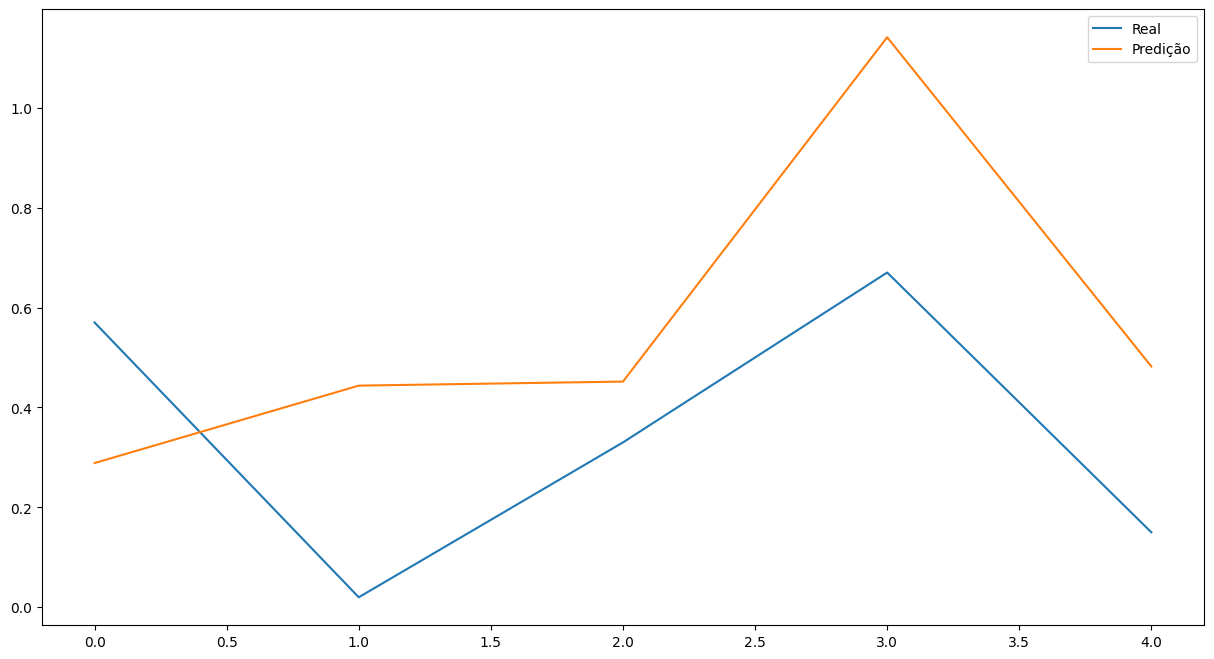

In [ ]:
dbridge1_JP_GB = dbRidge_JP_GB.head()
dbridge1_JP_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_JP_GB.coef_

array([ 0.17485663,  0.03668146, -0.00354905, -0.03592795,  0.11698165])

------------------------------------------

**LinearRegression**

In [ ]:
lr_JP_GB = LinearRegression()
lr_JP_GB.fit(x_train_JP_GB,y_train_JP_GB)

LinearRegression()

In [ ]:
lr_JP_GB.score(x_train_JP_GB,y_train_JP_GB)

0.40261930287045344

In [ ]:
lr_JP_GB.score(x_test_JP_GB,y_test_JP_GB)

0.4186670486736699

In [ ]:
yLinearPre_JP_GB = lr_JP_GB.predict(x_test_JP_GB)

In [ ]:
r2Linear_JP_GB = r2_score(y_test_JP_GB , yLinearPre_JP_GB)
r2Linear_JP_GB

0.4186670486736699

<Figure size 1600x800 with 0 Axes>

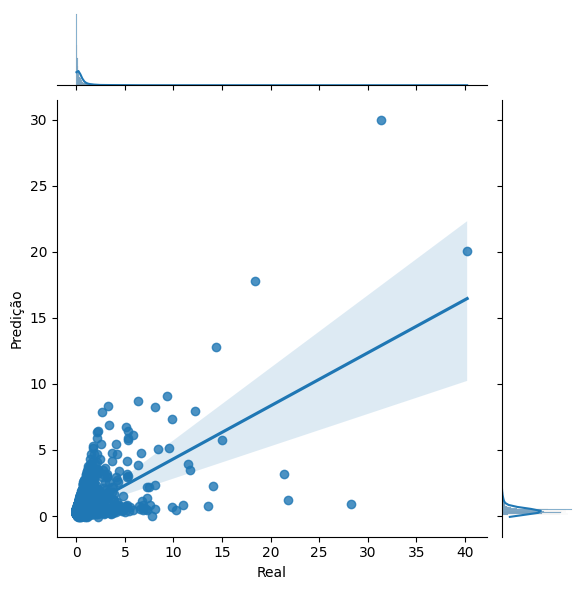

In [ ]:
test_JP_GB = pd.DataFrame({'Predição':yLinearPre_JP_GB,'Real':y_test_JP_GB})
fig= plt.figure(figsize=(16,8))
test_JP_GB = test_JP_GB.reset_index()
test_JP_GB = test_JP_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_JP_GB,kind='reg',);

In [ ]:
mae_JP_GB = mean_absolute_error(yLinearPre_JP_GB, y_test_JP_GB)
print('Erro Absoluto Médio '+str(mae_JP_GB))

Erro Absoluto Médio 0.4953125911413111


In [ ]:
dbLinear_JP_GB = pd.DataFrame({'Real': y_test_JP_GB, 'Predição': yLinearPre_JP_GB})
dbLinear_JP_GB

Real  Predição
0     0.57  0.288640
1     0.02  0.443651
2     0.33  0.451766
3     0.67  1.140854
4     0.15  0.481993
...    ...       ...
4068  0.05  0.539990
4069  0.23  0.269652
4070  2.20  0.166370
4071  0.19  0.713255
4072  0.13  0.132887

[4073 rows x 2 columns]

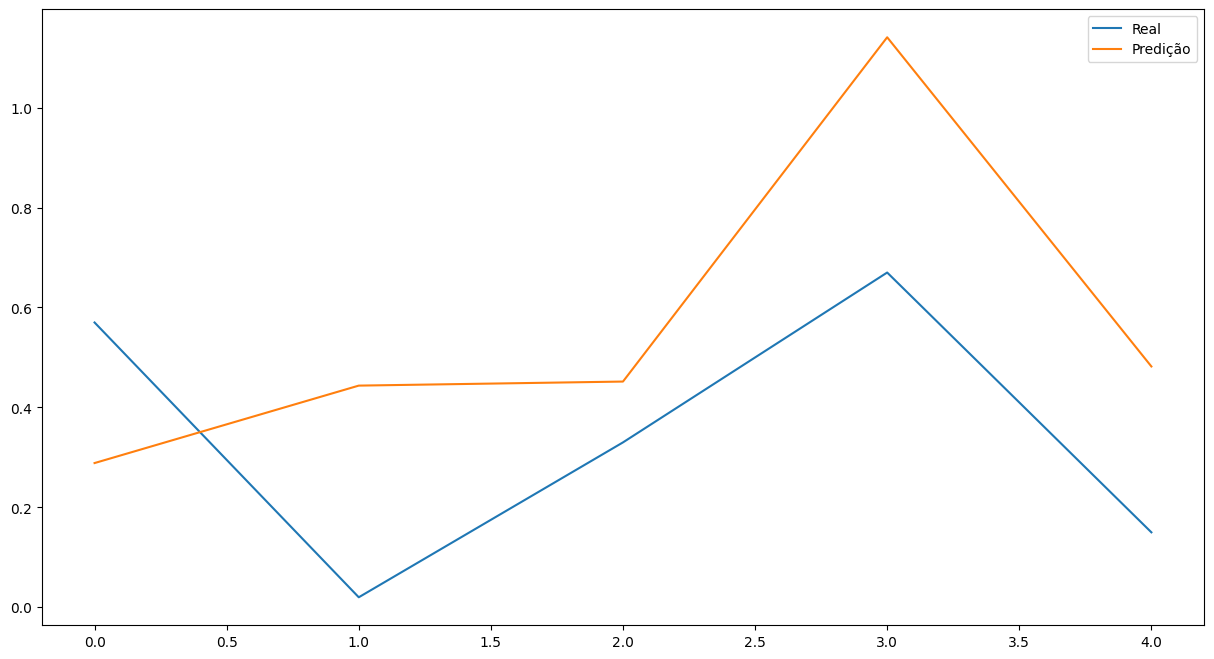

In [ ]:
dbLinear1_JP_GB = dbLinear_JP_GB.head()
dbLinear1_JP_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_JP_GB.coef_

array([ 0.1748971 ,  0.03668133, -0.0035521 , -0.03593729,  0.11698212])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_JP_GB = RandomForestRegressor()
rf_JP_GB.fit(x_train_JP_GB , y_train_JP_GB)

RandomForestRegressor()

In [ ]:
rf_JP_GB.score(x_train_JP_GB,y_train_JP_GB)

0.9327756036575807

In [ ]:
rf_JP_GB.score(x_test_JP_GB,y_test_JP_GB)

0.4465454618320731

In [ ]:
yRandomPre_JP_GB = rf_JP_GB.predict(x_test_JP_GB)

In [ ]:
r2Random_JP_GB = r2_score(y_test_JP_GB , yRandomPre_JP_GB)
r2Random_JP_GB

0.4465454618320731

In [ ]:
mae_JP_GB = mean_absolute_error(yRandomPre_JP_GB, y_test_JP_GB)
print('Erro Absoluto Médio '+str(mae_JP_GB))

Erro Absoluto Médio 0.41991304200269564


In [ ]:
dbRandom_JP_GB = pd.DataFrame({'Real': y_test_JP_GB, 'Predição': yRandomPre_JP_GB})
dbRandom_JP_GB

Real  Predição
0     0.57  0.247900
1     0.02  0.020100
2     0.33  0.319337
3     0.67  0.766400
4     0.15  0.463513
...    ...       ...
4068  0.05  0.040213
4069  0.23  0.091342
4070  2.20  0.138267
4071  0.19  0.685308
4072  0.13  0.214581

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

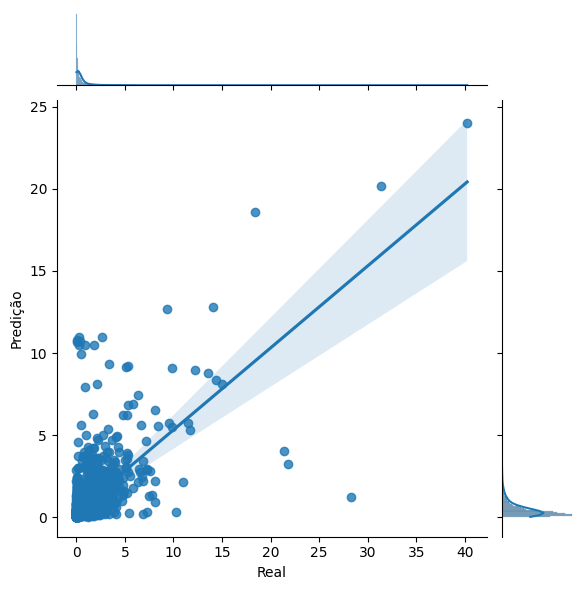

In [ ]:
test_JP_GB = pd.DataFrame({'Predição':yRandomPre_JP_GB,'Real':y_test_JP_GB})
fig= plt.figure(figsize=(16,8))
test_JP_GB = test_JP_GB.reset_index()
test_JP_GB = test_JP_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_JP_GB,kind='reg',);

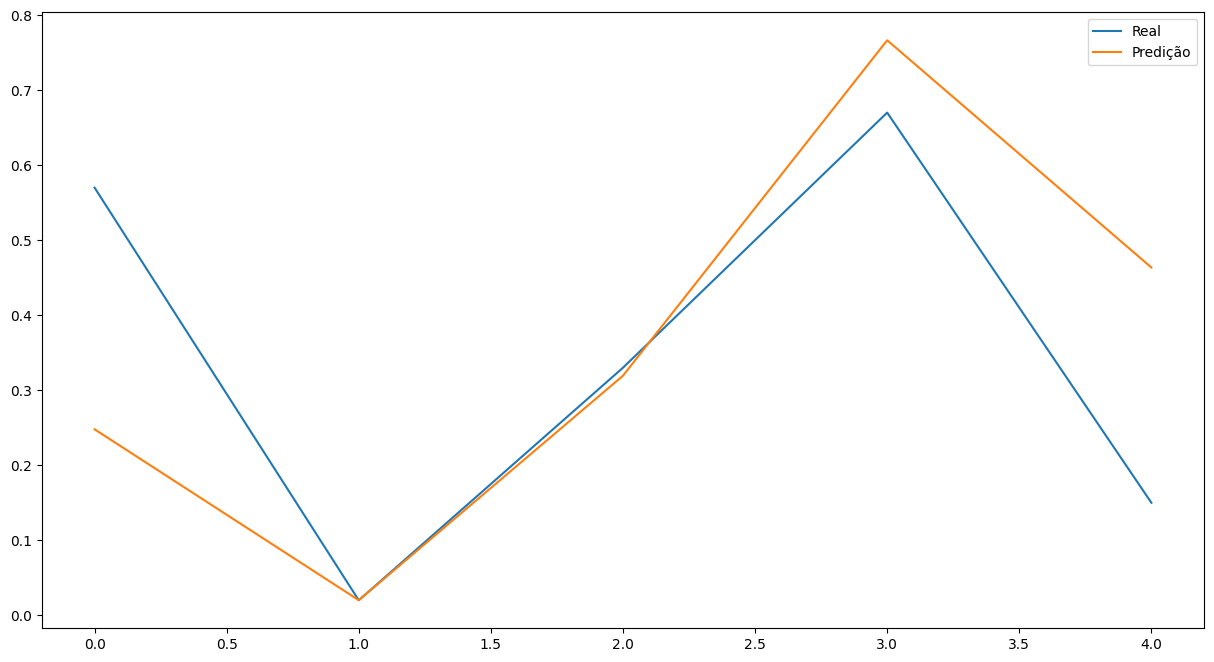

In [ ]:
dbRandom1_JP_GB = dbRandom_JP_GB.head()
dbRandom1_JP_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_JP_GB.feature_importances_

array([0.12676909, 0.10253755, 0.092648  , 0.14571192, 0.53233344])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_JP_GB = KNeighborsRegressor()
knn_JP_GB.fit(x_train_JP_GB, y_train_JP_GB)

KNeighborsRegressor()

In [ ]:
knn_JP_GB.score(x_train_JP_GB,y_train_JP_GB)

0.576671359239699

In [ ]:
knn_JP_GB.score(x_test_JP_GB , y_test_JP_GB)

0.40803750059166455

In [ ]:
pred_JP_GB = knn_JP_GB.predict(x_test_JP_GB)

r2_knn_JP_GB = r2_score(y_test_JP_GB,pred_JP_GB)
print(r2_knn_JP_GB)

0.40803750059166455


In [ ]:
mae_JP_GB = mean_absolute_error(pred_JP_GB, y_test_JP_GB)
print('Erro Absoluto Médio '+str(mae_JP_GB))

Erro Absoluto Médio 0.4511956788607906


In [ ]:
dbKNN_JP_GB = pd.DataFrame({'Real': y_test_JP_GB, 'Predição': pred_JP_GB})
dbKNN_JP_GB

Real  Predição
0     0.57     0.146
1     0.02     0.020
2     0.33     0.402
3     0.67     0.656
4     0.15     0.348
...    ...       ...
4068  0.05     0.108
4069  0.23     0.120
4070  2.20     0.110
4071  0.19     0.366
4072  0.13     0.156

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

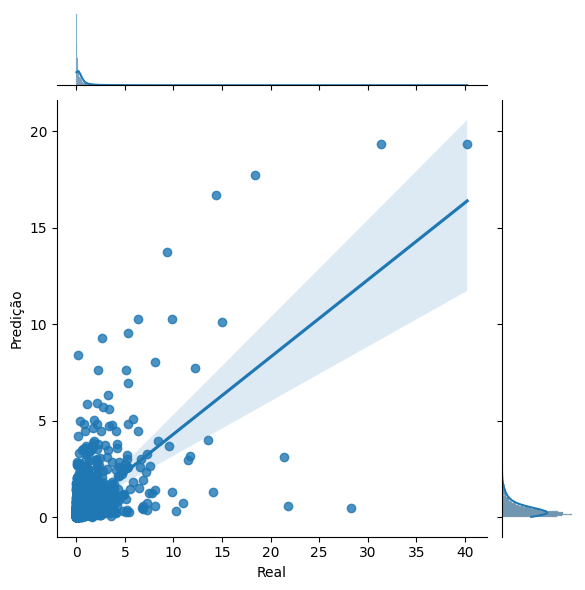

In [ ]:
test_JP_GB = pd.DataFrame({'Predição':pred_JP_GB,'Real':y_test_JP_GB})
fig= plt.figure(figsize=(16,8))
test_JP_GB = test_JP_GB.reset_index()
test_JP_GB = test_JP_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_JP_GB,kind='reg',);

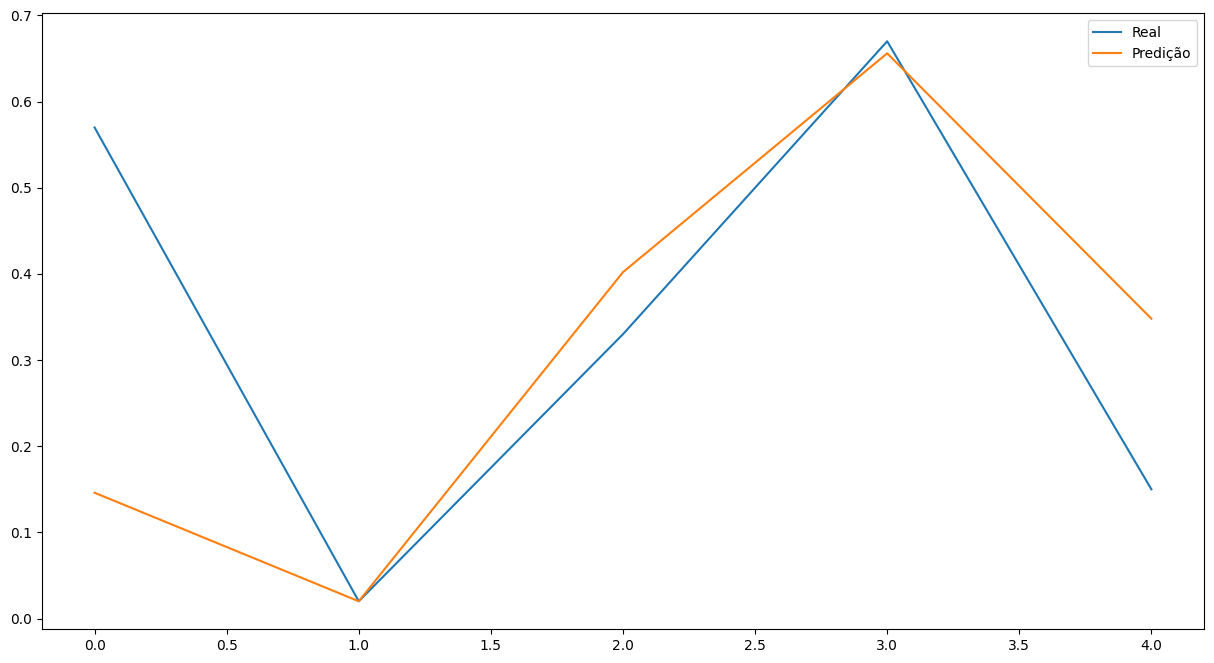

In [ ]:
dbKNN1_JP_GB = dbKNN_JP_GB.head()
dbKNN1_JP_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_JP_GB = sm.add_constant(X_JP_GB)
est_JP_GB = sm.OLS(y_JP_GB, m_JP_GB)
est2_JP_GB = est_JP_GB.fit()
print(est2_JP_GB.params)

[-7.42200829e+00  1.28856527e-02  3.76450584e-03 -2.70840595e-05
 -1.07065235e-04  2.95637924e+00]


--------------------------------------------------------------------------------------

In [ ]:
m_JP_GB = sm.add_constant(X_JP_GB)
est_JP_GB=sm.OLS(y_JP_GB,m_JP_GB)
est2_JP_GB = est_JP_GB.fit()
print(est2_JP_GB.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2237.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:25:29   Log-Likelihood:                -24669.
No. Observations:               16290   AIC:                         4.935e+04
Df Residuals:                   16284   BIC:                         4.940e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4220      3.073     -2.415      0.0

--------------------------------------------------------------------------------------

# Teste OU - GLOBAL

In [ ]:
dff_OU_GB = df.copy()

le_OU_GB = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_OU_GB[col] = le_OU_GB.fit_transform(df[col])

In [ ]:
dff_OU_GB.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_OU_GB = dff_OU_GB[['Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']].values

y_OU_GB = dff_OU_GB['Global_Sales'].values

In [ ]:
x_train_OU_GB, x_test_OU_GB, y_train_OU_GB, y_test_OU_GB = train_test_split(X_OU_GB, y_OU_GB, test_size=0.25, random_state=42)

In [ ]:
ro_OU_GB = RobustScaler()

In [ ]:
x_train_OU_GB = ro_OU_GB.fit_transform(x_train_OU_GB)
x_test_OU_GB = ro_OU_GB.fit_transform(x_test_OU_GB)


**Decision Tree**

In [ ]:
regressor_OU_GB = DecisionTreeRegressor()
regressor_OU_GB.fit(x_train_OU_GB, y_train_OU_GB)




DecisionTreeRegressor()

In [ ]:
regressor_OU_GB.score(x_train_OU_GB,y_train_OU_GB)

0.9975795019391419

In [ ]:
regressor_OU_GB.score(x_test_OU_GB,y_test_OU_GB)


0.4933407912695288

In [ ]:
yTreePre_OU_GB = regressor_OU_GB.predict(x_test_OU_GB)

In [ ]:
r2Tree_OU_GB = r2_score(y_test_OU_GB ,yTreePre_OU_GB )
r2Tree_OU_GB

0.4933407912695288

In [ ]:
mae_OU_GB = mean_absolute_error(yTreePre_OU_GB, y_test_OU_GB)
print('Erro Absoluto Médio '+str(mae_OU_GB))

Erro Absoluto Médio 0.2523819461494394


In [ ]:
db_OU_GB = pd.DataFrame({'Real': y_test_OU_GB, 'Predição': yTreePre_OU_GB})
db_OU_GB

Real  Predição
0     0.57  0.660000
1     0.02  0.030000
2     0.33  0.280000
3     0.67  0.660000
4     0.15  0.180000
...    ...       ...
4068  0.05  0.010000
4069  0.23  0.270000
4070  2.20  2.200000
4071  0.19  0.120000
4072  0.13  0.136667

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

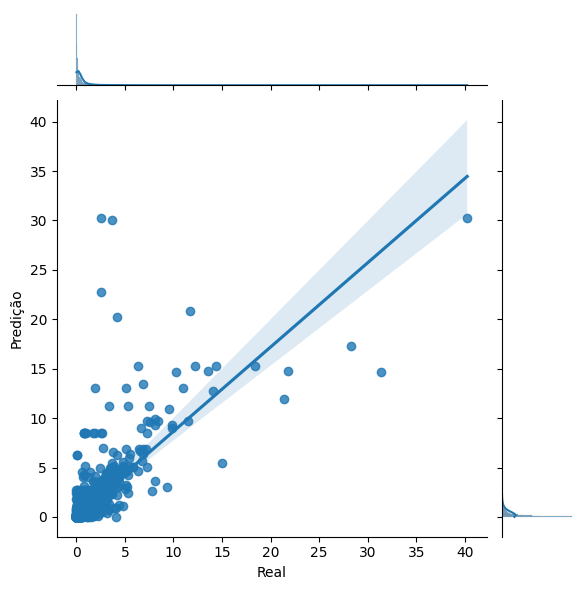

In [ ]:
test_OU_GB = pd.DataFrame({'Predição':yTreePre_OU_GB,'Real':y_test_OU_GB})
fig_OU_GB = plt.figure(figsize=(16,8))
test_OU_GB = test_OU_GB.reset_index()
test_OU_GB = test_OU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_OU_GB,kind='reg',);

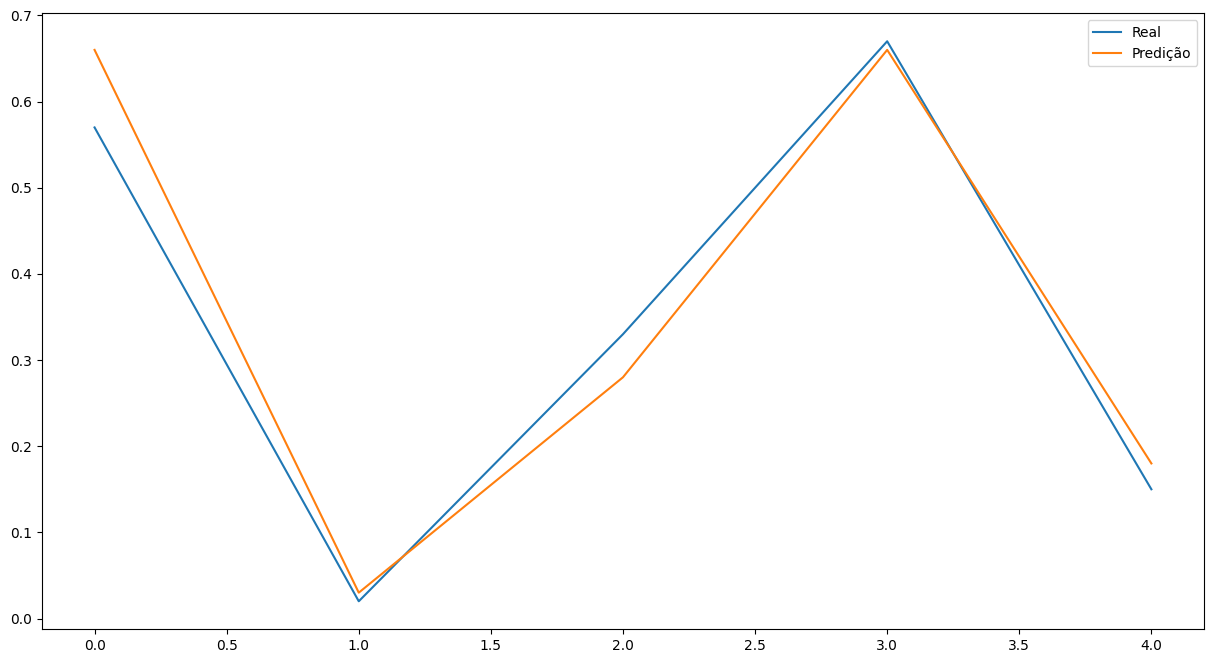

In [ ]:
db1_OU_GB = db_OU_GB.head()
db1_OU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_OU_GB.feature_importances_

array([0.08010353, 0.10559086, 0.01198675, 0.08418802, 0.71813084])

------------------------------------------

**Ridge**

In [ ]:
rid_OU_GB = Ridge()
rid_OU_GB.fit(x_train_OU_GB,y_train_OU_GB)

Ridge()

In [ ]:
rid_OU_GB.score(x_train_OU_GB,y_train_OU_GB)

0.5748472538289269

In [ ]:
rid_OU_GB.score(x_test_OU_GB,y_test_OU_GB)

0.34368073109774666

In [ ]:
yRidPre_OU_GB = rid_OU_GB.predict(x_test_OU_GB)

In [ ]:
r2Rid_OU_GB = r2_score(y_test_OU_GB ,yRidPre_OU_GB )
r2Rid_OU_GB

0.34368073109774666

In [ ]:
mae_OU_GB = mean_absolute_error(yRidPre_OU_GB, y_test_OU_GB)
print('Erro Absoluto Médio '+str(mae_OU_GB))

Erro Absoluto Médio 0.33635463870353766


In [ ]:
dbRidge_OU_GB = pd.DataFrame({'Real': y_test_OU_GB, 'Predição': yRidPre_OU_GB})
dbRidge_OU_GB

Real  Predição
0     0.57  0.800275
1     0.02  0.083096
2     0.33  0.323584
3     0.67  0.699076
4     0.15  0.237558
...    ...       ...
4068  0.05  0.002507
4069  0.23  0.606762
4070  2.20  1.638088
4071  0.19  0.008013
4072  0.13  0.245667

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

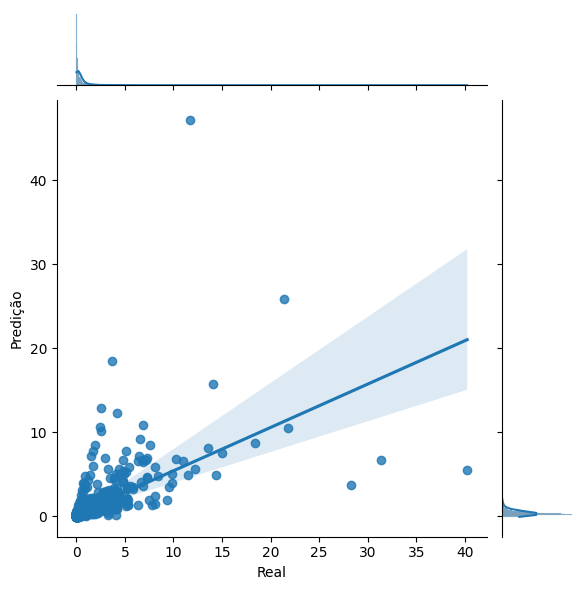

In [ ]:
test_OU_GB = pd.DataFrame({'Predição':yRidPre_OU_GB,'Real':y_test_OU_GB})
fig = plt.figure(figsize=(16,8))
test_OU_GB = test_OU_GB.reset_index()
test_OU_GB = test_OU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_OU_GB,kind='reg',);

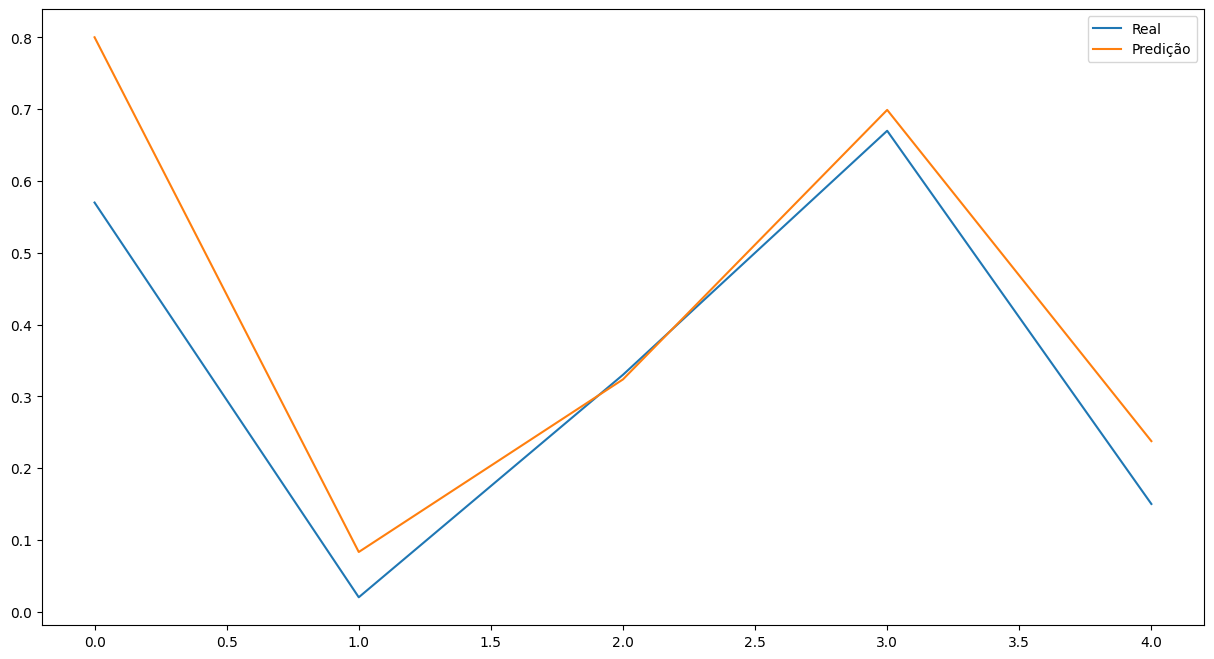

In [ ]:
dbridge1_OU_GB = dbRidge_OU_GB.head()
dbridge1_OU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_OU_GB.coef_

array([ 0.00543971, -0.18214496,  0.01309401,  0.02487992,  0.24868676])

------------------------------------------

**LinearRegression**

In [ ]:
lr_OU_GB = LinearRegression()
lr_OU_GB.fit(x_train_OU_GB,y_train_OU_GB)

LinearRegression()

In [ ]:
lr_OU_GB.score(x_train_OU_GB,y_train_OU_GB)

0.5748472540223333

In [ ]:
lr_OU_GB.score(x_test_OU_GB,y_test_OU_GB)

0.34367988037721786

In [ ]:
yLinearPre_OU_GB = lr_OU_GB.predict(x_test_OU_GB)

In [ ]:
r2Linear_OU_GB = r2_score(y_test_OU_GB , yLinearPre_OU_GB)
r2Linear_OU_GB

0.34367988037721786

<Figure size 1600x800 with 0 Axes>

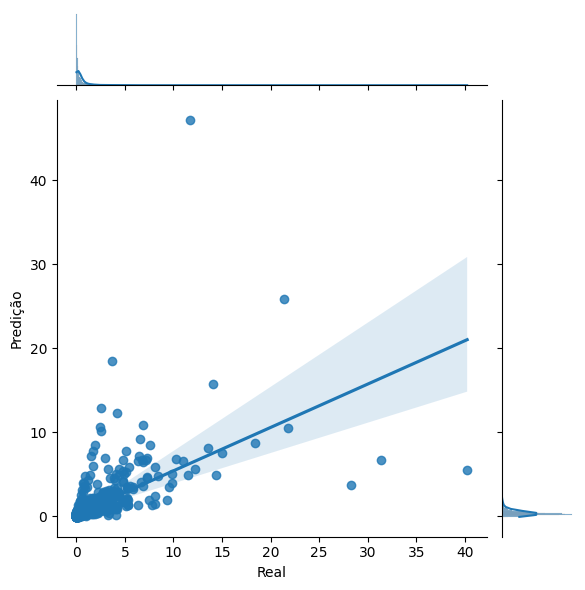

In [ ]:
test_OU_GB = pd.DataFrame({'Predição':yLinearPre_OU_GB,'Real':y_test_OU_GB})
fig= plt.figure(figsize=(16,8))
test_OU_GB = test_OU_GB.reset_index()
test_OU_GB = test_OU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_OU_GB,kind='reg',);

In [ ]:
mae_OU_GB = mean_absolute_error(yLinearPre_OU_GB, y_test_OU_GB)
print('Erro Absoluto Médio '+str(mae_OU_GB))

Erro Absoluto Médio 0.3363563358410542


In [ ]:
dbLinear_OU_GB = pd.DataFrame({'Real': y_test_OU_GB, 'Predição': yLinearPre_OU_GB})
dbLinear_OU_GB

Real  Predição
0     0.57  0.800285
1     0.02  0.083077
2     0.33  0.323582
3     0.67  0.699103
4     0.15  0.237555
...    ...       ...
4068  0.05  0.002482
4069  0.23  0.606788
4070  2.20  1.638082
4071  0.19  0.007979
4072  0.13  0.245657

[4073 rows x 2 columns]

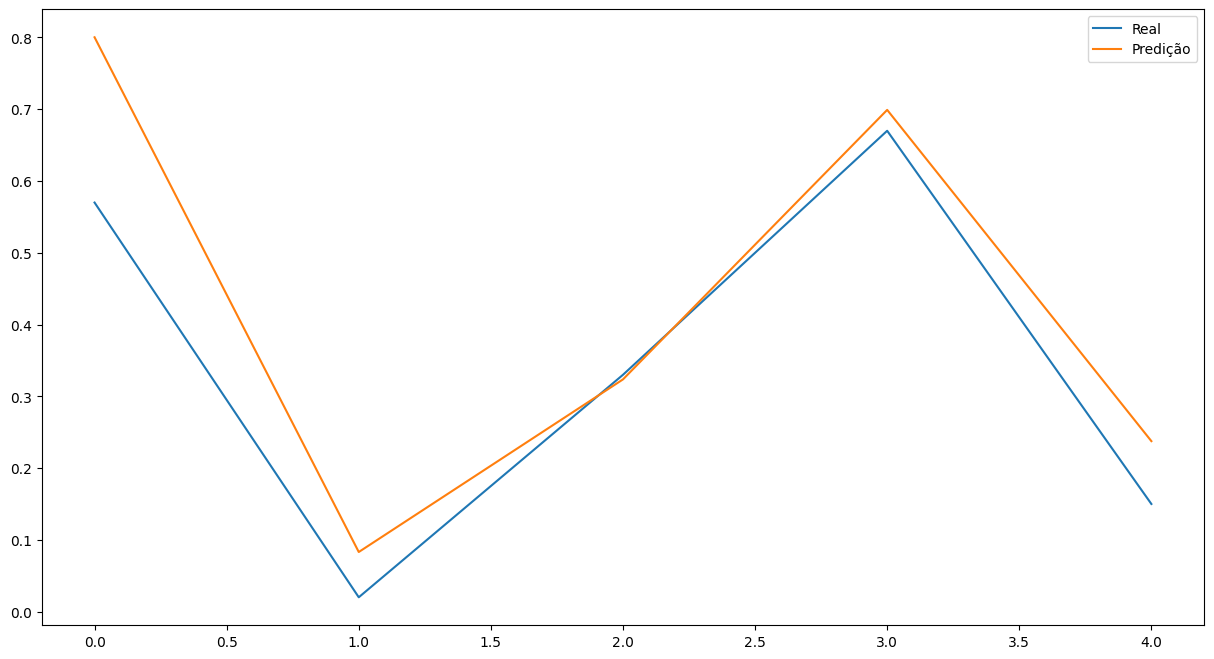

In [ ]:
dbLinear1_OU_GB = dbLinear_OU_GB.head()
dbLinear1_OU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_OU_GB.coef_

array([ 0.00544606, -0.18216749,  0.01309351,  0.02488733,  0.24868804])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_OU_GB = RandomForestRegressor()
rf_OU_GB.fit(x_train_OU_GB , y_train_OU_GB)

RandomForestRegressor()

In [ ]:
rf_OU_GB.score(x_train_OU_GB,y_train_OU_GB)

0.9791801185152351

In [ ]:
rf_OU_GB.score(x_test_OU_GB,y_test_OU_GB)

0.6893291620452453

In [ ]:
yRandomPre_OU_GB = rf_OU_GB.predict(x_test_OU_GB)

In [ ]:
r2Random_OU_GB = r2_score(y_test_OU_GB , yRandomPre_OU_GB)
r2Random_OU_GB

0.6893291620452453

In [ ]:
mae_OU_GB = mean_absolute_error(yRandomPre_OU_GB, y_test_OU_GB)
print('Erro Absoluto Médio '+str(mae_OU_GB))

Erro Absoluto Médio 0.19301605685919718


In [ ]:
dbRandom_OU_GB = pd.DataFrame({'Real': y_test_OU_GB, 'Predição': yRandomPre_OU_GB})
dbRandom_OU_GB

Real  Predição
0     0.57  0.704100
1     0.02  0.030860
2     0.33  0.261200
3     0.67  0.643100
4     0.15  0.145300
...    ...       ...
4068  0.05  0.032200
4069  0.23  0.314578
4070  2.20  2.173600
4071  0.19  0.130209
4072  0.13  0.128963

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

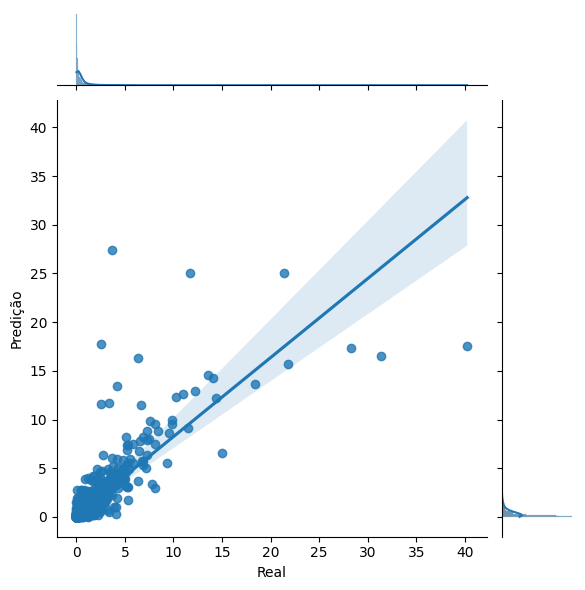

In [ ]:
test_OU_GB = pd.DataFrame({'Predição':yRandomPre_OU_GB,'Real':y_test_OU_GB})
fig= plt.figure(figsize=(16,8))
test_OU_GB = test_OU_GB.reset_index()
test_OU_GB = test_OU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_OU_GB,kind='reg',);

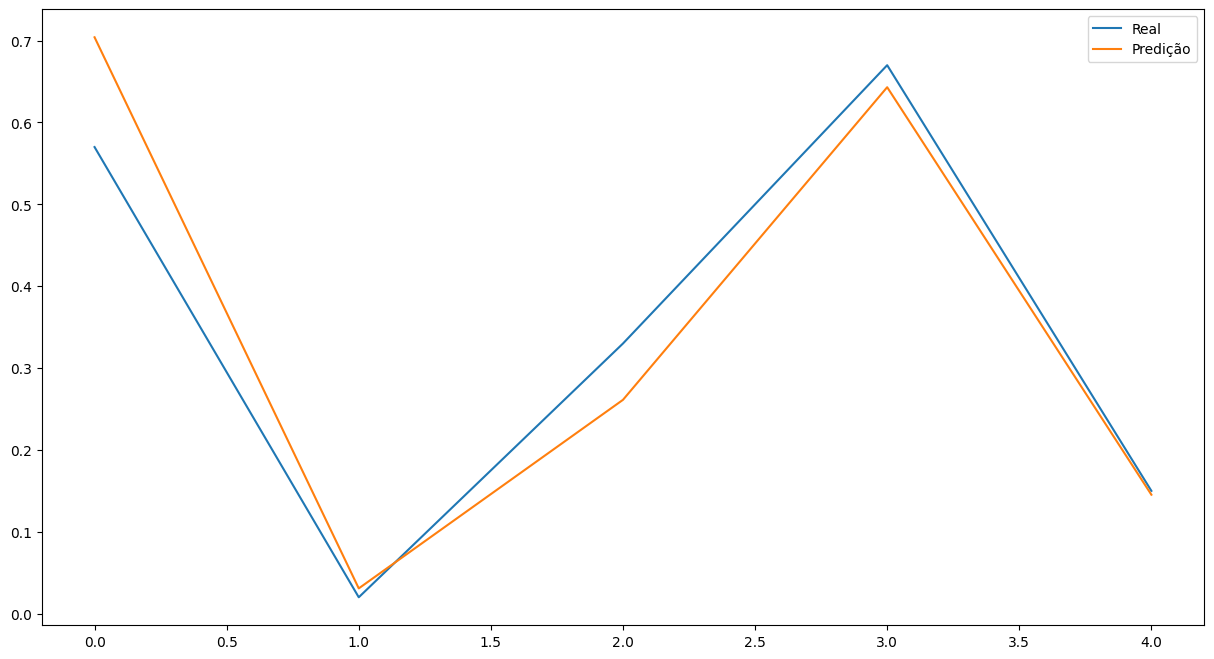

In [ ]:
dbRandom1_OU_GB = dbRandom_OU_GB.head()
dbRandom1_OU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_OU_GB.feature_importances_

array([0.10086633, 0.09811968, 0.01642249, 0.02705434, 0.75753717])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_OU_GB = KNeighborsRegressor()
knn_OU_GB.fit(x_train_OU_GB, y_train_OU_GB)

KNeighborsRegressor()

In [ ]:
knn_OU_GB.score(x_train_OU_GB,y_train_OU_GB)

0.8418710906051845

In [ ]:
knn_OU_GB.score(x_test_OU_GB , y_test_OU_GB)

0.5058562452034537

In [ ]:
pred_OU_GB = knn_OU_GB.predict(x_test_OU_GB)

r2_knn_OU_GB = r2_score(y_test_OU_GB,pred_OU_GB)
print(r2_knn_OU_GB)

0.5058562452034537


In [ ]:
mae_OU_GB = mean_absolute_error(pred_OU_GB, y_test_OU_GB)
print('Erro Absoluto Médio '+str(mae_OU_GB))

Erro Absoluto Médio 0.2296754235207464


In [ ]:
dbKNN_OU_GB = pd.DataFrame({'Real': y_test_OU_GB, 'Predição': pred_OU_GB})
dbKNN_OU_GB

Real  Predição
0     0.57     0.690
1     0.02     0.028
2     0.33     0.250
3     0.67     0.868
4     0.15     0.100
...    ...       ...
4068  0.05     0.036
4069  0.23     0.252
4070  2.20     2.890
4071  0.19     0.094
4072  0.13     0.106

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

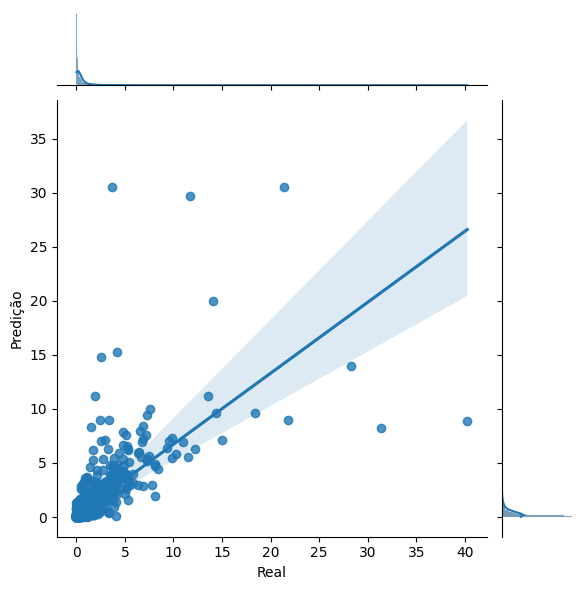

In [ ]:
test_OU_GB = pd.DataFrame({'Predição':pred_OU_GB,'Real':y_test_OU_GB})
fig= plt.figure(figsize=(16,8))
test_OU_GB = test_OU_GB.reset_index()
test_OU_GB = test_OU_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_OU_GB,kind='reg',);

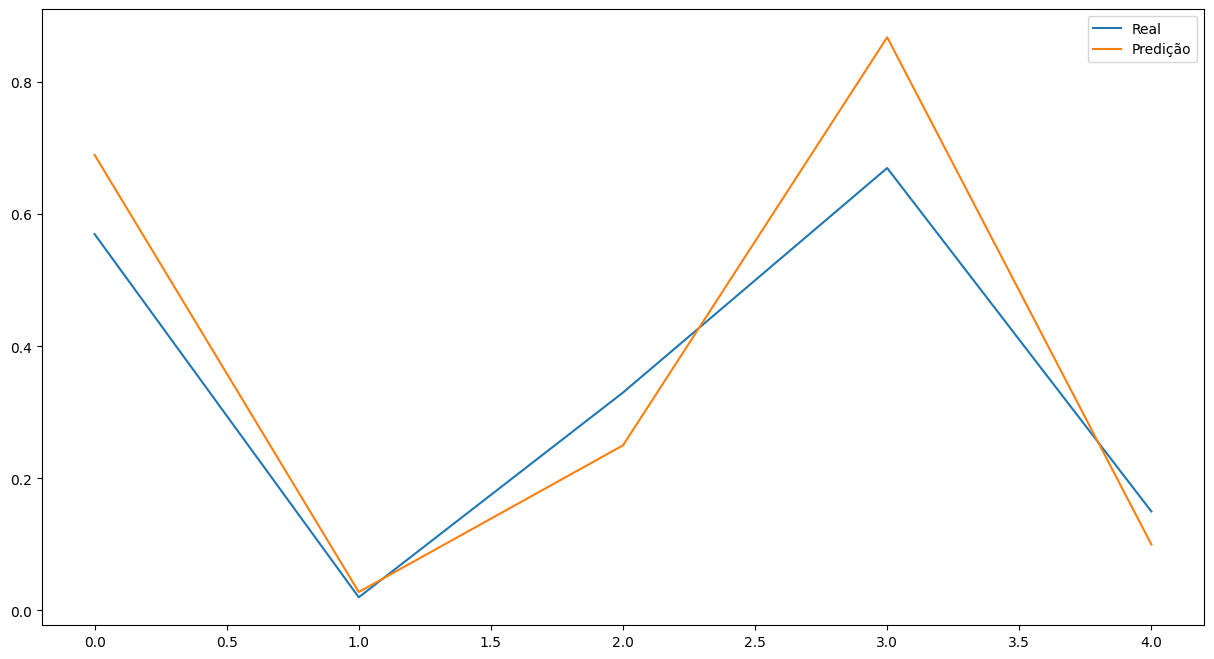

In [ ]:
dbKNN1_OU_GB = dbKNN_OU_GB.head()
dbKNN1_OU_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_OU_GB = sm.add_constant(X_OU_GB)
est_OU_GB = sm.OLS(y_OU_GB, m_OU_GB)
est2_OU_GB = est_OU_GB.fit()
print(est2_OU_GB.params)

[ 5.64570537e+01  1.16852255e-03 -2.80334676e-02  4.15036750e-04
  1.06852964e-04  5.71064084e+00]


--------------------------------------------------------------------------------------

In [ ]:
m_OU_GB = sm.add_constant(X_OU_GB)
est_OU_GB=sm.OLS(y_OU_GB,m_OU_GB)
est2_OU_GB = est_OU_GB.fit()
print(est2_OU_GB.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     3449.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:26:01   Log-Likelihood:                -23046.
No. Observations:               16290   AIC:                         4.610e+04
Df Residuals:                   16284   BIC:                         4.615e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.4571      2.748     20.543      0.0

--------------------------------------------------------------------------------------

# Teste DADOS - NA

In [ ]:
dff_DD_NA = df.copy()

le_DD_NA = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_DD_NA[col] = le_DD_NA.fit_transform(df[col])

In [ ]:
dff_DD_NA.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_DD_NA = dff_DD_NA[['Platform', 'Year', 'Genre', 'Publisher']].values

y_DD_NA = dff_DD_NA['NA_Sales'].values

In [ ]:
x_train_DD_NA, x_test_DD_NA, y_train_DD_NA, y_test_DD_NA = train_test_split(X_DD_NA, y_DD_NA, test_size=0.25, random_state=42)

In [ ]:
ro_DD_NA = RobustScaler()

In [ ]:
x_train_DD_NA = ro_DD_NA.fit_transform(x_train_DD_NA)
x_test_DD_NA = ro_DD_NA.fit_transform(x_test_DD_NA)


**Decision Tree**

In [ ]:
regressor_DD_NA = DecisionTreeRegressor()
regressor_DD_NA.fit(x_train_DD_NA, y_train_DD_NA)




DecisionTreeRegressor()

In [ ]:
regressor_DD_NA.score(x_train_DD_NA,y_train_DD_NA)

0.7286448144871533

In [ ]:
regressor_DD_NA.score(x_test_DD_NA,y_test_DD_NA)


-0.22845404111326628

In [ ]:
yTreePre_DD_NA = regressor_DD_NA.predict(x_test_DD_NA)

In [ ]:
r2Tree_DD_NA = r2_score(y_test_DD_NA ,yTreePre_DD_NA )
r2Tree_DD_NA

-0.22845404111326628

In [ ]:
mae_DD_NA = mean_absolute_error(yTreePre_DD_NA, y_test_DD_NA)
print('Erro Absoluto Médio '+str(mae_DD_NA))

Erro Absoluto Médio 0.3045610475878705


In [ ]:
db_DD_NA = pd.DataFrame({'Real': y_test_DD_NA, 'Predição': yTreePre_DD_NA})
db_DD_NA

Real  Predição
0     0.47  0.030000
1     0.00  0.000000
2     0.30  0.420000
3     0.19  0.245000
4     0.14  0.050000
...    ...       ...
4068  0.02  0.000000
4069  0.13  0.010000
4070  1.06  0.010000
4071  0.00  0.332000
4072  0.12  0.142857

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

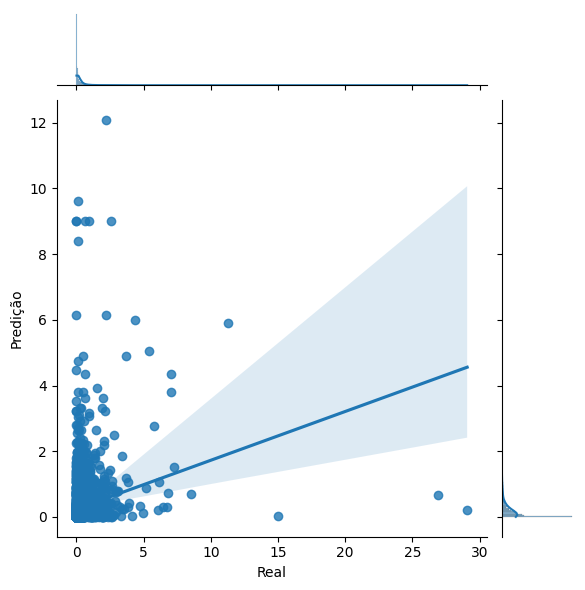

In [ ]:
test_DD_NA = pd.DataFrame({'Predição':yTreePre_DD_NA,'Real':y_test_DD_NA})
fig_DD_NA = plt.figure(figsize=(16,8))
test_DD_NA = test_DD_NA.reset_index()
test_DD_NA = test_DD_NA.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_NA,kind='reg',);

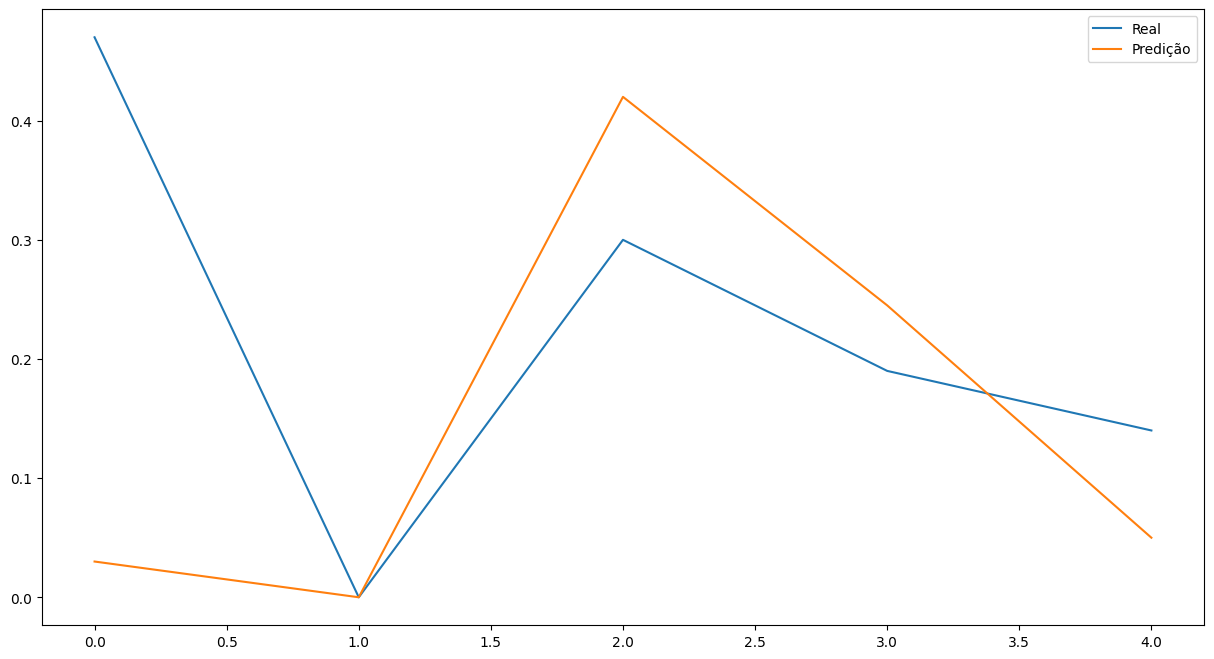

In [ ]:
db1_DD_NA = db_DD_NA.head()
db1_DD_NA.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_DD_NA.feature_importances_

array([0.13069836, 0.37231877, 0.25616455, 0.24081832])

------------------------------------------

**Ridge**

In [ ]:
rid_DD_NA = Ridge()
rid_DD_NA.fit(x_train_DD_NA,y_train_DD_NA)

Ridge()

In [ ]:
rid_DD_NA.score(x_train_DD_NA,y_train_DD_NA)

0.011285594104504915

In [ ]:
rid_DD_NA.score(x_test_DD_NA,y_test_DD_NA)

0.01626384009418358

In [ ]:
yRidPre_DD_NA = rid_DD_NA.predict(x_test_DD_NA)

In [ ]:
r2Rid_DD_NA = r2_score(y_test_DD_NA ,yRidPre_DD_NA )
r2Rid_DD_NA

0.01626384009418358

In [ ]:
mae_DD_NA = mean_absolute_error(yRidPre_DD_NA, y_test_DD_NA)
print('Erro Absoluto Médio '+str(mae_DD_NA))

Erro Absoluto Médio 0.3023571369549532


In [ ]:
dbRidge_DD_NA = pd.DataFrame({'Real': y_test_DD_NA, 'Predição': yRidPre_DD_NA})
dbRidge_DD_NA

Real  Predição
0     0.47  0.289304
1     0.00  0.207889
2     0.30  0.297801
3     0.19  0.349081
4     0.14  0.297729
...    ...       ...
4068  0.02  0.230225
4069  0.13  0.368458
4070  1.06  0.183845
4071  0.00  0.080046
4072  0.12  0.168114

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

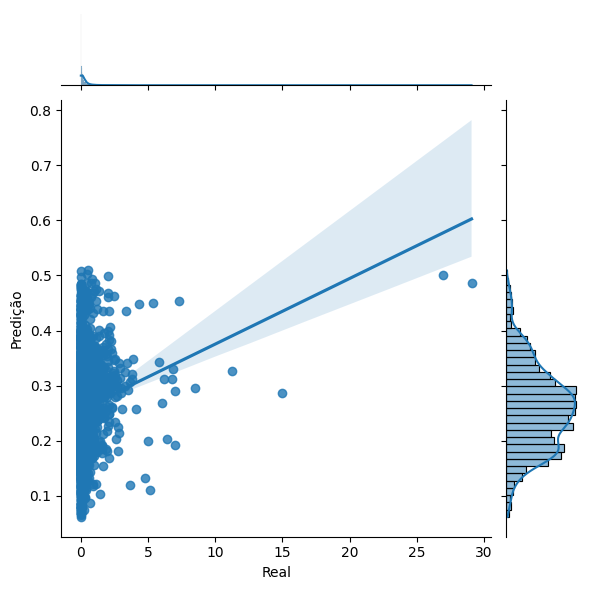

In [ ]:
test_DD_NA = pd.DataFrame({'Predição':yRidPre_DD_NA,'Real':y_test_DD_NA})
fig = plt.figure(figsize=(16,8))
test_DD_NA = test_DD_NA.reset_index()
test_DD_NA = test_DD_NA.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_NA,kind='reg',);

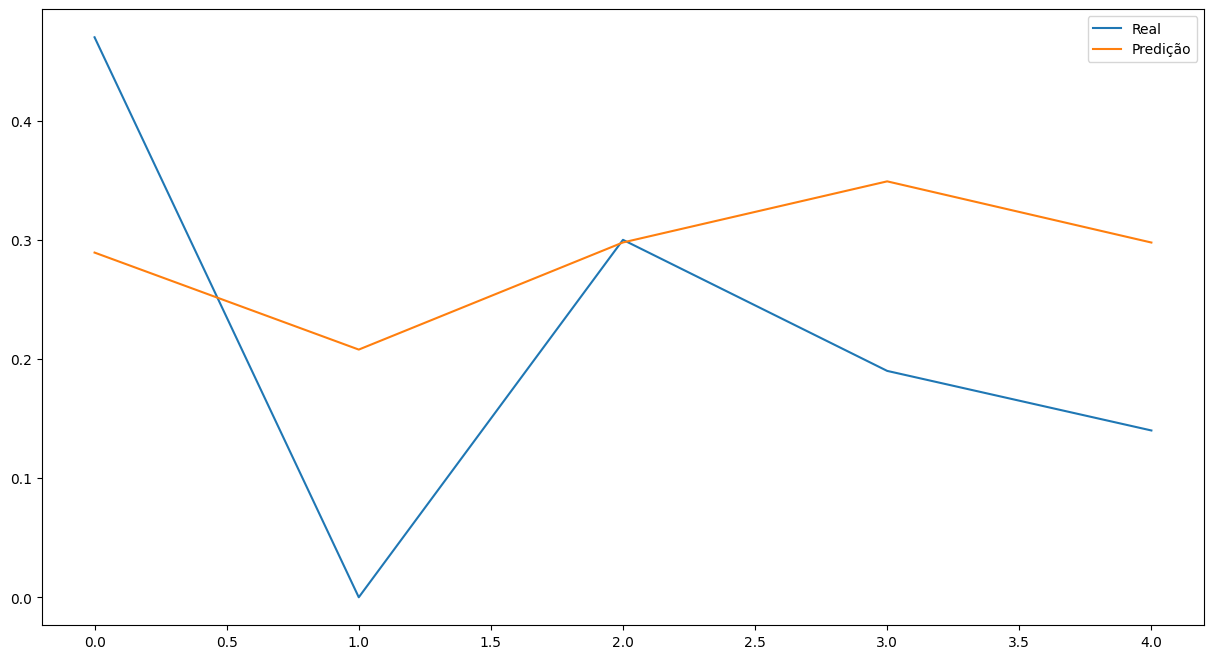

In [ ]:
dbridge1_DD_NA = dbRidge_DD_NA.head()
dbridge1_DD_NA.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_DD_NA.coef_

array([ 0.07317937, -0.08212743,  0.0058661 ,  0.00751899])

------------------------------------------

**LinearRegression**

In [ ]:
lr_DD_NA = LinearRegression()
lr_DD_NA.fit(x_train_DD_NA,y_train_DD_NA)

LinearRegression()

In [ ]:
lr_DD_NA.score(x_train_DD_NA,y_train_DD_NA)

0.011285594505959007

In [ ]:
lr_DD_NA.score(x_test_DD_NA,y_test_DD_NA)

0.01626507903769192

In [ ]:
yLinearPre_DD_NA = lr_DD_NA.predict(x_test_DD_NA)

In [ ]:
r2Linear_DD_NA = r2_score(y_test_DD_NA , yLinearPre_DD_NA)
r2Linear_DD_NA

0.01626507903769192

<Figure size 1600x800 with 0 Axes>

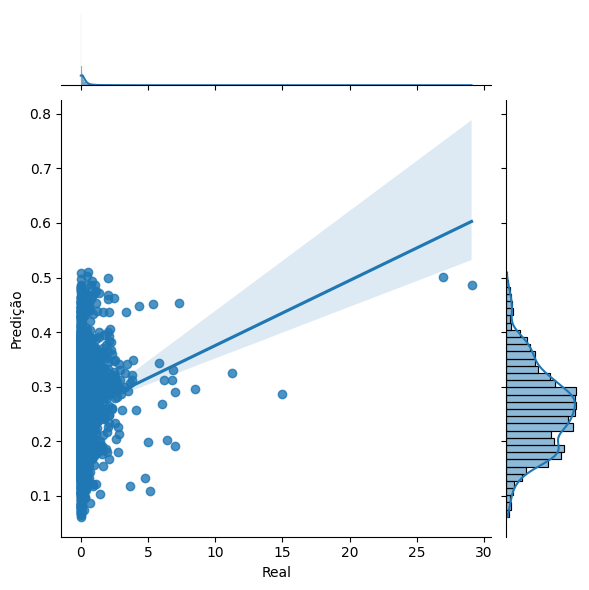

In [ ]:
test_DD_NA = pd.DataFrame({'Predição':yLinearPre_DD_NA,'Real':y_test_DD_NA})
fig= plt.figure(figsize=(16,8))
test_DD_NA = test_DD_NA.reset_index()
test_DD_NA = test_DD_NA.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_NA,kind='reg',);

In [ ]:
mae_DD_NA = mean_absolute_error(yLinearPre_DD_NA, y_test_DD_NA)
print('Erro Absoluto Médio '+str(mae_DD_NA))

Erro Absoluto Médio 0.30235645948466217


In [ ]:
dbLinear_DD_NA = pd.DataFrame({'Real': y_test_DD_NA, 'Predição': yLinearPre_DD_NA})
dbLinear_DD_NA

Real  Predição
0     0.47  0.289309
1     0.00  0.207884
2     0.30  0.297814
3     0.19  0.349094
4     0.14  0.297743
...    ...       ...
4068  0.02  0.230230
4069  0.13  0.368473
4070  1.06  0.183824
4071  0.00  0.080011
4072  0.12  0.168094

[4073 rows x 2 columns]

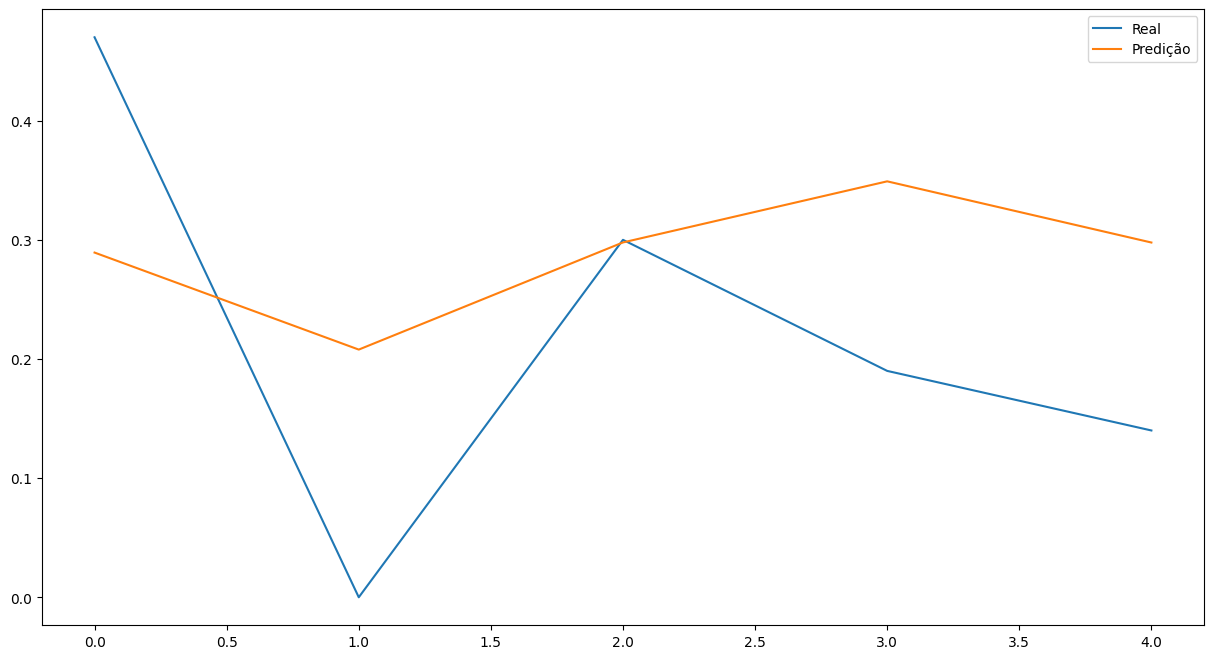

In [ ]:
dbLinear1_DD_NA = dbLinear_DD_NA.head()
dbLinear1_DD_NA.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_DD_NA.coef_

array([ 0.07319916, -0.08213962,  0.00586492,  0.00752175])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_DD_NA = RandomForestRegressor()
rf_DD_NA.fit(x_train_DD_NA , y_train_DD_NA)

RandomForestRegressor()

In [ ]:
rf_DD_NA.score(x_train_DD_NA,y_train_DD_NA)

0.6656112774641232

In [ ]:
rf_DD_NA.score(x_test_DD_NA,y_test_DD_NA)

0.028587976364768952

In [ ]:
yRandomPre_DD_NA = rf_DD_NA.predict(x_test_DD_NA)

In [ ]:
r2Random_DD_NA = r2_score(y_test_DD_NA , yRandomPre_DD_NA)
r2Random_DD_NA

0.028587976364768952

In [ ]:
mae_DD_NA = mean_absolute_error(yRandomPre_DD_NA, y_test_DD_NA)
print('Erro Absoluto Médio '+str(mae_DD_NA))

Erro Absoluto Médio 0.26513793365877253


In [ ]:
dbRandom_DD_NA = pd.DataFrame({'Real': y_test_DD_NA, 'Predição': yRandomPre_DD_NA})
dbRandom_DD_NA

Real  Predição
0     0.47  0.123339
1     0.00  0.000000
2     0.30  0.304380
3     0.19  0.256796
4     0.14  0.331770
...    ...       ...
4068  0.02  0.022255
4069  0.13  0.178617
4070  1.06  0.097133
4071  0.00  0.363560
4072  0.12  0.141160

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

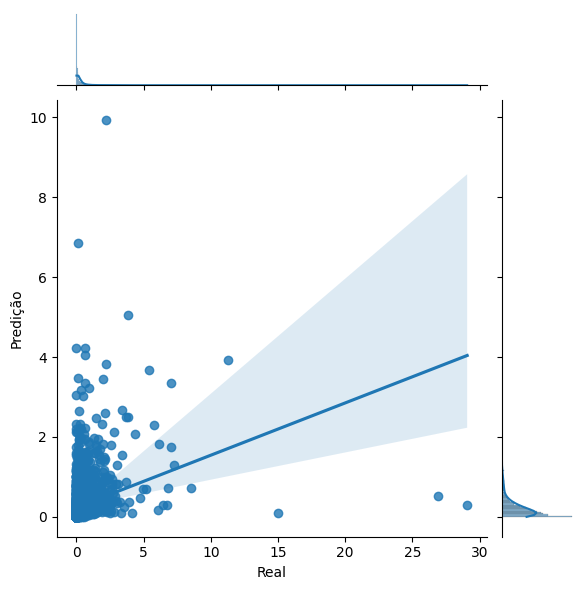

In [ ]:
test_DD_NA = pd.DataFrame({'Predição':yRandomPre_DD_NA,'Real':y_test_DD_NA})
fig= plt.figure(figsize=(16,8))
test_DD_NA = test_DD_NA.reset_index()
test_DD_NA = test_DD_NA.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_NA,kind='reg',);

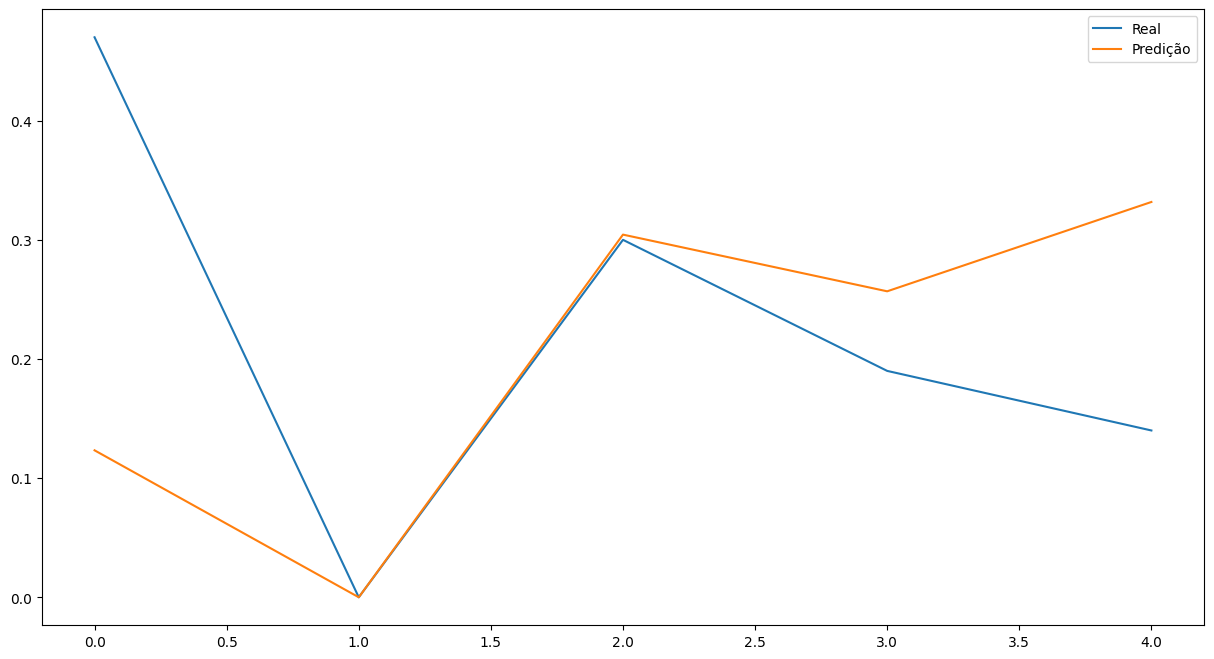

In [ ]:
dbRandom1_DD_NA = dbRandom_DD_NA.head()
dbRandom1_DD_NA.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_DD_NA.feature_importances_

array([0.10499317, 0.36937624, 0.28830221, 0.23732838])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_DD_NA = KNeighborsRegressor()
knn_DD_NA.fit(x_train_DD_NA, y_train_DD_NA)

KNeighborsRegressor()

In [ ]:
knn_DD_NA.score(x_train_DD_NA,y_train_DD_NA)

0.32031499475720593

In [ ]:
knn_DD_NA.score(x_test_DD_NA , y_test_DD_NA)

-0.047437160452656

In [ ]:
pred_DD_NA = knn_DD_NA.predict(x_test_DD_NA)

r2_knn_DD_NA = r2_score(y_test_DD_NA,pred_DD_NA)
print(r2_knn_DD_NA)

-0.047437160452656


In [ ]:
mae_DD_NA = mean_absolute_error(pred_DD_NA, y_test_DD_NA)
print('Erro Absoluto Médio '+str(mae_DD_NA))

Erro Absoluto Médio 0.3016297569359195


In [ ]:
dbKNN_DD_NA = pd.DataFrame({'Real': y_test_DD_NA, 'Predição': pred_DD_NA})
dbKNN_DD_NA

Real  Predição
0     0.47     0.050
1     0.00     0.000
2     0.30     0.356
3     0.19     0.196
4     0.14     0.278
...    ...       ...
4068  0.02     0.038
4069  0.13     0.220
4070  1.06     0.136
4071  0.00     0.332
4072  0.12     0.148

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

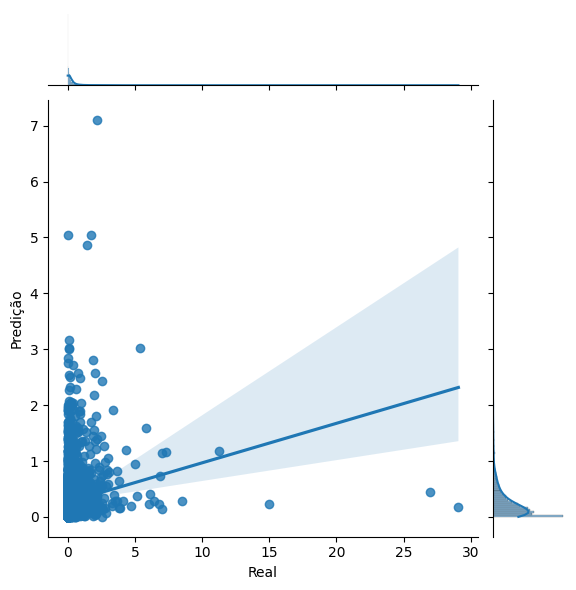

In [ ]:
test_DD_NA = pd.DataFrame({'Predição':pred_DD_NA,'Real':y_test_DD_NA})
fig= plt.figure(figsize=(16,8))
test_DD_NA = test_DD_NA.reset_index()
test_DD_NA = test_DD_NA.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_NA,kind='reg',);

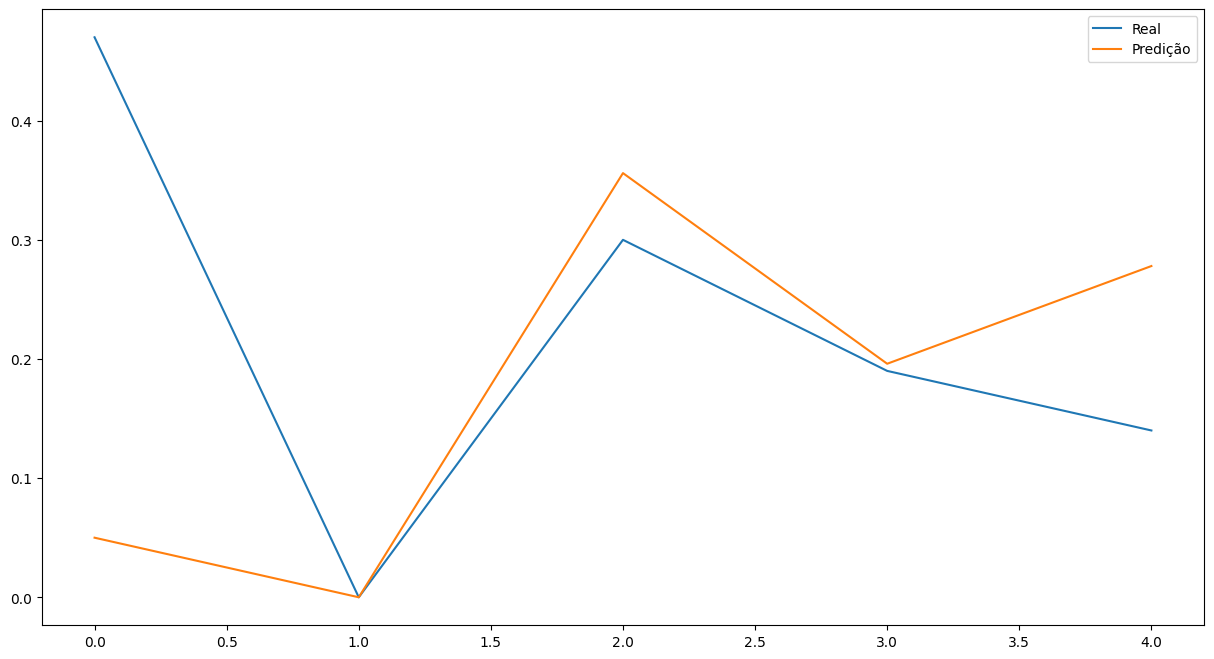

In [ ]:
dbKNN1_DD_NA = dbKNN_DD_NA.head()
dbKNN1_DD_NA.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_DD_NA = sm.add_constant(X_DD_NA)
est_DD_NA = sm.OLS(y_DD_NA, m_DD_NA)
est2_DD_NA = est_DD_NA.fit()
print(est2_DD_NA.params)

[ 2.86119277e+01  5.42713306e-03 -1.41776210e-02  5.64634200e-05
  3.81981851e-05]


--------------------------------------------------------------------------------------

In [ ]:
m_DD_NA = sm.add_constant(X_DD_NA)
est_DD_NA=sm.OLS(y_DD_NA,m_DD_NA)
est2_DD_NA = est_DD_NA.fit()
print(est2_DD_NA.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     55.16
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.81e-46
Time:                        04:26:26   Log-Likelihood:                -18456.
No. Observations:               16290   AIC:                         3.692e+04
Df Residuals:                   16285   BIC:                         3.696e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6119      2.072     13.809      0.0

--------------------------------------------------------------------------------------

# Teste DADOS - EU

In [ ]:
dff_DD_EU = df.copy()

le_DD_EU = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_DD_EU[col] = le_DD_EU.fit_transform(df[col])

In [ ]:
dff_DD_EU.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_DD_EU = dff_DD_EU[['Platform', 'Year', 'Genre', 'Publisher']].values

y_DD_EU = dff_DD_EU['EU_Sales'].values

In [ ]:
x_train_DD_EU, x_test_DD_EU, y_train_DD_EU, y_test_DD_EU = train_test_split(X_DD_EU, y_DD_EU, test_size=0.25, random_state=42)

In [ ]:
ro_DD_EU = RobustScaler()

In [ ]:
x_train_DD_EU = ro_DD_EU.fit_transform(x_train_DD_EU)
x_test_DD_EU = ro_DD_EU.fit_transform(x_test_DD_EU)


**Decision Tree**

In [ ]:
regressor_DD_EU = DecisionTreeRegressor()
regressor_DD_EU.fit(x_train_DD_EU, y_train_DD_EU)




DecisionTreeRegressor()

In [ ]:
regressor_DD_EU.score(x_train_DD_EU,y_train_DD_EU)

0.6775304282741259

In [ ]:
regressor_DD_EU.score(x_test_DD_EU,y_test_DD_EU)


-0.3551433106513131

In [ ]:
yTreePre_DD_EU = regressor_DD_EU.predict(x_test_DD_EU)

In [ ]:
r2Tree_DD_EU = r2_score(y_test_DD_EU ,yTreePre_DD_EU )
r2Tree_DD_EU

-0.3551433106513131

In [ ]:
mae_DD_EU = mean_absolute_error(yTreePre_DD_EU, y_test_DD_EU)
print('Erro Absoluto Médio '+str(mae_DD_EU))

Erro Absoluto Médio 0.1884738814258824


In [ ]:
db_DD_EU = pd.DataFrame({'Real': y_test_DD_EU, 'Predição': yTreePre_DD_EU})
db_DD_EU

Real  Predição
0     0.02  0.020000
1     0.00  0.000000
2     0.00  0.000000
3     0.13  0.117500
4     0.00  0.010000
...    ...       ...
4068  0.02  0.010000
4069  0.09  0.000000
4070  0.91  0.020000
4071  0.00  0.176000
4072  0.00  0.055714

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

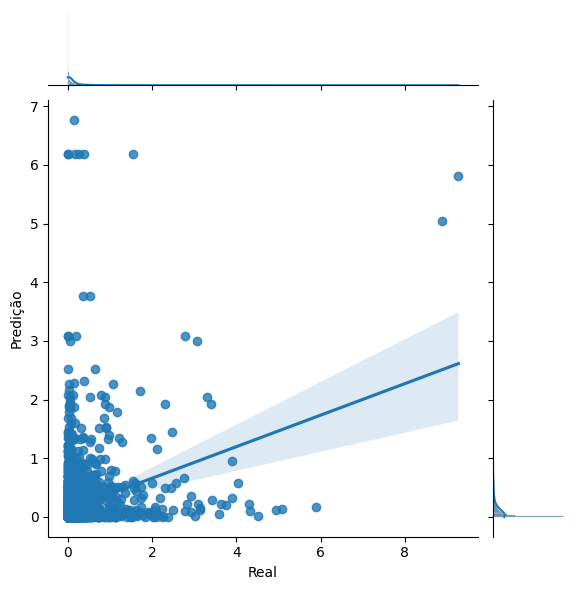

In [ ]:
test_DD_EU = pd.DataFrame({'Predição':yTreePre_DD_EU,'Real':y_test_DD_EU})
fig_DD_EU = plt.figure(figsize=(16,8))
test_DD_EU = test_DD_EU.reset_index()
test_DD_EU = test_DD_EU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_EU,kind='reg',);

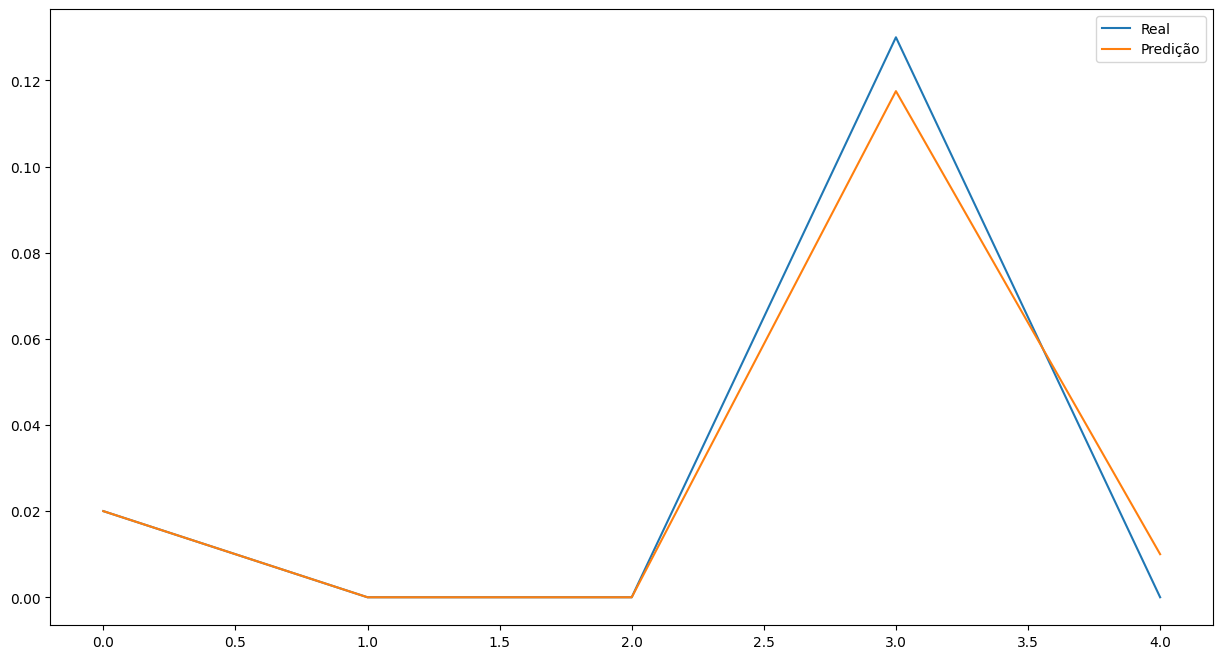

In [ ]:
db1_DD_EU = db_DD_EU.head()
db1_DD_EU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_DD_EU.feature_importances_

array([0.12202054, 0.38707671, 0.31445564, 0.17644711])

------------------------------------------

**Ridge**

In [ ]:
rid_DD_EU = Ridge()
rid_DD_EU.fit(x_train_DD_EU,y_train_DD_EU)

Ridge()

In [ ]:
rid_DD_EU.score(x_train_DD_EU,y_train_DD_EU)

0.002289153480881767

In [ ]:
rid_DD_EU.score(x_test_DD_EU,y_test_DD_EU)

0.003731036298573409

In [ ]:
yRidPre_DD_EU = rid_DD_EU.predict(x_test_DD_EU)

In [ ]:
r2Rid_DD_EU = r2_score(y_test_DD_EU ,yRidPre_DD_EU )
r2Rid_DD_EU

0.003731036298573409

In [ ]:
mae_DD_EU = mean_absolute_error(yRidPre_DD_EU, y_test_DD_EU)
print('Erro Absoluto Médio '+str(mae_DD_EU))

Erro Absoluto Médio 0.1872887133320558


In [ ]:
dbRidge_DD_EU = pd.DataFrame({'Real': y_test_DD_EU, 'Predição': yRidPre_DD_EU})
dbRidge_DD_EU

Real  Predição
0     0.02  0.144340
1     0.00  0.145231
2     0.00  0.168861
3     0.13  0.152761
4     0.00  0.174854
...    ...       ...
4068  0.02  0.186580
4069  0.09  0.124605
4070  0.91  0.108572
4071  0.00  0.107394
4072  0.00  0.123057

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

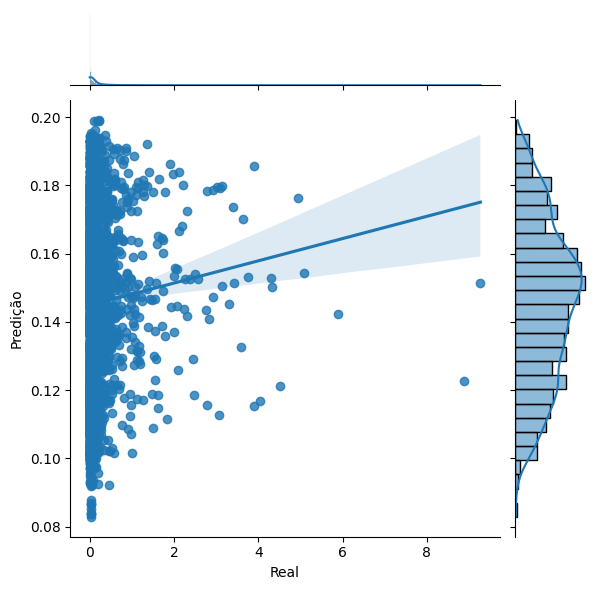

In [ ]:
test_DD_EU = pd.DataFrame({'Predição':yRidPre_DD_EU,'Real':y_test_DD_EU})
fig = plt.figure(figsize=(16,8))
test_DD_EU = test_DD_EU.reset_index()
test_DD_EU = test_DD_EU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_EU,kind='reg',);

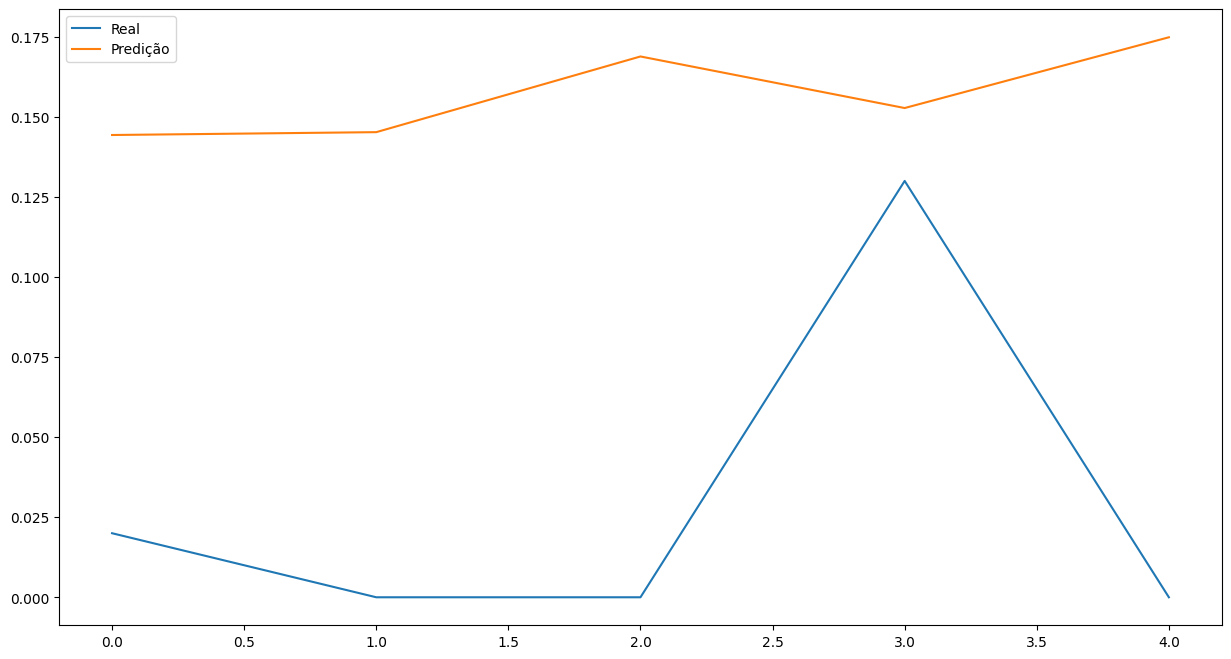

In [ ]:
dbridge1_DD_EU = dbRidge_DD_EU.head()
dbridge1_DD_EU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_DD_EU.coef_

array([0.0334352 , 0.00085263, 0.00977255, 0.01360985])

------------------------------------------

**LinearRegression**

In [ ]:
lr_DD_EU = LinearRegression()
lr_DD_EU.fit(x_train_DD_EU,y_train_DD_EU)

LinearRegression()

In [ ]:
lr_DD_EU.score(x_train_DD_EU,y_train_DD_EU)

0.002289153611510386

In [ ]:
lr_DD_EU.score(x_test_DD_EU,y_test_DD_EU)

0.0037312623240363108

In [ ]:
yLinearPre_DD_EU = lr_DD_EU.predict(x_test_DD_EU)

In [ ]:
r2Linear_DD_EU = r2_score(y_test_DD_EU , yLinearPre_DD_EU)
r2Linear_DD_EU

0.0037312623240363108

<Figure size 1600x800 with 0 Axes>

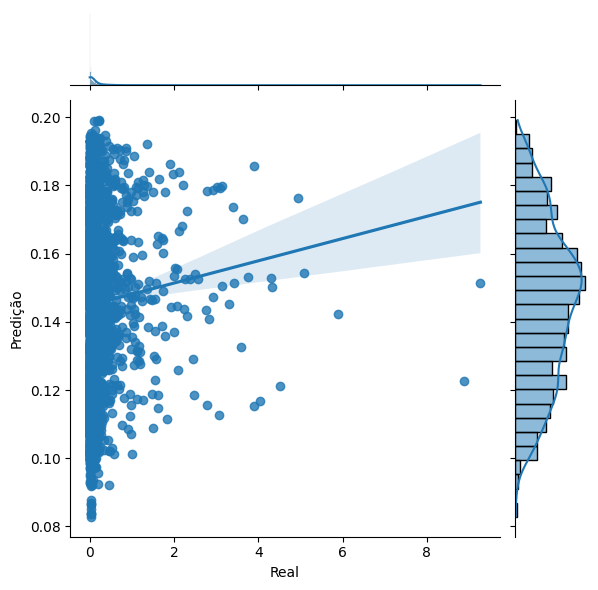

In [ ]:
test_DD_EU = pd.DataFrame({'Predição':yLinearPre_DD_EU,'Real':y_test_DD_EU})
fig= plt.figure(figsize=(16,8))
test_DD_EU = test_DD_EU.reset_index()
test_DD_EU = test_DD_EU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_EU,kind='reg',);

In [ ]:
mae_DD_EU = mean_absolute_error(yLinearPre_DD_EU, y_test_DD_EU)
print('Erro Absoluto Médio '+str(mae_DD_EU))

Erro Absoluto Médio 0.18728844167241995


In [ ]:
dbLinear_DD_EU = pd.DataFrame({'Real': y_test_DD_EU, 'Predição': yLinearPre_DD_EU})
dbLinear_DD_EU

Real  Predição
0     0.02  0.144340
1     0.00  0.145229
2     0.00  0.168866
3     0.13  0.152764
4     0.00  0.174861
...    ...       ...
4068  0.02  0.186588
4069  0.09  0.124601
4070  0.91  0.108563
4071  0.00  0.107384
4072  0.00  0.123052

[4073 rows x 2 columns]

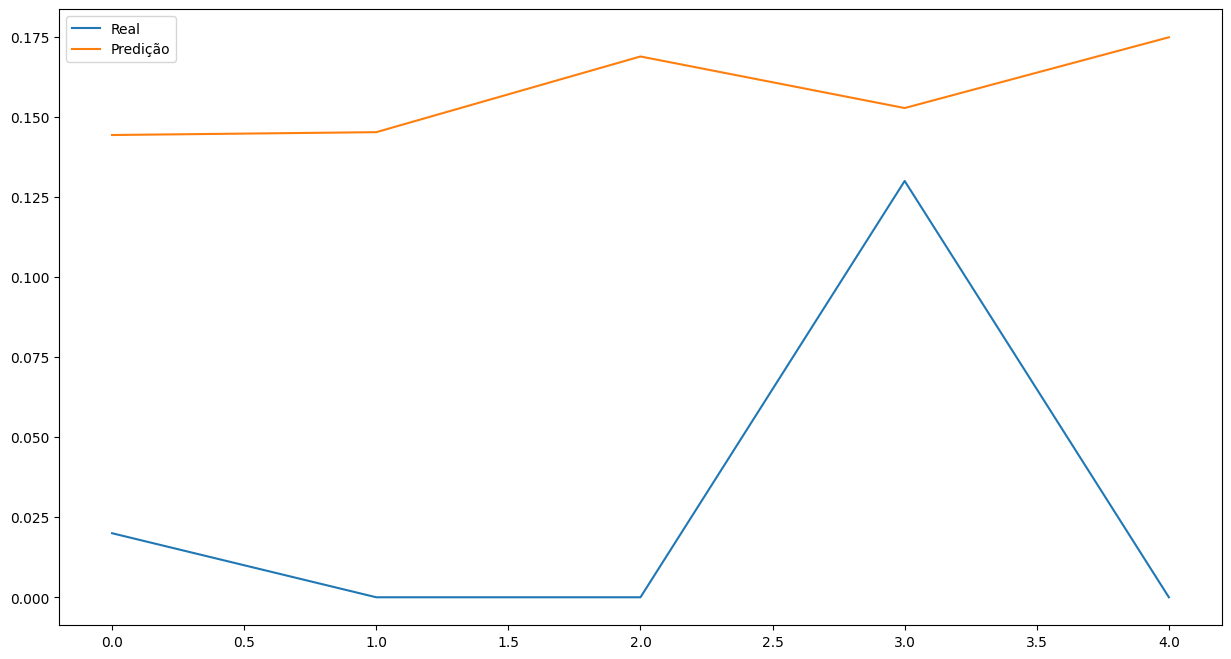

In [ ]:
dbLinear1_DD_EU = dbLinear_DD_EU.head()
dbLinear1_DD_EU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_DD_EU.coef_

array([0.03344302, 0.0008519 , 0.00977514, 0.01361375])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_DD_EU = RandomForestRegressor()
rf_DD_EU.fit(x_train_DD_EU , y_train_DD_EU)

RandomForestRegressor()

In [ ]:
rf_DD_EU.score(x_train_DD_EU,y_train_DD_EU)

0.6253851232398284

In [ ]:
rf_DD_EU.score(x_test_DD_EU,y_test_DD_EU)

-0.03150984702923498

In [ ]:
yRandomPre_DD_EU = rf_DD_EU.predict(x_test_DD_EU)

In [ ]:
r2Random_DD_EU = r2_score(y_test_DD_EU , yRandomPre_DD_EU)
r2Random_DD_EU

-0.03150984702923498

In [ ]:
mae_DD_EU = mean_absolute_error(yRandomPre_DD_EU, y_test_DD_EU)
print('Erro Absoluto Médio '+str(mae_DD_EU))

Erro Absoluto Médio 0.17077723744251078


In [ ]:
dbRandom_DD_EU = pd.DataFrame({'Real': y_test_DD_EU, 'Predição': yRandomPre_DD_EU})
dbRandom_DD_EU

Real  Predição
0     0.02  0.081785
1     0.00  0.000000
2     0.00  0.003071
3     0.13  0.122970
4     0.00  0.072094
...    ...       ...
4068  0.02  0.022044
4069  0.09  0.104240
4070  0.91  0.020676
4071  0.00  0.194310
4072  0.00  0.055640

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

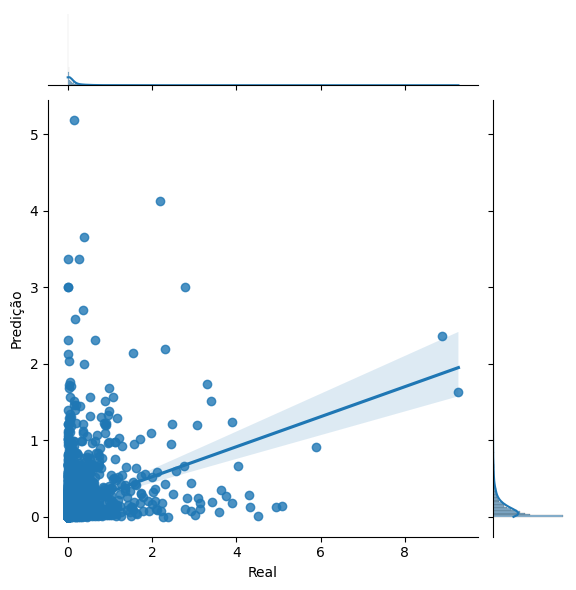

In [ ]:
test_DD_EU = pd.DataFrame({'Predição':yRandomPre_DD_EU,'Real':y_test_DD_EU})
fig= plt.figure(figsize=(16,8))
test_DD_EU = test_DD_EU.reset_index()
test_DD_EU = test_DD_EU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_EU,kind='reg',);

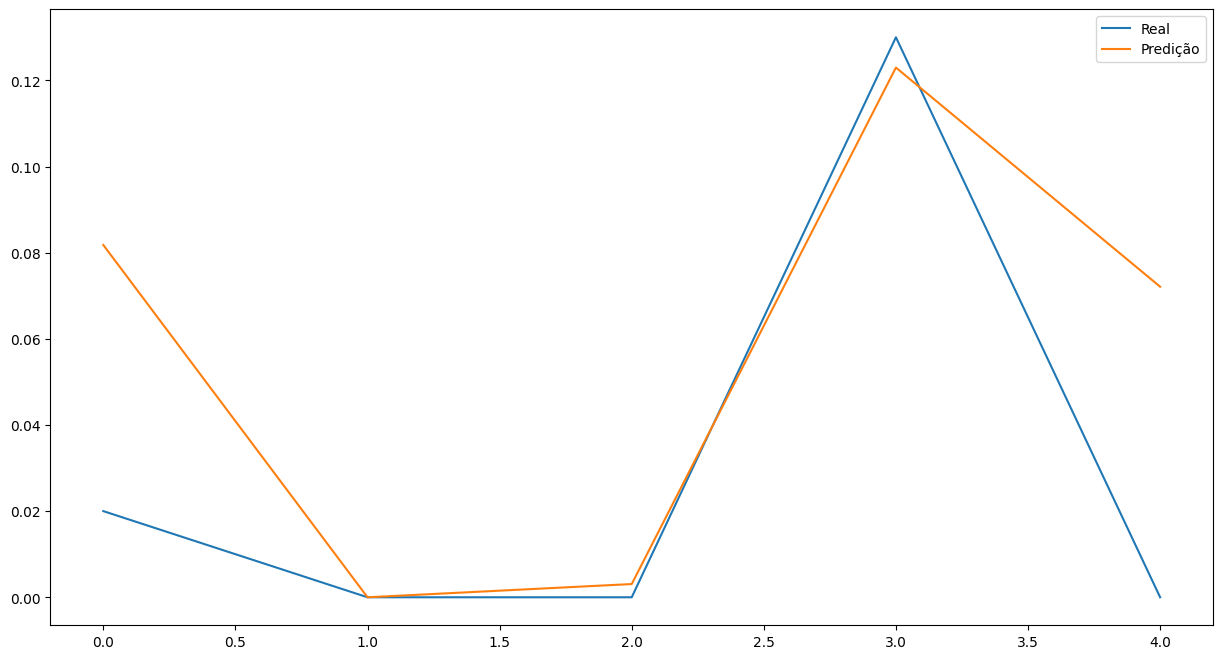

In [ ]:
dbRandom1_DD_EU = dbRandom_DD_EU.head()
dbRandom1_DD_EU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_DD_EU.feature_importances_

array([0.12964   , 0.37433817, 0.30163109, 0.19439074])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_DD_EU = KNeighborsRegressor()
knn_DD_EU.fit(x_train_DD_EU, y_train_DD_EU)

KNeighborsRegressor()

In [ ]:
knn_DD_EU.score(x_train_DD_EU,y_train_DD_EU)

0.2872983830898136

In [ ]:
knn_DD_EU.score(x_test_DD_EU , y_test_DD_EU)

-0.11183233563113437

In [ ]:
pred_DD_EU = knn_DD_EU.predict(x_test_DD_EU)

r2_knn_DD_EU = r2_score(y_test_DD_EU,pred_DD_EU)
print(r2_knn_DD_EU)

-0.11183233563113437


In [ ]:
mae_DD_EU = mean_absolute_error(pred_DD_EU, y_test_DD_EU)
print('Erro Absoluto Médio '+str(mae_DD_EU))

Erro Absoluto Médio 0.18761404370243065


In [ ]:
dbKNN_DD_EU = pd.DataFrame({'Real': y_test_DD_EU, 'Predição': pred_DD_EU})
dbKNN_DD_EU

Real  Predição
0     0.02     0.038
1     0.00     0.000
2     0.00     0.016
3     0.13     0.094
4     0.00     0.046
...    ...       ...
4068  0.02     0.062
4069  0.09     0.150
4070  0.91     0.014
4071  0.00     0.176
4072  0.00     0.074

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

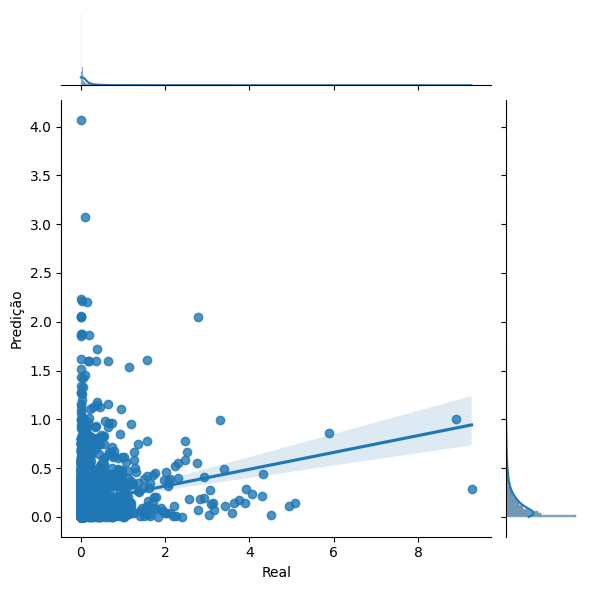

In [ ]:
test_DD_EU = pd.DataFrame({'Predição':pred_DD_EU,'Real':y_test_DD_EU})
fig= plt.figure(figsize=(16,8))
test_DD_EU = test_DD_EU.reset_index()
test_DD_EU = test_DD_EU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_EU,kind='reg',);

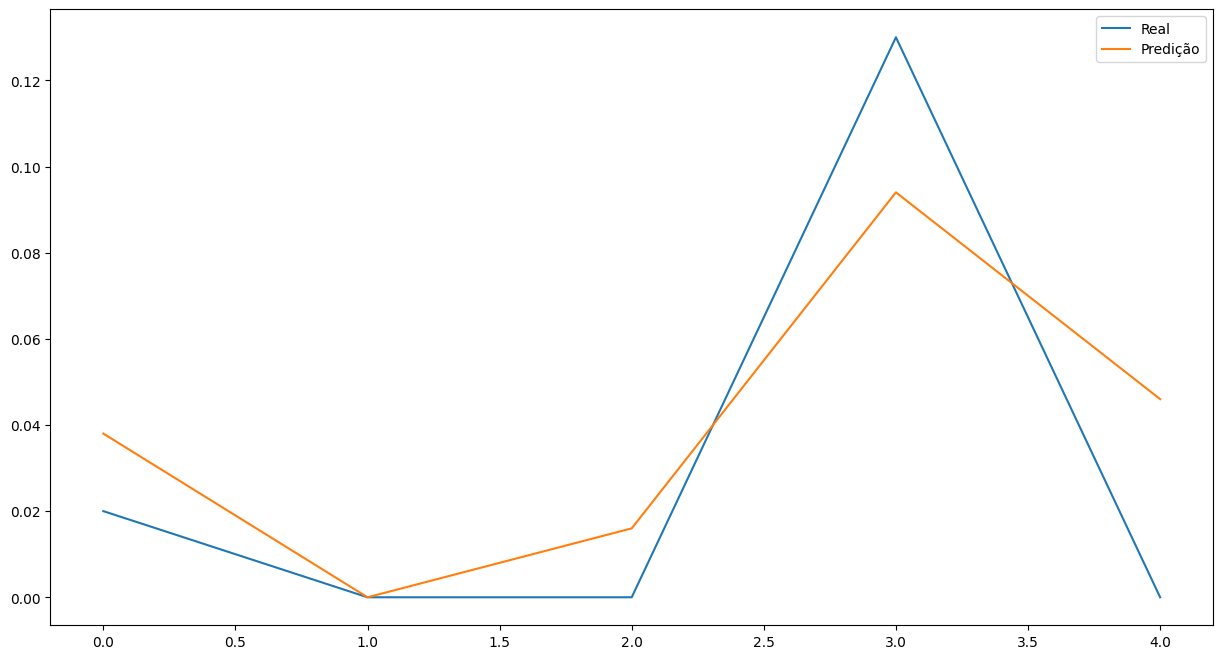

In [ ]:
dbKNN1_DD_EU = dbKNN_DD_EU.head()
dbKNN1_DD_EU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_DD_EU = sm.add_constant(X_DD_EU)
est_DD_EU = sm.OLS(y_DD_EU, m_DD_EU)
est2_DD_EU = est_DD_EU.fit()
print(est2_DD_EU.params)

[2.60241413e-02 2.57881090e-03 2.99208061e-05 1.61245783e-03
 3.82837691e-05]


--------------------------------------------------------------------------------------

In [ ]:
m_DD_EU = sm.add_constant(X_DD_EU)
est_DD_EU=sm.OLS(y_DD_EU,m_DD_EU)
est2_DD_EU = est_DD_EU.fit()
print(est2_DD_EU.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.72
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.12e-08
Time:                        04:26:47   Log-Likelihood:                -10312.
No. Observations:               16290   AIC:                         2.063e+04
Df Residuals:                   16285   BIC:                         2.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0260      1.257      0.021      0.9

--------------------------------------------------------------------------------------

# Teste DADOS - JP

In [ ]:
dff_DD_JP = df.copy()

le_DD_JP = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_DD_JP[col] = le_DD_JP.fit_transform(df[col])

In [ ]:
dff_DD_JP.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_DD_JP = dff_DD_JP[['Platform', 'Year', 'Genre', 'Publisher']].values

y_DD_JP = dff_DD_JP['JP_Sales'].values

In [ ]:
x_train_DD_JP, x_test_DD_JP, y_train_DD_JP, y_test_DD_JP = train_test_split(X_DD_JP, y_DD_JP, test_size=0.25, random_state=42)

In [ ]:
ro_DD_JP = RobustScaler()

In [ ]:
x_train_DD_JP = ro_DD_JP.fit_transform(x_train_DD_JP)
x_test_DD_JP = ro_DD_JP.fit_transform(x_test_DD_JP)


**Decision Tree**

In [ ]:
regressor_DD_JP = DecisionTreeRegressor()
regressor_DD_JP.fit(x_train_DD_JP, y_train_DD_JP)




DecisionTreeRegressor()

In [ ]:
regressor_DD_JP.score(x_train_DD_JP,y_train_DD_JP)

0.7526396461773772

In [ ]:
regressor_DD_JP.score(x_test_DD_JP,y_test_DD_JP)


-0.06366943177130491

In [ ]:
yTreePre_DD_JP = regressor_DD_JP.predict(x_test_DD_JP)

In [ ]:
r2Tree_DD_JP = r2_score(y_test_DD_JP ,yTreePre_DD_JP )
r2Tree_DD_JP

-0.06366943177130491

In [ ]:
mae_DD_JP = mean_absolute_error(yTreePre_DD_JP, y_test_DD_JP)
print('Erro Absoluto Médio '+str(mae_DD_JP))

Erro Absoluto Médio 0.0978173765291369


In [ ]:
 db_DD_JP = pd.DataFrame({'Real': y_test_DD_JP, 'Predição': yTreePre_DD_JP})
db_DD_JP

Real  Predição
0     0.00     0.170
1     0.02     0.030
2     0.00     0.000
3     0.31     0.215
4     0.00     0.000
...    ...       ...
4068  0.00     0.000
4069  0.00     0.000
4070  0.00     0.000
4071  0.19     0.198
4072  0.00     0.120

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

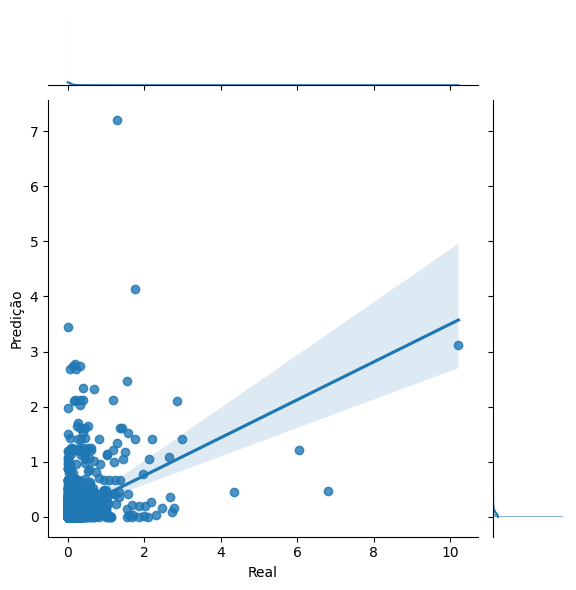

In [ ]:
test_DD_JP = pd.DataFrame({'Predição':yTreePre_DD_JP,'Real':y_test_DD_JP})
fig_DD_JP = plt.figure(figsize=(16,8))
test_DD_JP = test_DD_JP.reset_index()
test_DD_JP = test_DD_JP.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_JP,kind='reg',);

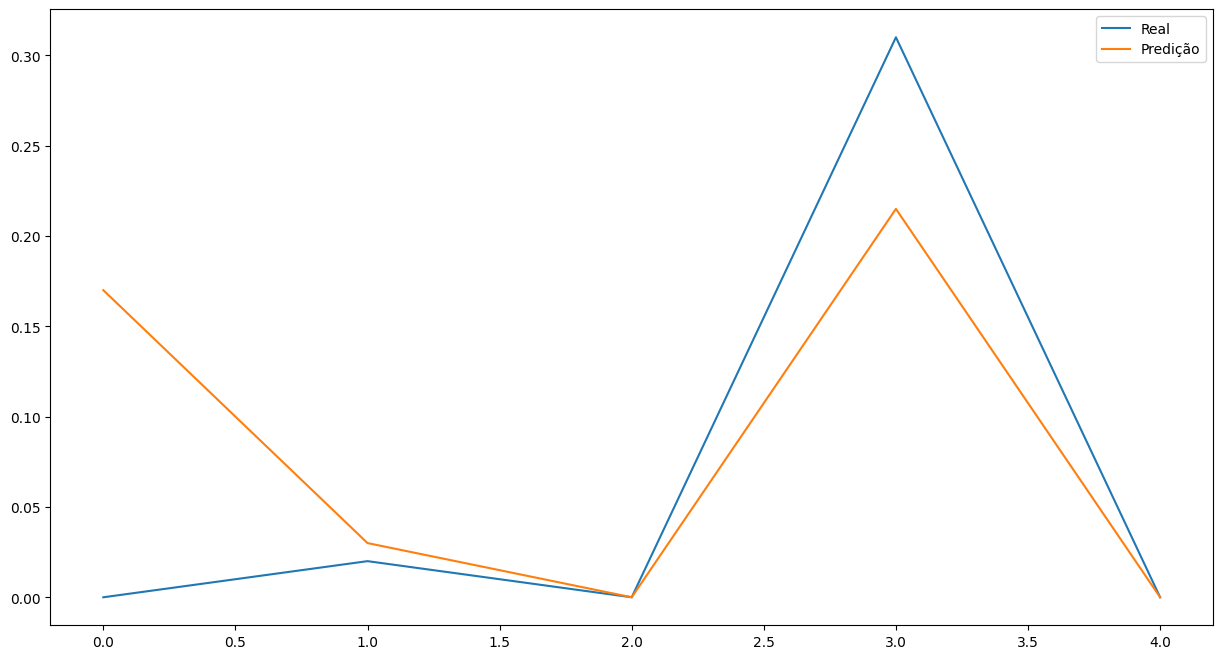

In [ ]:
db1_DD_JP = db_DD_JP.head()
db1_DD_JP.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_DD_JP.feature_importances_

array([0.134324  , 0.31825352, 0.22406003, 0.32336244])

------------------------------------------

**Ridge**

In [ ]:
rid_DD_JP = Ridge()
rid_DD_JP.fit(x_train_DD_JP,y_train_DD_JP)

Ridge()

In [ ]:
rid_DD_JP.score(x_train_DD_JP,y_train_DD_JP)

0.034294156863166614

In [ ]:
rid_DD_JP.score(x_test_DD_JP,y_test_DD_JP)

0.037123775439604545

In [ ]:
yRidPre_DD_JP = rid_DD_JP.predict(x_test_DD_JP)

In [ ]:
r2Rid_DD_JP = r2_score(y_test_DD_JP ,yRidPre_DD_JP )
r2Rid_DD_JP

0.037123775439604545

In [ ]:
mae_DD_JP = mean_absolute_error(yRidPre_DD_JP, y_test_DD_JP)
print('Erro Absoluto Médio '+str(mae_DD_JP))

Erro Absoluto Médio 0.11558380901950734


In [ ]:
dbRidge_DD_JP = pd.DataFrame({'Real': y_test_DD_JP, 'Predição': yRidPre_DD_JP})
dbRidge_DD_JP

Real  Predição
0     0.00  0.098319
1     0.02  0.011612
2     0.00  0.038344
3     0.31  0.160205
4     0.00  0.027589
...    ...       ...
4068  0.00 -0.025200
4069  0.00  0.130552
4070  0.00  0.082405
4071  0.19  0.037268
4072  0.00  0.103325

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

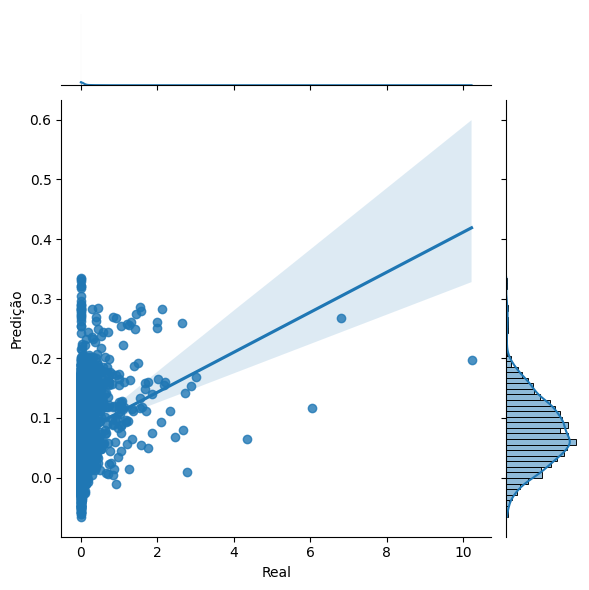

In [ ]:
test_DD_JP = pd.DataFrame({'Predição':yRidPre_DD_JP,'Real':y_test_DD_JP})
fig = plt.figure(figsize=(16,8))
test_DD_JP = test_DD_JP.reset_index()
test_DD_JP = test_DD_JP.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_JP,kind='reg',);

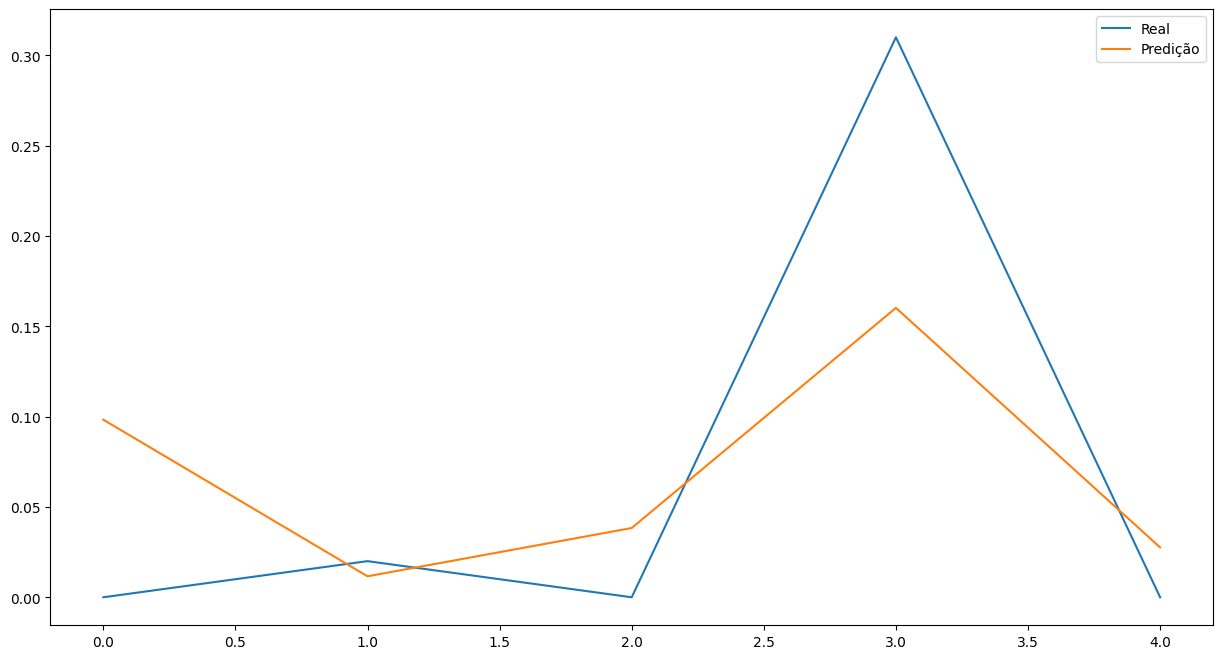

In [ ]:
dbridge1_DD_JP = dbRidge_DD_JP.head()
dbridge1_DD_JP.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_DD_JP.coef_

array([-0.02826223, -0.05693993,  0.01130168,  0.03229347])

------------------------------------------

**LinearRegression**

In [ ]:
lr_DD_JP = LinearRegression()
lr_DD_JP.fit(x_train_DD_JP,y_train_DD_JP)

LinearRegression()

In [ ]:
lr_DD_JP.score(x_train_DD_JP,y_train_DD_JP)

0.03429415755723364

In [ ]:
lr_DD_JP.score(x_test_DD_JP,y_test_DD_JP)

0.037124386911438934

In [ ]:
yLinearPre_DD_JP = lr_DD_JP.predict(x_test_DD_JP)

In [ ]:
r2Linear_DD_JP = r2_score(y_test_DD_JP , yLinearPre_DD_JP)
r2Linear_DD_JP

0.037124386911438934

<Figure size 1600x800 with 0 Axes>

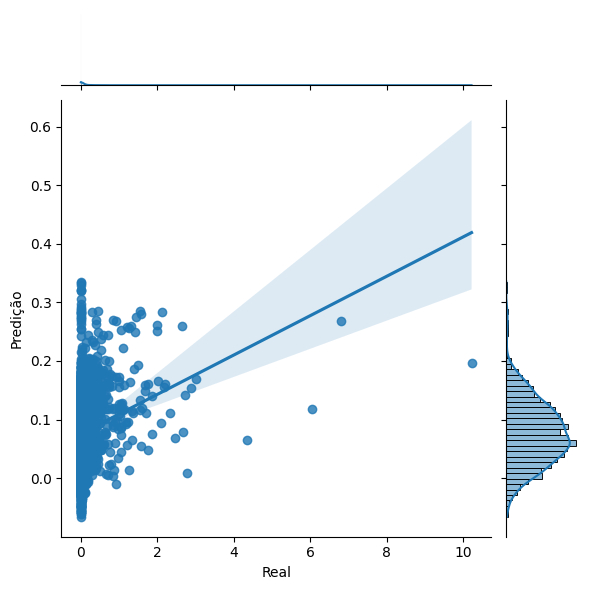

In [ ]:
test_DD_JP = pd.DataFrame({'Predição':yLinearPre_DD_JP,'Real':y_test_DD_JP})
fig= plt.figure(figsize=(16,8))
test_DD_JP = test_DD_JP.reset_index()
test_DD_JP = test_DD_JP.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_JP,kind='reg',);

In [ ]:
mae_DD_JP = mean_absolute_error(yLinearPre_DD_JP, y_test_DD_JP)
print('Erro Absoluto Médio '+str(mae_DD_JP))

Erro Absoluto Médio 0.11558546070597894


In [ ]:
dbLinear_DD_JP = pd.DataFrame({'Real': y_test_DD_JP, 'Predição': yLinearPre_DD_JP})
dbLinear_DD_JP

Real  Predição
0     0.00  0.098321
1     0.02  0.011603
2     0.00  0.038338
3     0.31  0.160217
4     0.00  0.027581
...    ...       ...
4068  0.00 -0.025212
4069  0.00  0.130553
4070  0.00  0.082404
4071  0.19  0.037266
4072  0.00  0.103333

[4073 rows x 2 columns]

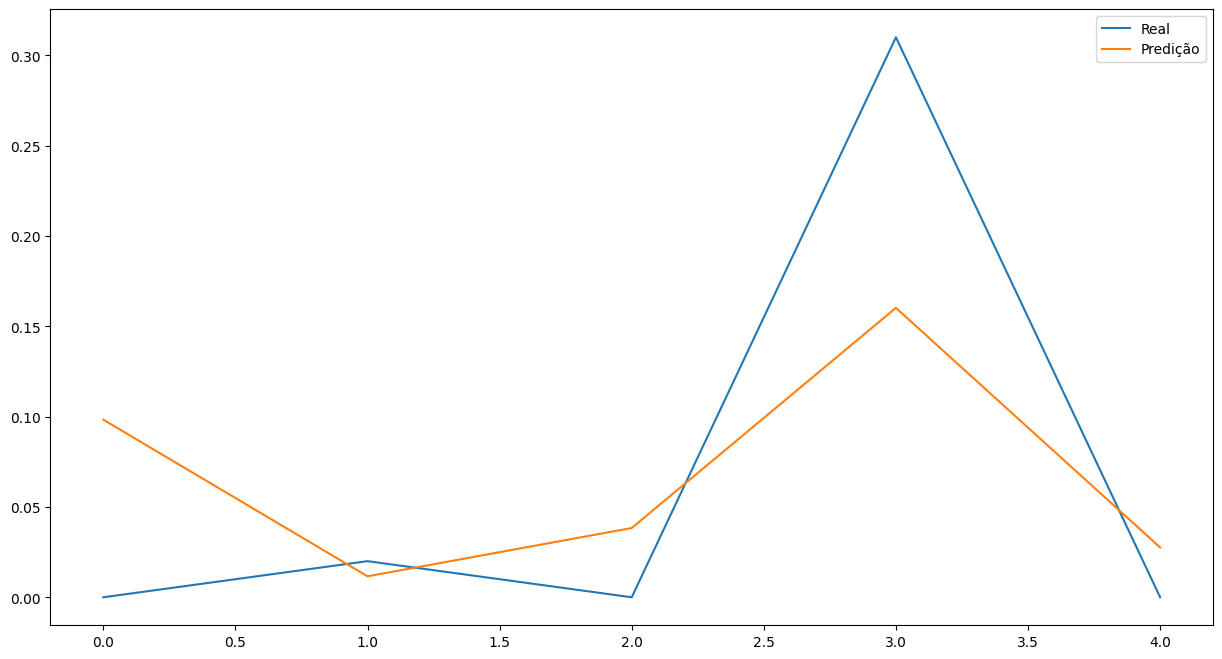

In [ ]:
dbLinear1_DD_JP = dbLinear_DD_JP.head()
dbLinear1_DD_JP.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_DD_JP.coef_

array([-0.02826718, -0.0569459 ,  0.01130435,  0.03230234])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_DD_JP = RandomForestRegressor()
rf_DD_JP.fit(x_train_DD_JP , y_train_DD_JP)

RandomForestRegressor()

In [ ]:
rf_DD_JP.score(x_train_DD_JP,y_train_DD_JP)

0.7005488005088929

In [ ]:
rf_DD_JP.score(x_test_DD_JP,y_test_DD_JP)

0.21302576872646417

In [ ]:
yRandomPre_DD_JP = rf_DD_JP.predict(x_test_DD_JP)

In [ ]:
r2Random_DD_JP = r2_score(y_test_DD_JP , yRandomPre_DD_JP)
r2Random_DD_JP

0.21302576872646417

In [ ]:
mae_DD_JP = mean_absolute_error(yRandomPre_DD_JP, y_test_DD_JP)
print('Erro Absoluto Médio '+str(mae_DD_JP))

Erro Absoluto Médio 0.08388433793880226


In [ ]:
dbRandom_DD_JP = pd.DataFrame({'Real': y_test_DD_JP, 'Predição': yRandomPre_DD_JP})
dbRandom_DD_JP

Real  Predição
0     0.00  0.125548
1     0.02  0.030860
2     0.00  0.004900
3     0.31  0.240044
4     0.00  0.000000
...    ...       ...
4068  0.00  0.000000
4069  0.00  0.071310
4070  0.00  0.015700
4071  0.19  0.226856
4072  0.00  0.032767

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

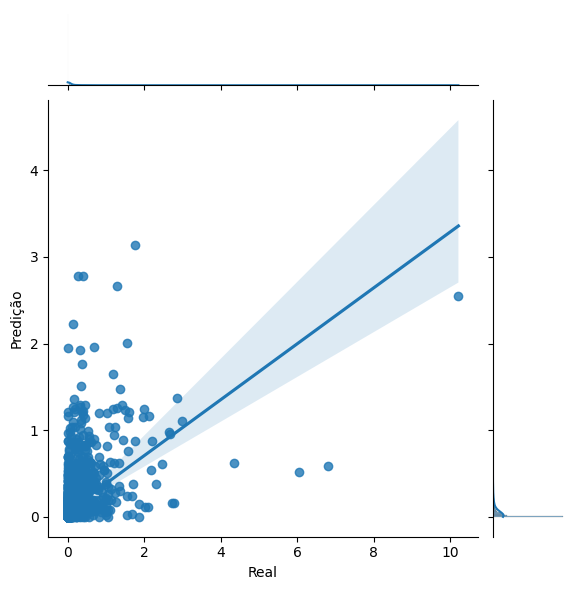

In [ ]:
test_DD_JP = pd.DataFrame({'Predição':yRandomPre_DD_JP,'Real':y_test_DD_JP})
fig= plt.figure(figsize=(16,8))
test_DD_JP = test_DD_JP.reset_index()
test_DD_JP = test_DD_JP.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_JP,kind='reg',);

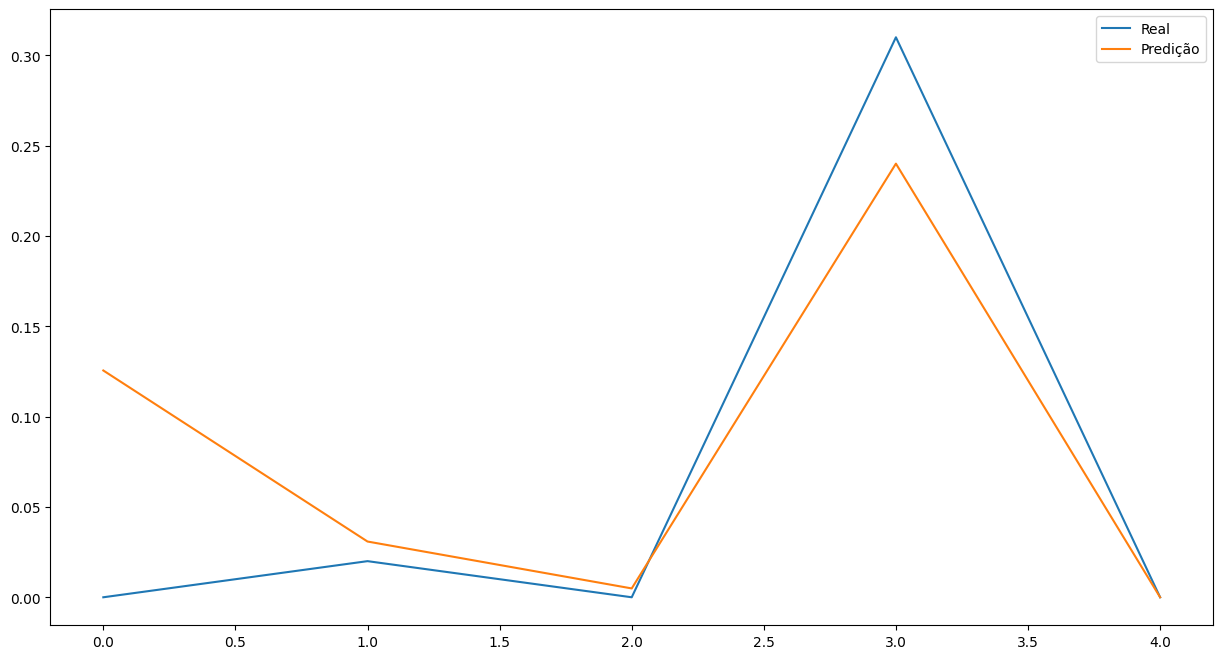

In [ ]:
dbRandom1_DD_JP = dbRandom_DD_JP.head()
dbRandom1_DD_JP.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_DD_JP.feature_importances_

array([0.13106325, 0.34269413, 0.23869974, 0.28754287])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_DD_JP = KNeighborsRegressor()
knn_DD_JP.fit(x_train_DD_JP, y_train_DD_JP)

KNeighborsRegressor()

In [ ]:
knn_DD_JP.score(x_train_DD_JP,y_train_DD_JP)

0.41900504321964593

In [ ]:
knn_DD_JP.score(x_test_DD_JP , y_test_DD_JP)

0.07665996287966692

In [ ]:
pred_DD_JP = knn_DD_JP.predict(x_test_DD_JP)

r2_knn_DD_JP = r2_score(y_test_DD_JP,pred_DD_JP)
print(r2_knn_DD_JP)

0.07665996287966692


In [ ]:
mae_DD_JP = mean_absolute_error(pred_DD_JP, y_test_DD_JP)
print('Erro Absoluto Médio '+str(mae_DD_JP))

Erro Absoluto Médio 0.09148882887306654


In [ ]:
dbKNN_DD_JP = pd.DataFrame({'Real': y_test_DD_JP, 'Predição': pred_DD_JP})
dbKNN_DD_JP

Real  Predição
0     0.00     0.074
1     0.02     0.028
2     0.00     0.000
3     0.31     0.256
4     0.00     0.000
...    ...       ...
4068  0.00     0.000
4069  0.00     0.074
4070  0.00     0.006
4071  0.19     0.198
4072  0.00     0.000

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

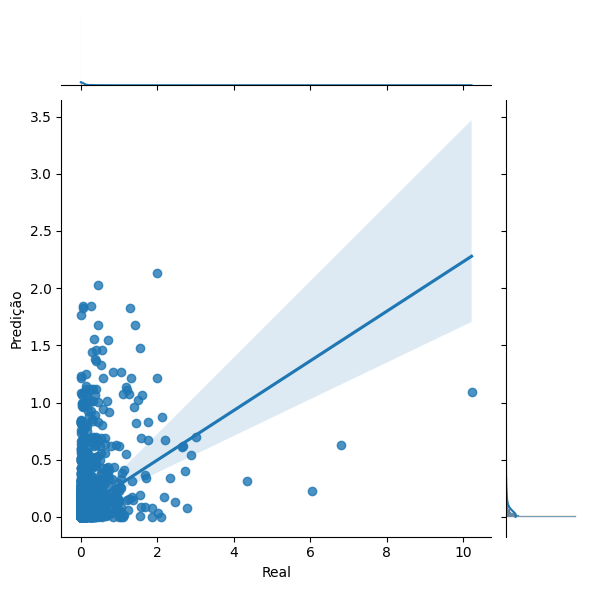

In [ ]:
test_DD_JP = pd.DataFrame({'Predição':pred_DD_JP,'Real':y_test_DD_JP})
fig= plt.figure(figsize=(16,8))
test_DD_JP = test_DD_JP.reset_index()
test_DD_JP = test_DD_JP.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_JP,kind='reg',);

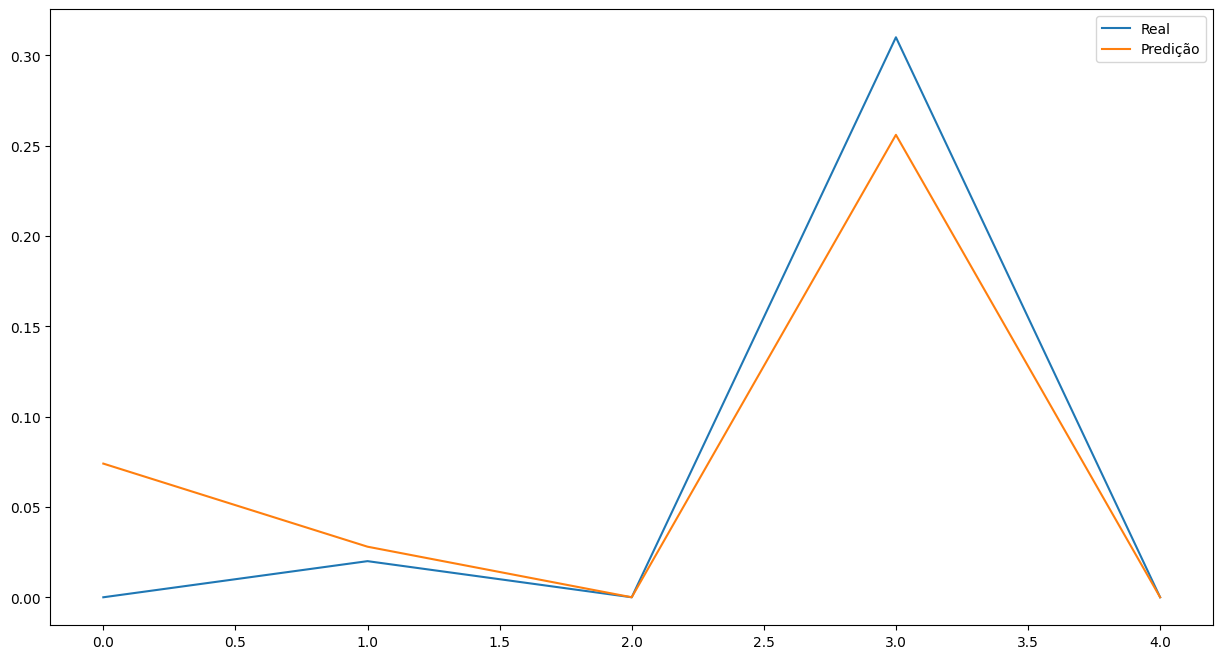

In [ ]:
dbKNN1_DD_JP = dbKNN_DD_JP.head()
dbKNN1_DD_JP.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_DD_JP = sm.add_constant(X_DD_JP)
est_DD_JP = sm.OLS(y_DD_JP, m_DD_JP)
est2_DD_JP = est_DD_JP.fit()
print(est2_DD_JP.params)

[ 1.72914322e+01 -1.97253179e-03 -8.58086392e-03  1.12294541e-03
  1.01115112e-04]


--------------------------------------------------------------------------------------

In [ ]:
m_DD_JP = sm.add_constant(X_DD_JP)
est_DD_JP=sm.OLS(y_DD_JP,m_DD_JP)
est2_DD_JP = est_DD_JP.fit()
print(est2_DD_JP.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     148.3
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          8.00e-125
Time:                        04:27:22   Log-Likelihood:                -3772.6
No. Observations:               16290   AIC:                             7555.
Df Residuals:                   16285   BIC:                             7594.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2914      0.841     20.554      0.0

--------------------------------------------------------------------------------------

# Teste DADOS - OU

In [ ]:
dff_DD_OU = df.copy()

le_DD_OU = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_DD_OU[col] = le_DD_OU.fit_transform(df[col])

In [ ]:
dff_DD_OU.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_DD_OU = dff_DD_OU[['Platform', 'Year', 'Genre', 'Publisher']].values

y_DD_OU = dff_DD_OU['Other_Sales'].values

In [ ]:
x_train_DD_OU, x_test_DD_OU, y_train_DD_OU, y_test_DD_OU = train_test_split(X_DD_OU, y_DD_OU, test_size=0.25, random_state=42)

In [ ]:
ro_DD_OU = RobustScaler()

In [ ]:
x_train_DD_OU = ro_DD_OU.fit_transform(x_train_DD_OU)
x_test_DD_OU = ro_DD_OU.fit_transform(x_test_DD_OU)


**Decision Tree**

In [ ]:
regressor_DD_OU = DecisionTreeRegressor()
regressor_DD_OU.fit(x_train_DD_OU, y_train_DD_OU)




DecisionTreeRegressor()

In [ ]:
regressor_DD_OU.score(x_train_DD_OU,y_train_DD_OU)

0.7677437834260464

In [ ]:
regressor_DD_OU.score(x_test_DD_OU,y_test_DD_OU)


-0.05700661277043628

In [ ]:
yTreePre_DD_OU = regressor_DD_OU.predict(x_test_DD_OU)

In [ ]:
r2Tree_DD_OU = r2_score(y_test_DD_OU ,yTreePre_DD_OU )
r2Tree_DD_OU

-0.05700661277043628

In [ ]:
mae_DD_OU = mean_absolute_error(yTreePre_DD_OU, y_test_DD_OU)
print('Erro Absoluto Médio '+str(mae_DD_OU))

Erro Absoluto Médio 0.05946393399818394


In [ ]:
db_DD_OU = pd.DataFrame({'Real': y_test_DD_OU, 'Predição': yTreePre_DD_OU})
db_DD_OU

Real  Predição
0     0.08  0.010000
1     0.00  0.000000
2     0.02  0.030000
3     0.04  0.035000
4     0.01  0.046667
...    ...       ...
4068  0.00  0.000000
4069  0.02  0.010000
4070  0.23  0.000000
4071  0.00  0.050000
4072  0.01  0.021429

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

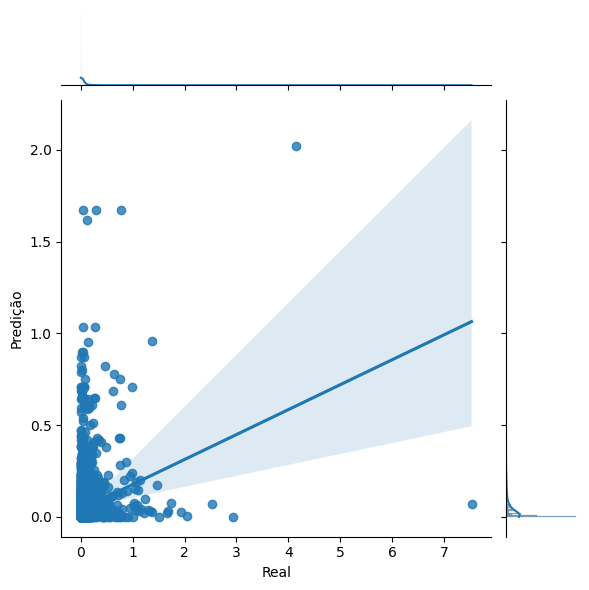

In [ ]:
test_DD_OU = pd.DataFrame({'Predição':yTreePre_DD_OU,'Real':y_test_DD_OU})
fig_DD_OU = plt.figure(figsize=(16,8))
test_DD_OU = test_DD_OU.reset_index()
test_DD_OU = test_DD_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_OU,kind='reg',);

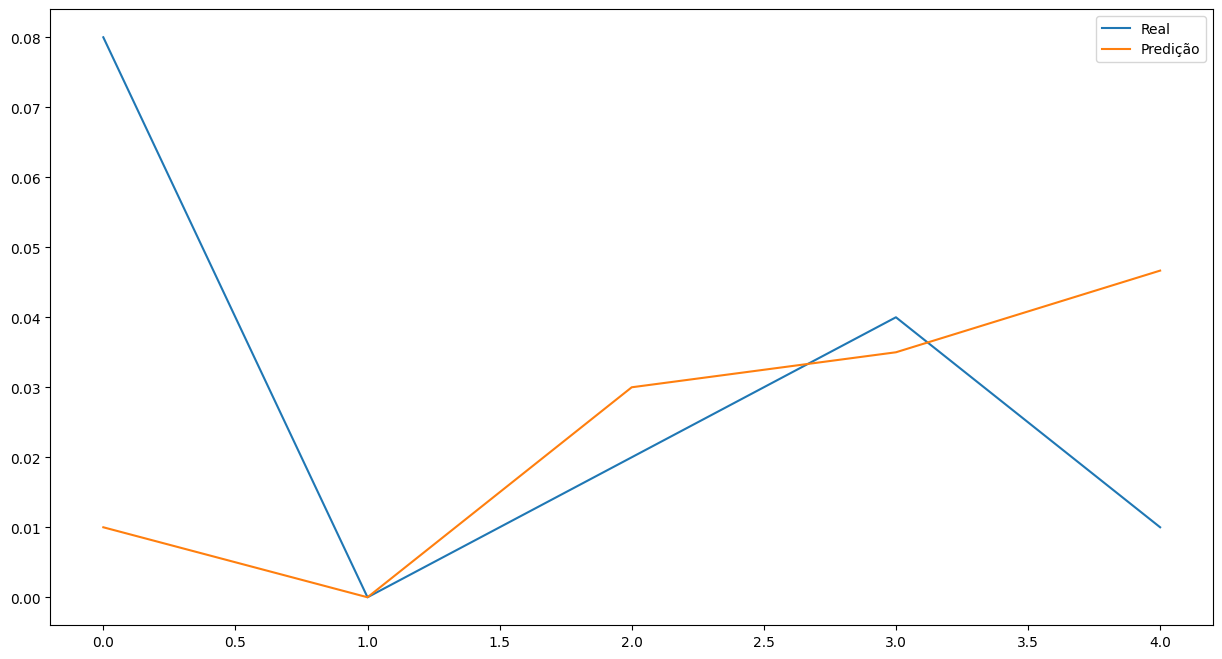

In [ ]:
db1_DD_OU = db_DD_OU.head()
db1_DD_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_DD_OU.feature_importances_

array([0.06999506, 0.58983426, 0.17514995, 0.16502074])

------------------------------------------

**Ridge**

In [ ]:
rid_DD_OU = Ridge()
rid_DD_OU.fit(x_train_DD_OU,y_train_DD_OU)

Ridge()

In [ ]:
rid_DD_OU.score(x_train_DD_OU,y_train_DD_OU)

0.0051439558961232645

In [ ]:
rid_DD_OU.score(x_test_DD_OU,y_test_DD_OU)

0.00277080846515132

In [ ]:
yRidPre_DD_OU = rid_DD_OU.predict(x_test_DD_OU)

In [ ]:
r2Rid_DD_OU = r2_score(y_test_DD_OU ,yRidPre_DD_OU )
r2Rid_DD_OU

0.00277080846515132

In [ ]:
mae_DD_OU = mean_absolute_error(yRidPre_DD_OU, y_test_DD_OU)
print('Erro Absoluto Médio '+str(mae_DD_OU))

Erro Absoluto Médio 0.06285562004126284


In [ ]:
dbRidge_DD_OU = pd.DataFrame({'Real': y_test_DD_OU, 'Predição': yRidPre_DD_OU})
dbRidge_DD_OU

Real  Predição
0     0.08  0.043955
1     0.00  0.054046
2     0.02  0.058650
3     0.04  0.040595
4     0.01  0.062288
...    ...       ...
4068  0.00  0.074591
4069  0.02  0.027188
4070  0.23  0.032050
4071  0.00  0.041596
4072  0.01  0.040471

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

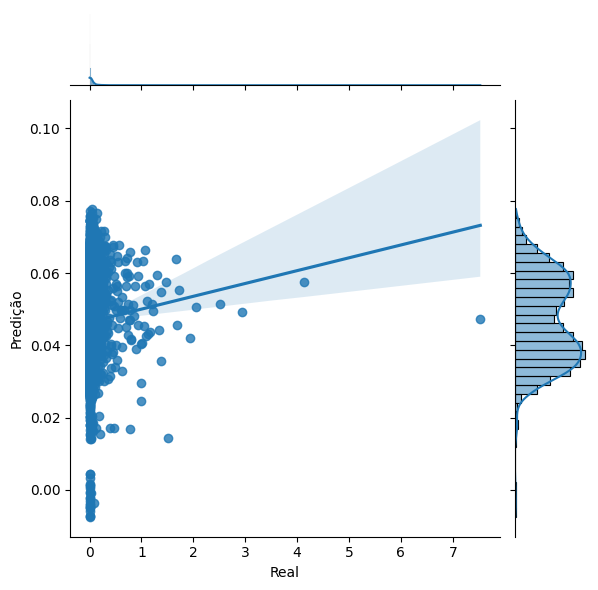

In [ ]:
test_DD_OU = pd.DataFrame({'Predição':yRidPre_DD_OU,'Real':y_test_DD_OU})
fig = plt.figure(figsize=(16,8))
test_DD_OU = test_DD_OU.reset_index()
test_DD_OU = test_DD_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_OU,kind='reg',);

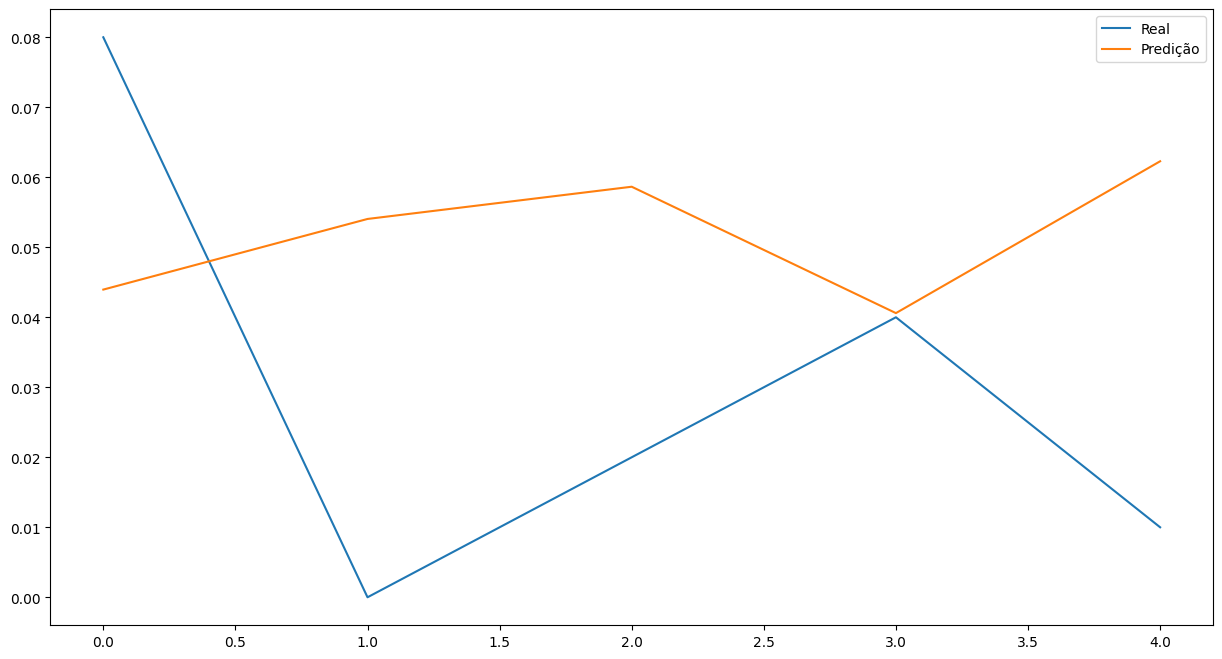

In [ ]:
dbridge1_DD_OU = dbRidge_DD_OU.head()
dbridge1_DD_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_DD_OU.coef_

array([0.01395537, 0.00841271, 0.00263933, 0.00541014])

------------------------------------------

**LinearRegression**

In [ ]:
lr_DD_OU = LinearRegression()
lr_DD_OU.fit(x_train_DD_OU,y_train_DD_OU)

LinearRegression()

In [ ]:
lr_DD_OU.score(x_train_DD_OU,y_train_DD_OU)

0.005143956060728816

In [ ]:
lr_DD_OU.score(x_test_DD_OU,y_test_DD_OU)

0.0027707598269162137

In [ ]:
yLinearPre_DD_OU = lr_DD_OU.predict(x_test_DD_OU)

In [ ]:
r2Linear_DD_OU = r2_score(y_test_DD_OU , yLinearPre_DD_OU)
r2Linear_DD_OU

0.0027707598269162137

<Figure size 1600x800 with 0 Axes>

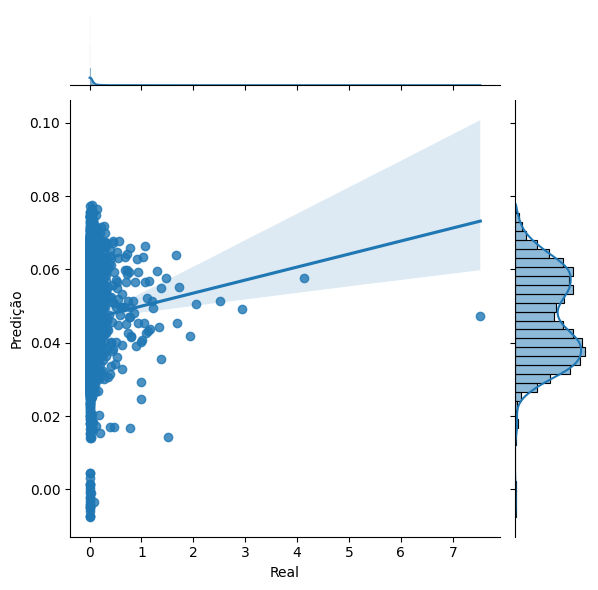

In [ ]:
test_DD_OU = pd.DataFrame({'Predição':yLinearPre_DD_OU,'Real':y_test_DD_OU})
fig= plt.figure(figsize=(16,8))
test_DD_OU = test_DD_OU.reset_index()
test_DD_OU = test_DD_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_OU,kind='reg',);

In [ ]:
mae_DD_OU = mean_absolute_error(yLinearPre_DD_OU, y_test_DD_OU)
print('Erro Absoluto Médio '+str(mae_DD_OU))

Erro Absoluto Médio 0.06285558710679423


In [ ]:
dbLinear_DD_OU = pd.DataFrame({'Real': y_test_DD_OU, 'Predição': yLinearPre_DD_OU})
dbLinear_DD_OU

Real  Predição
0     0.08  0.043955
1     0.00  0.054046
2     0.02  0.058652
3     0.04  0.040596
4     0.01  0.062290
...    ...       ...
4068  0.00  0.074595
4069  0.02  0.027185
4070  0.23  0.032047
4071  0.00  0.041594
4072  0.01  0.040469

[4073 rows x 2 columns]

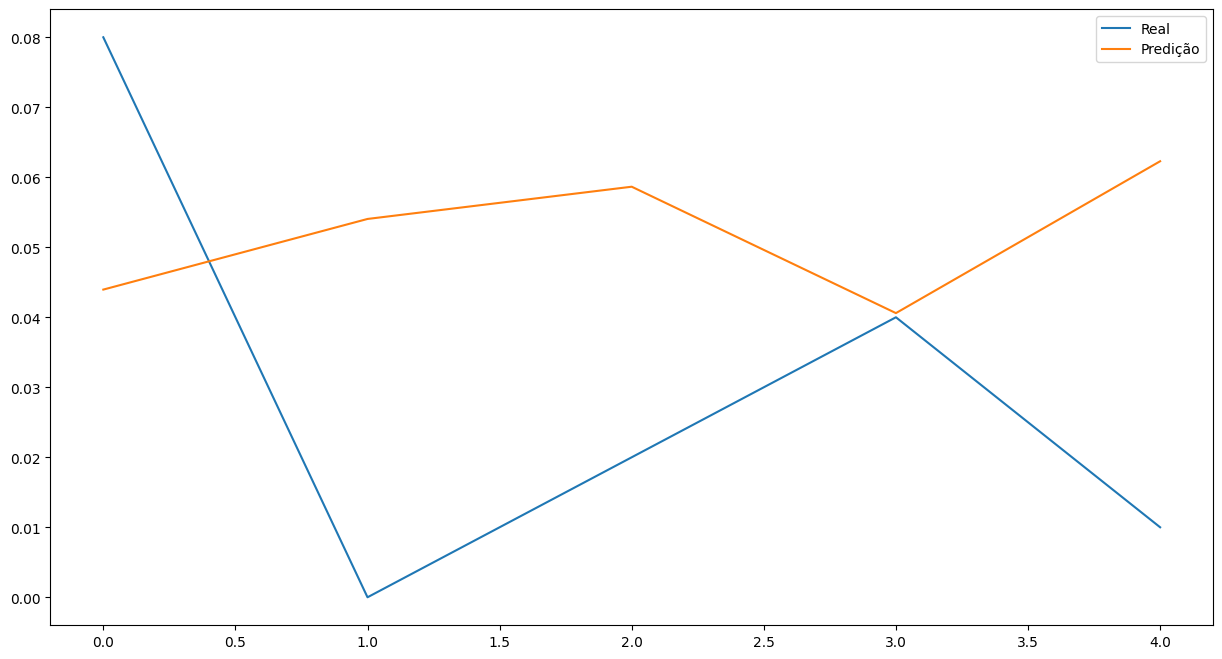

In [ ]:
dbLinear1_DD_OU = dbLinear_DD_OU.head()
dbLinear1_DD_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_DD_OU.coef_

array([0.0139584 , 0.00841336, 0.00264019, 0.00541164])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_DD_OU = RandomForestRegressor()
rf_DD_OU.fit(x_train_DD_OU , y_train_DD_OU)

RandomForestRegressor()

In [ ]:
rf_DD_OU.score(x_train_DD_OU,y_train_DD_OU)

0.6917478515468307

In [ ]:
rf_DD_OU.score(x_test_DD_OU,y_test_DD_OU)

0.010551156452416999

In [ ]:
yRandomPre_DD_OU = rf_DD_OU.predict(x_test_DD_OU)

In [ ]:
r2Random_DD_OU = r2_score(y_test_DD_OU , yRandomPre_DD_OU)
r2Random_DD_OU

0.010551156452416999

In [ ]:
mae_DD_OU = mean_absolute_error(yRandomPre_DD_OU, y_test_DD_OU)
print('Erro Absoluto Médio '+str(mae_DD_OU))

Erro Absoluto Médio 0.056234044563234865


In [ ]:
dbRandom_DD_OU = pd.DataFrame({'Real': y_test_DD_OU, 'Predição': yRandomPre_DD_OU})
dbRandom_DD_OU

Real  Predição
0     0.08  0.025585
1     0.00  0.000000
2     0.02  0.022961
3     0.04  0.037136
4     0.01  0.041340
...    ...       ...
4068  0.00  0.002423
4069  0.02  0.008842
4070  0.23  0.010093
4071  0.00  0.050261
4072  0.01  0.021260

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

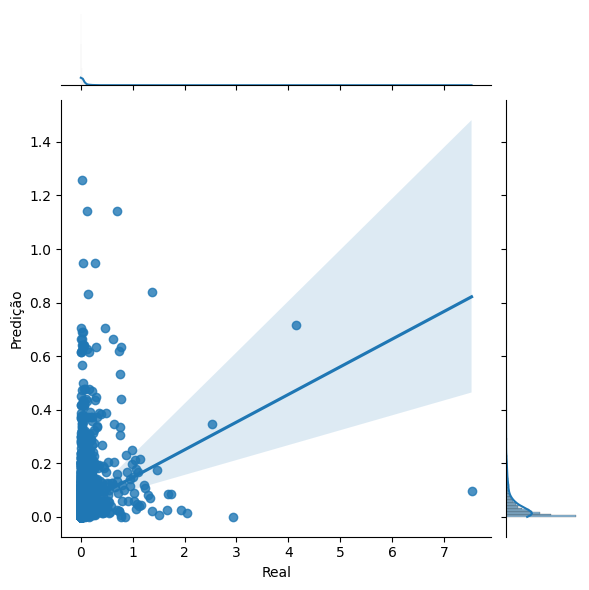

In [ ]:
test_DD_OU = pd.DataFrame({'Predição':yRandomPre_DD_OU,'Real':y_test_DD_OU})
fig= plt.figure(figsize=(16,8))
test_DD_OU = test_DD_OU.reset_index()
test_DD_OU = test_DD_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_OU,kind='reg',);

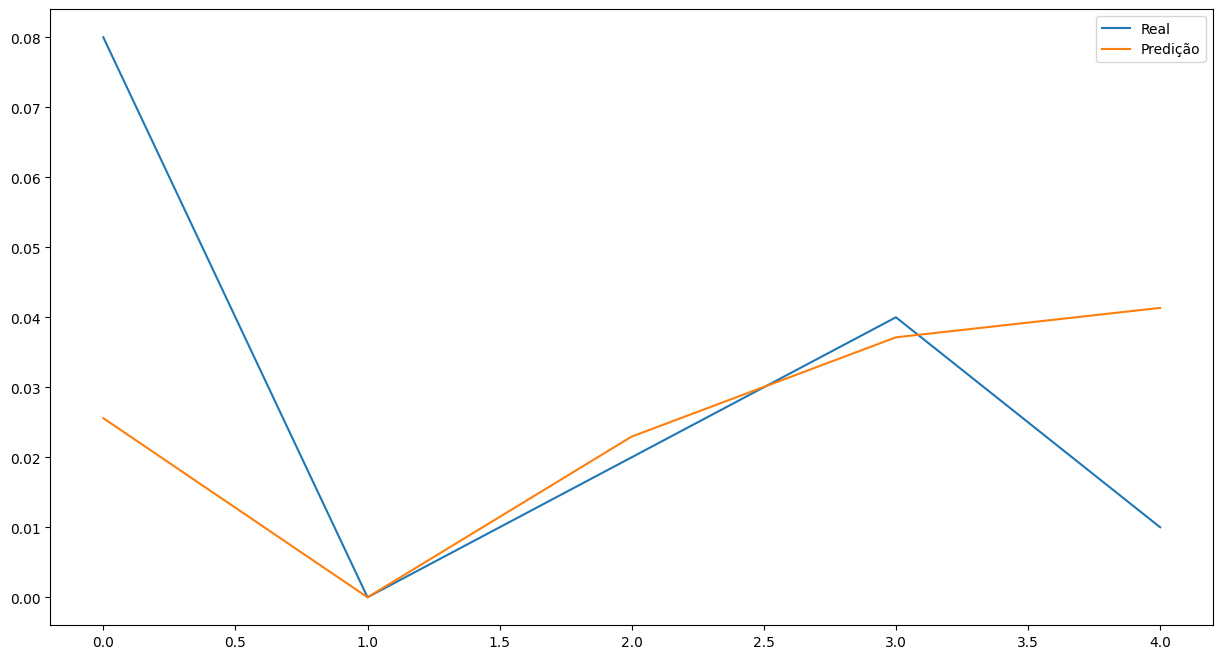

In [ ]:
dbRandom1_DD_OU = dbRandom_DD_OU.head()
dbRandom1_DD_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_DD_OU.feature_importances_

array([0.08139986, 0.41713781, 0.20431976, 0.29714257])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_DD_OU = KNeighborsRegressor()
knn_DD_OU.fit(x_train_DD_OU, y_train_DD_OU)

KNeighborsRegressor()

In [ ]:
knn_DD_OU.score(x_train_DD_OU,y_train_DD_OU)

0.23684557688359975

In [ ]:
knn_DD_OU.score(x_test_DD_OU , y_test_DD_OU)

-0.07788549278774015

In [ ]:
pred_DD_OU = knn_DD_OU.predict(x_test_DD_OU)

r2_knn_DD_OU = r2_score(y_test_DD_OU,pred_DD_OU)
print(r2_knn_DD_OU)

-0.07788549278774015


In [ ]:
mae_DD_OU = mean_absolute_error(pred_DD_OU, y_test_DD_OU)
print('Erro Absoluto Médio '+str(mae_DD_OU))

Erro Absoluto Médio 0.06224404615762338


In [ ]:
dbKNN_DD_OU = pd.DataFrame({'Real': y_test_DD_OU, 'Predição': pred_DD_OU})
dbKNN_DD_OU

Real  Predição
0     0.08     0.012
1     0.00     0.000
2     0.02     0.030
3     0.04     0.034
4     0.01     0.030
...    ...       ...
4068  0.00     0.008
4069  0.02     0.030
4070  0.23     0.010
4071  0.00     0.050
4072  0.01     0.024

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

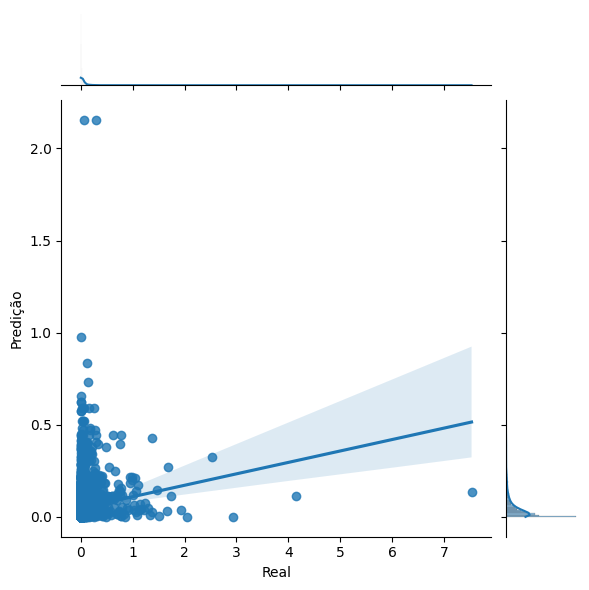

In [ ]:
test_DD_OU = pd.DataFrame({'Predição':pred_DD_OU,'Real':y_test_DD_OU})
fig= plt.figure(figsize=(16,8))
test_DD_OU = test_DD_OU.reset_index()
test_DD_OU = test_DD_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_OU,kind='reg',);

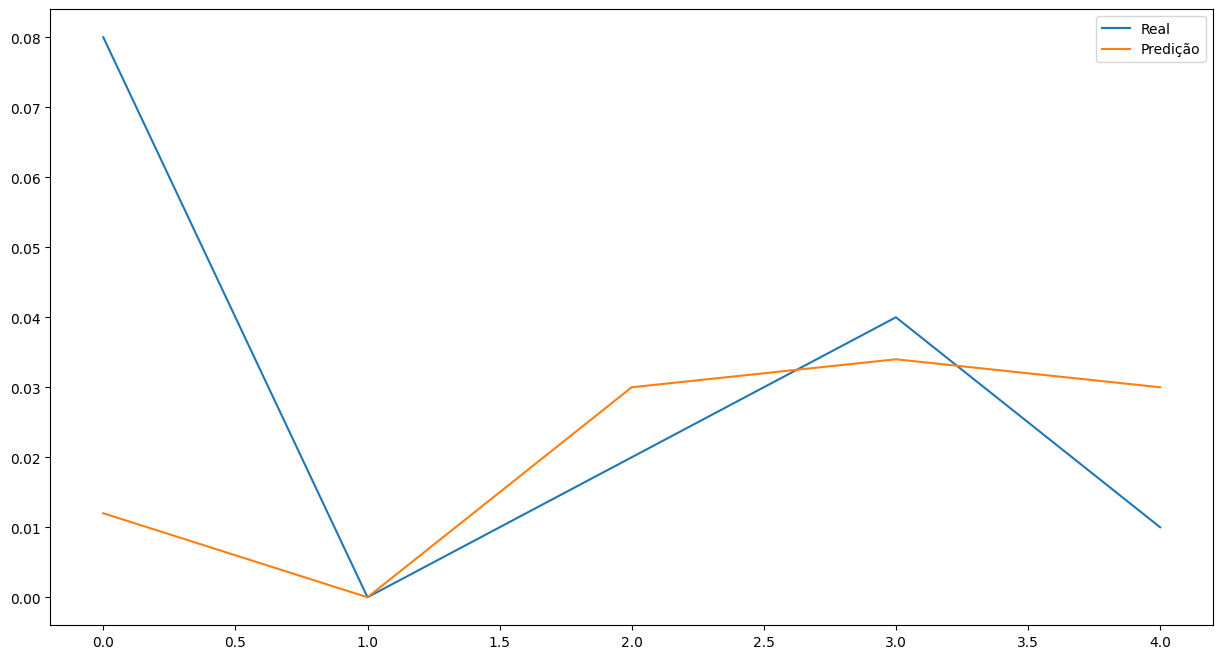

In [ ]:
dbKNN1_DD_OU = dbKNN_DD_OU.head()
dbKNN1_DD_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_DD_OU = sm.add_constant(X_DD_OU)
est_DD_OU = sm.OLS(y_DD_OU, m_DD_OU)
est2_DD_OU = est_DD_OU.fit()
print(est2_DD_OU.params)

[-2.23425553e+00  1.03063357e-03  1.12591313e-03  5.03924473e-04
  1.48873691e-05]


--------------------------------------------------------------------------------------

In [ ]:
m_DD_OU = sm.add_constant(X_DD_OU)
est_DD_OU=sm.OLS(y_DD_OU,m_DD_OU)
est2_DD_OU = est_DD_OU.fit()
print(est2_DD_OU.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.59
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           2.95e-15
Time:                        04:27:54   Log-Likelihood:                 5012.0
No. Observations:               16290   AIC:                        -1.001e+04
Df Residuals:                   16285   BIC:                            -9976.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2343      0.491     -4.554      0.0

--------------------------------------------------------------------------------------

# Teste DADOS - GB

In [ ]:
dff_DD_GB = df.copy()

le_DD_GB = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_DD_GB[col] = le_DD_GB.fit_transform(df[col])

In [ ]:
dff_DD_GB.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_DD_GB = dff_DD_GB[['Platform', 'Year', 'Genre', 'Publisher']].values

y_DD_GB = dff_DD_GB['Global_Sales'].values

In [ ]:
x_train_DD_GB, x_test_DD_GB, y_train_DD_GB, y_test_DD_GB = train_test_split(X_DD_GB, y_DD_GB, test_size=0.25, random_state=42)

In [ ]:
ro_DD_GB = RobustScaler()

In [ ]:
x_train_DD_GB = ro_DD_GB.fit_transform(x_train_DD_GB)
x_test_DD_GB = ro_DD_GB.fit_transform(x_test_DD_GB)


**Decision Tree**

In [ ]:
regressor_DD_GB = DecisionTreeRegressor()
regressor_DD_GB.fit(x_train_DD_GB, y_train_DD_GB)




/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


DecisionTreeRegressor()

In [ ]:
regressor_DD_GB.score(x_train_DD_GB,y_train_DD_GB)

0.7215097722495021

In [ ]:
regressor_DD_GB.score(x_test_DD_GB,y_test_DD_GB)


-0.15764859609381032

In [ ]:
yTreePre_DD_GB = regressor_DD_GB.predict(x_test_DD_GB)

In [ ]:
r2Tree_DD_GB = r2_score(y_test_DD_GB ,yTreePre_DD_GB )
r2Tree_DD_GB

-0.15764859609381032

In [ ]:
mae_DD_GB = mean_absolute_error(yTreePre_DD_GB, y_test_DD_GB)
print('Erro Absoluto Médio '+str(mae_DD_GB))

Erro Absoluto Médio 0.5614885502281771


In [ ]:
db_DD_GB = pd.DataFrame({'Real': y_test_DD_GB, 'Predição': yTreePre_DD_GB})
db_DD_GB

Real  Predição
0     0.57  0.220000
1     0.02  0.030000
2     0.33  0.156667
3     0.67  0.607500
4     0.15  0.536667
...    ...       ...
4068  0.05  0.010000
4069  0.23  0.170000
4070  2.20  0.040000
4071  0.19  0.756000
4072  0.13  0.214286

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

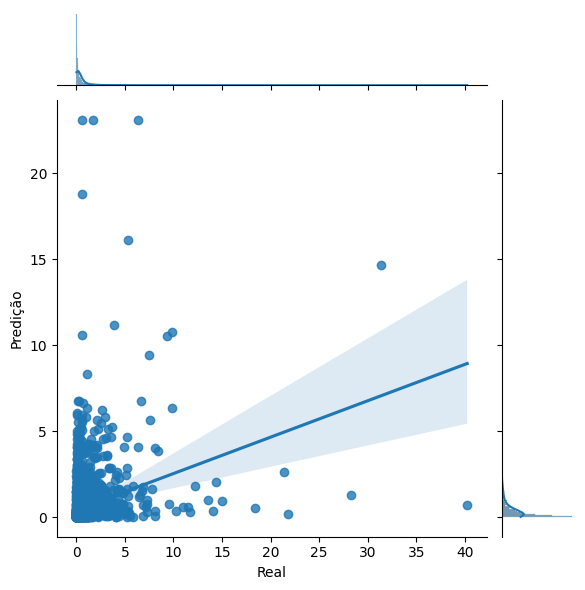

In [ ]:
test_DD_GB = pd.DataFrame({'Predição':yTreePre_DD_GB,'Real':y_test_DD_GB})
fig_DD_GB = plt.figure(figsize=(16,8))
test_DD_GB = test_DD_GB.reset_index()
test_DD_GB = test_DD_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_GB,kind='reg',);

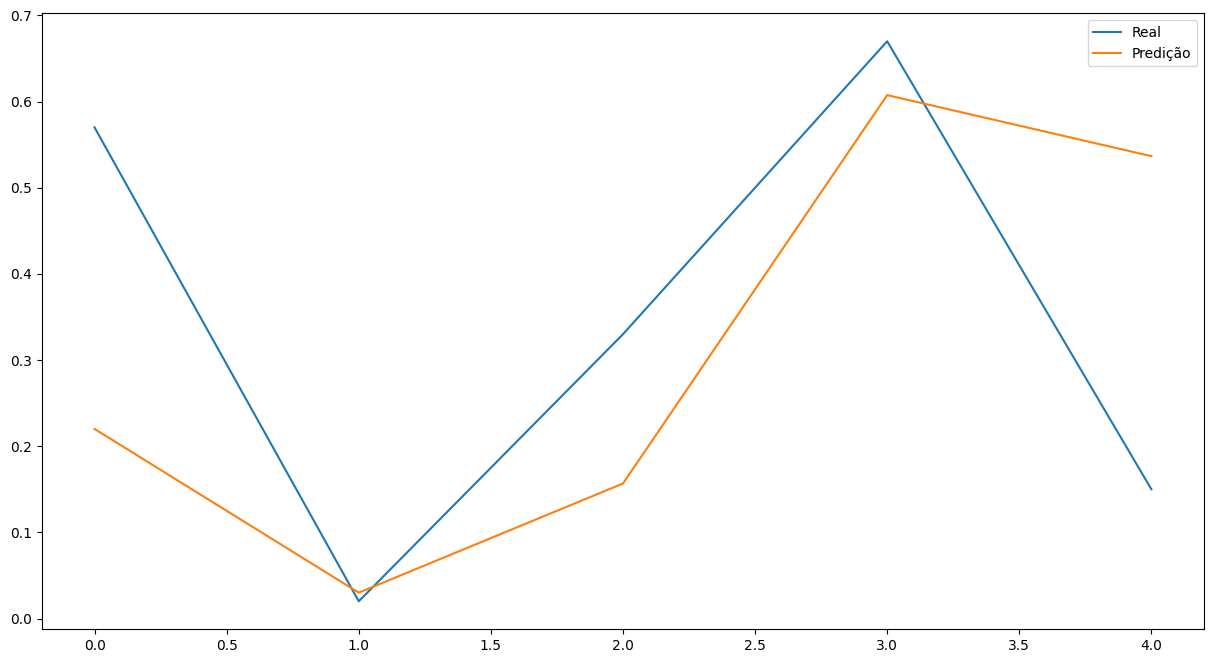

In [ ]:
db1_DD_GB = db_DD_GB.head()
db1_DD_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_DD_GB.feature_importances_

array([0.10944344, 0.36945262, 0.31144611, 0.20965783])

------------------------------------------

**Ridge**

In [ ]:
rid_DD_GB = Ridge()
rid_DD_GB.fit(x_train_DD_GB,y_train_DD_GB)

Ridge()

In [ ]:
rid_DD_GB.score(x_train_DD_GB,y_train_DD_GB)

0.007275797654906491

In [ ]:
rid_DD_GB.score(x_test_DD_GB,y_test_DD_GB)

0.012604629802262957

In [ ]:
yRidPre_DD_GB = rid_DD_GB.predict(x_test_DD_GB)

In [ ]:
r2Rid_DD_GB = r2_score(y_test_DD_GB ,yRidPre_DD_GB )
r2Rid_DD_GB

0.012604629802262957

In [ ]:
mae_DD_GB = mean_absolute_error(yRidPre_DD_GB, y_test_DD_GB)
print('Erro Absoluto Médio '+str(mae_DD_GB))

Erro Absoluto Médio 0.5841050112676792


In [ ]:
dbRidge_DD_GB = pd.DataFrame({'Real': y_test_DD_GB, 'Predição': yRidPre_DD_GB})
dbRidge_DD_GB

Real  Predição
0     0.57  0.576179
1     0.02  0.419107
2     0.33  0.563874
3     0.67  0.702777
4     0.15  0.562639
...    ...       ...
4068  0.05  0.466251
4069  0.23  0.651452
4070  2.20  0.407400
4071  0.19  0.266625
4072  0.13  0.435109

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

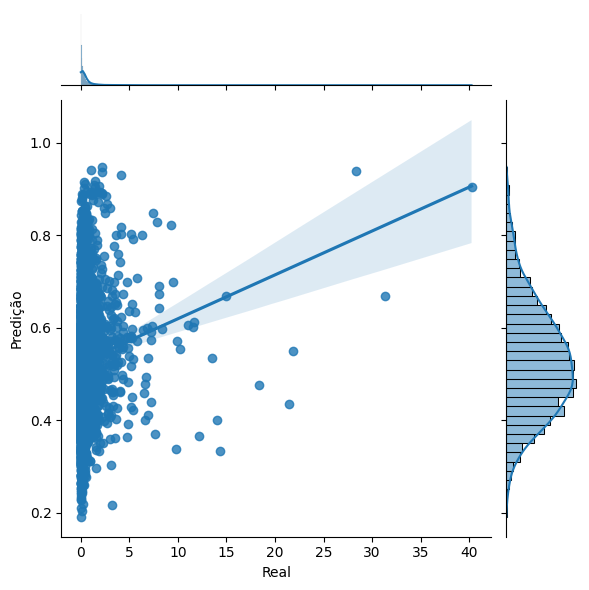

In [ ]:
test_DD_GB = pd.DataFrame({'Predição':yRidPre_DD_GB,'Real':y_test_DD_GB})
fig = plt.figure(figsize=(16,8))
test_DD_GB = test_DD_GB.reset_index()
test_DD_GB = test_DD_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_GB,kind='reg',);

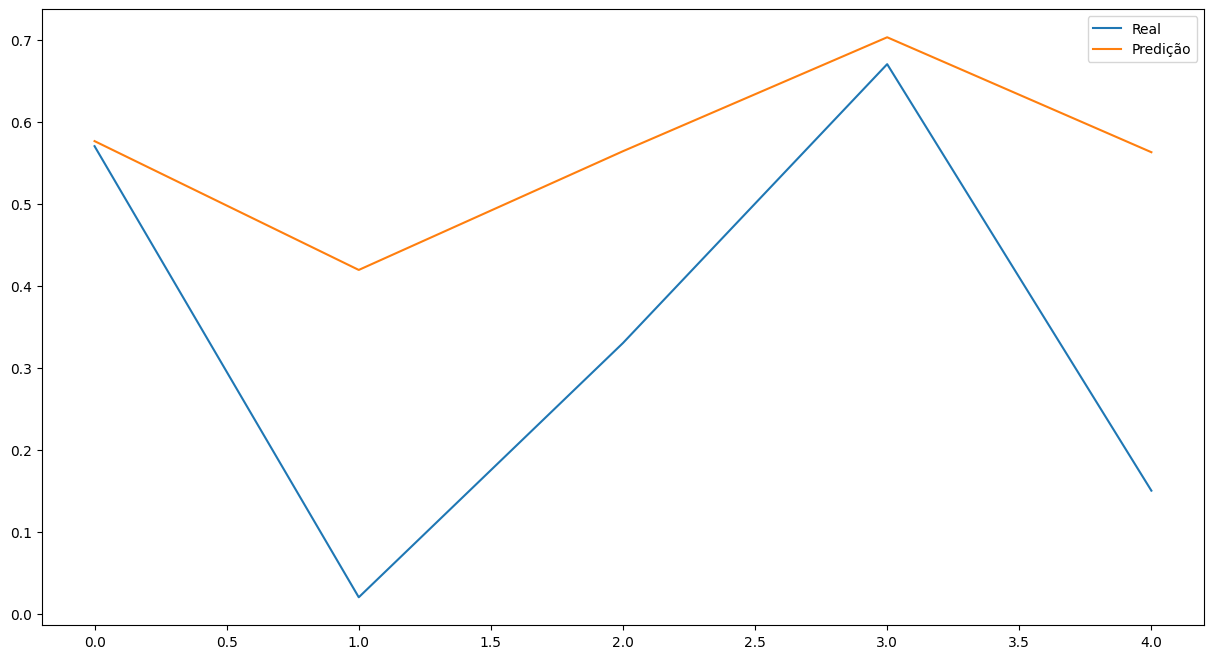

In [ ]:
dbridge1_DD_GB = dbRidge_DD_GB.head()
dbridge1_DD_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_DD_GB.coef_

array([ 0.09220258, -0.12984172,  0.02950316,  0.05851565])

------------------------------------------

**LinearRegression**

In [ ]:
lr_DD_GB = LinearRegression()
lr_DD_GB.fit(x_train_DD_GB,y_train_DD_GB)

LinearRegression()

In [ ]:
lr_DD_GB.score(x_train_DD_GB,y_train_DD_GB)

0.007275797899980785

In [ ]:
lr_DD_GB.score(x_test_DD_GB,y_test_DD_GB)

0.01260553019745747

In [ ]:
yLinearPre_DD_GB = lr_DD_GB.predict(x_test_DD_GB)

In [ ]:
r2Linear_DD_GB = r2_score(y_test_DD_GB , yLinearPre_DD_GB)
r2Linear_DD_GB

0.01260553019745747

<Figure size 1600x800 with 0 Axes>

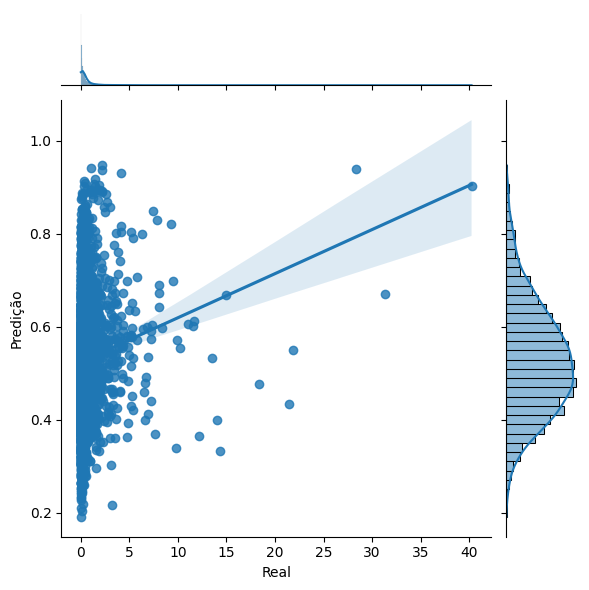

In [ ]:
test_DD_GB = pd.DataFrame({'Predição':yLinearPre_DD_GB,'Real':y_test_DD_GB})
fig= plt.figure(figsize=(16,8))
test_DD_GB = test_DD_GB.reset_index()
test_DD_GB = test_DD_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_GB,kind='reg',);

In [ ]:
mae_DD_GB = mean_absolute_error(yLinearPre_DD_GB, y_test_DD_GB)
print('Erro Absoluto Médio '+str(mae_DD_GB))

Erro Absoluto Médio 0.5841039030020694


In [ ]:
dbLinear_DD_GB = pd.DataFrame({'Real': y_test_DD_GB, 'Predição': yLinearPre_DD_GB})
dbLinear_DD_GB

Real  Predição
0     0.57  0.576186
1     0.02  0.419092
2     0.33  0.563888
3     0.67  0.702805
4     0.15  0.562655
...    ...       ...
4068  0.05  0.466256
4069  0.23  0.651460
4070  2.20  0.407366
4071  0.19  0.266576
4072  0.13  0.435090

[4073 rows x 2 columns]

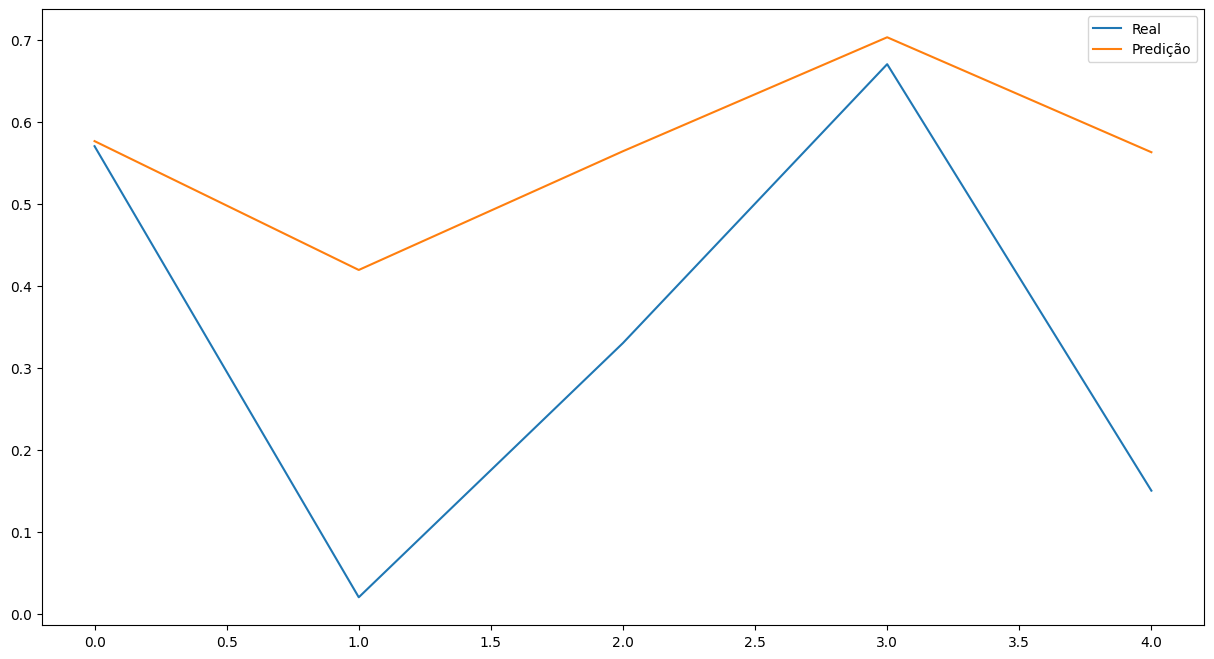

In [ ]:
dbLinear1_DD_GB = dbLinear_DD_GB.head()
dbLinear1_DD_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_DD_GB.coef_

array([ 0.09222824, -0.12985996,  0.02950808,  0.0585326 ])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_DD_GB = RandomForestRegressor()
rf_DD_GB.fit(x_train_DD_GB , y_train_DD_GB)

RandomForestRegressor()

In [ ]:
rf_DD_GB.score(x_train_DD_GB,y_train_DD_GB)

0.6642204934359136

In [ ]:
rf_DD_GB.score(x_test_DD_GB,y_test_DD_GB)

0.0824564109887953

In [ ]:
yRandomPre_DD_GB = rf_DD_GB.predict(x_test_DD_GB)

In [ ]:
r2Random_DD_GB = r2_score(y_test_DD_GB , yRandomPre_DD_GB)
r2Random_DD_GB

0.0824564109887953

In [ ]:
mae_DD_GB = mean_absolute_error(yRandomPre_DD_GB, y_test_DD_GB)
print('Erro Absoluto Médio '+str(mae_DD_GB))

Erro Absoluto Médio 0.5151743266860834


In [ ]:
dbRandom_DD_GB = pd.DataFrame({'Real': y_test_DD_GB, 'Predição': yRandomPre_DD_GB})
dbRandom_DD_GB

Real  Predição
0     0.57  0.330994
1     0.02  0.030860
2     0.33  0.342664
3     0.67  0.649322
4     0.15  0.418123
...    ...       ...
4068  0.05  0.032790
4069  0.23  0.341490
4070  2.20  0.135453
4071  0.19  0.751587
4072  0.13  0.214581

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

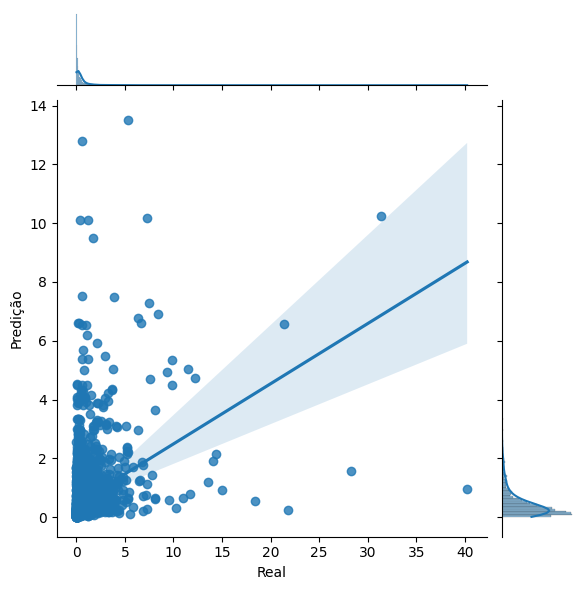

In [ ]:
test_DD_GB = pd.DataFrame({'Predição':yRandomPre_DD_GB,'Real':y_test_DD_GB})
fig= plt.figure(figsize=(16,8))
test_DD_GB = test_DD_GB.reset_index()
test_DD_GB = test_DD_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_GB,kind='reg',);

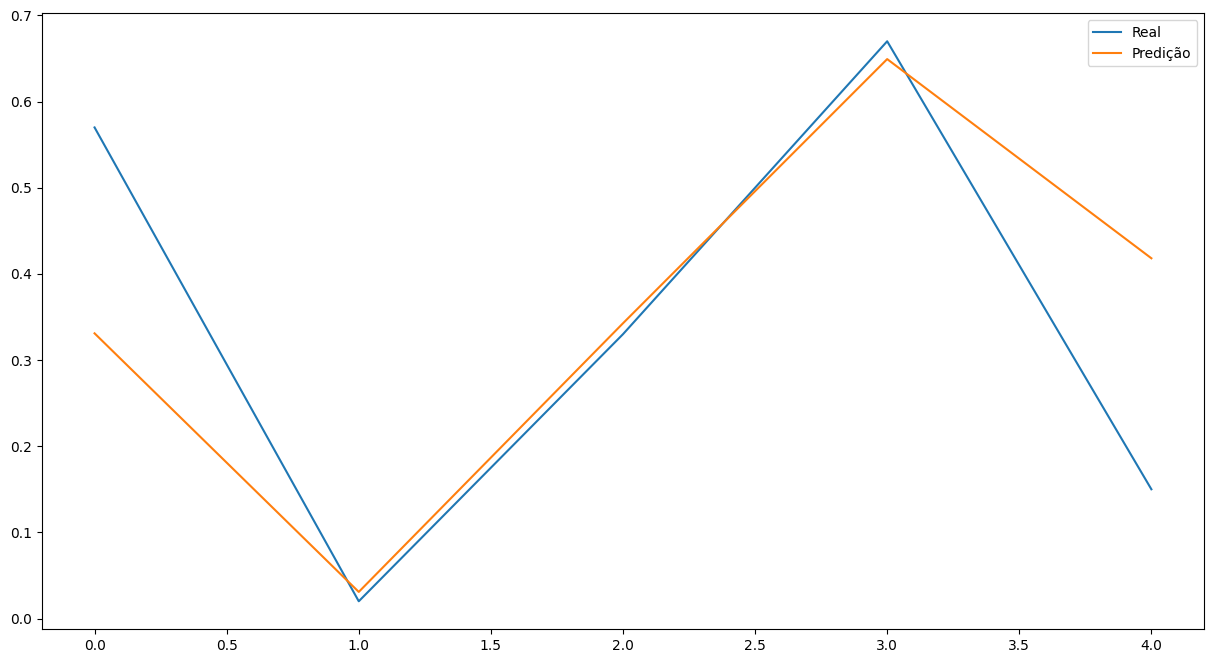

In [ ]:
dbRandom1_DD_GB = dbRandom_DD_GB.head()
dbRandom1_DD_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_DD_GB.feature_importances_

array([0.12469919, 0.4018694 , 0.27228514, 0.20114627])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_DD_GB = KNeighborsRegressor()
knn_DD_GB.fit(x_train_DD_GB, y_train_DD_GB)

KNeighborsRegressor()

In [ ]:
knn_DD_GB.score(x_train_DD_GB,y_train_DD_GB)

0.31719964952485424

In [ ]:
knn_DD_GB.score(x_test_DD_GB , y_test_DD_GB)

-0.05332072528993548

In [ ]:
pred_DD_GB = knn_DD_GB.predict(x_test_DD_GB)

r2_knn_DD_GB = r2_score(y_test_DD_GB,pred_DD_GB)
print(r2_knn_DD_GB)

-0.05332072528993548


In [ ]:
mae_DD_GB = mean_absolute_error(pred_DD_GB, y_test_DD_GB)
print('Erro Absoluto Médio '+str(mae_DD_GB))

Erro Absoluto Médio 0.5913164743432359


In [ ]:
dbKNN_DD_GB = pd.DataFrame({'Real': y_test_DD_GB, 'Predição': pred_DD_GB})
dbKNN_DD_GB

Real  Predição
0     0.57     0.174
1     0.02     0.028
2     0.33     0.402
3     0.67     0.576
4     0.15     0.348
...    ...       ...
4068  0.05     0.108
4069  0.23     0.472
4070  2.20     0.172
4071  0.19     0.756
4072  0.13     0.240

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

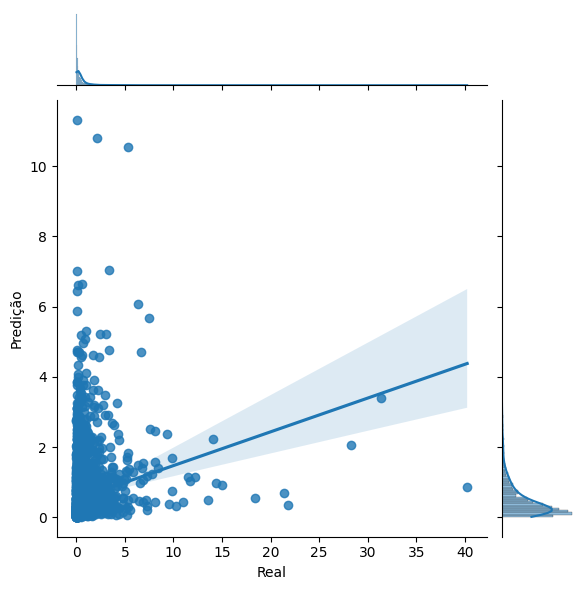

In [ ]:
test_DD_GB = pd.DataFrame({'Predição':pred_DD_GB,'Real':y_test_DD_GB})
fig= plt.figure(figsize=(16,8))
test_DD_GB = test_DD_GB.reset_index()
test_DD_GB = test_DD_GB.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_DD_GB,kind='reg',);

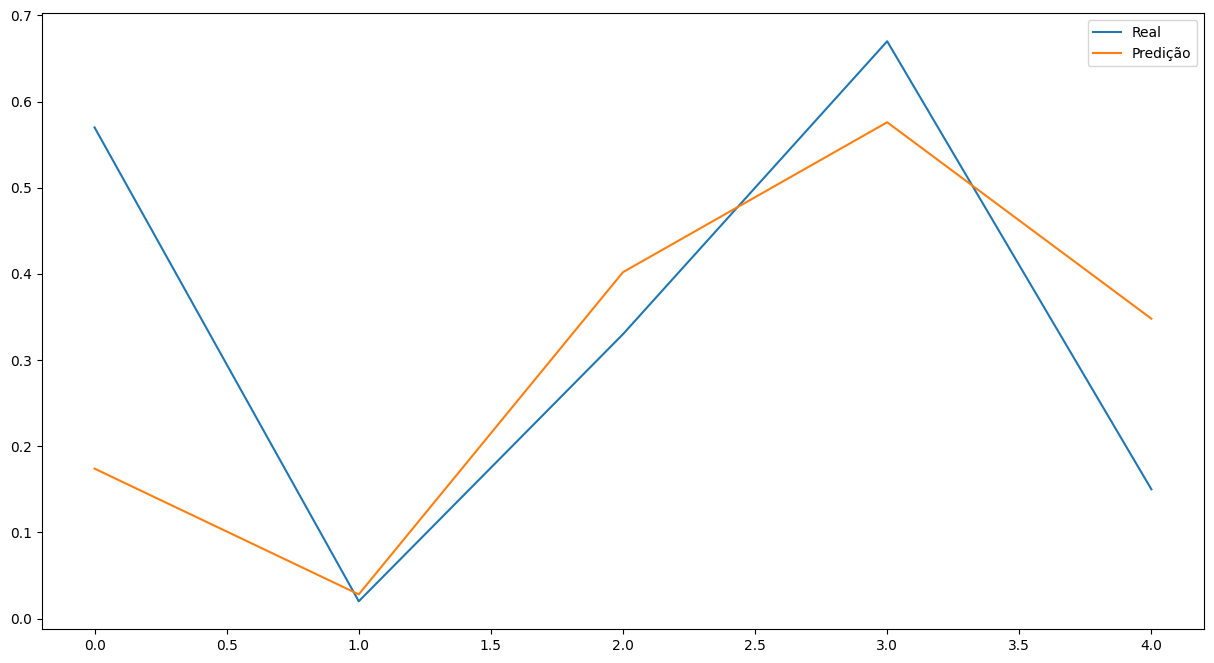

In [ ]:
dbKNN1_DD_GB = dbKNN_DD_GB.head()
dbKNN1_DD_GB.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_DD_GB = sm.add_constant(X_DD_GB)
est_DD_GB = sm.OLS(y_DD_GB, m_DD_GB)
est2_DD_GB = est_DD_GB.fit()
print(est2_DD_GB.params)

[ 4.36980228e+01  7.05410070e-03 -2.16037821e-02  3.29276843e-03
  1.91869382e-04]


--------------------------------------------------------------------------------------

In [ ]:
m_DD_GB = sm.add_constant(X_DD_GB)
est_DD_GB=sm.OLS(y_DD_GB,m_DD_GB)
est2_DD_GB = est_DD_GB.fit()
print(est2_DD_GB.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     36.68
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.42e-30
Time:                        04:28:16   Log-Likelihood:                -28855.
No. Observations:               16290   AIC:                         5.772e+04
Df Residuals:                   16285   BIC:                         5.776e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6980      3.923     11.138      0.0

--------------------------------------------------------------------------------------

# Teste NA - OU

In [ ]:
dff_NA_OU = df.copy()

le_NA_OU = LabelEncoder()

feature = ["Platform", "Genre", "Publisher"]


for col in feature:
    dff_NA_OU[col] = le_NA_OU.fit_transform(df[col])

In [ ]:
dff_NA_OU.head()

Rank                      Name  Platform  Year  Genre  Publisher  NA_Sales  \
1     2         Super Mario Bros.        11  1985      4        359     29.08   
2     3            Mario Kart Wii        26  2008      6        359     15.85   
3     4         Wii Sports Resort        26  2009     10        359     15.75   
4     5  Pokemon Red/Pokemon Blue         5  1996      7        359     11.27   
5     6                    Tetris         5  1989      5        359     23.20   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  
4      8.89     10.22         1.00         31.37  
5      2.26      4.22         0.58         30.26

In [ ]:
X_NA_OU = dff_NA_OU[['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']].values

y_NA_OU = dff_NA_OU['Other_Sales'].values

In [ ]:
x_train_NA_OU, x_test_NA_OU, y_train_NA_OU, y_test_NA_OU = train_test_split(X_NA_OU, y_NA_OU, test_size=0.25, random_state=42)

In [ ]:
ro_NA_OU = RobustScaler()

In [ ]:
x_train_NA_OU = ro_NA_OU.fit_transform(x_train_NA_OU)
x_test_NA_OU = ro_NA_OU.fit_transform(x_test_NA_OU)


**Decision Tree**

In [ ]:
regressor_NA_OU = DecisionTreeRegressor()
regressor_NA_OU.fit(x_train_NA_OU, y_train_NA_OU)




DecisionTreeRegressor()

In [ ]:
regressor_NA_OU.score(x_train_NA_OU,y_train_NA_OU)

0.9985005887384504

In [ ]:
regressor_NA_OU.score(x_test_NA_OU,y_test_NA_OU)


0.29357131759493194

In [ ]:
yTreePre_NA_OU = regressor_NA_OU.predict(x_test_NA_OU)

In [ ]:
r2Tree_NA_OU = r2_score(y_test_NA_OU ,yTreePre_NA_OU )
r2Tree_NA_OU

0.29357131759493194

In [ ]:
mae_NA_OU = mean_absolute_error(yTreePre_NA_OU, y_test_NA_OU)
print('Erro Absoluto Médio '+str(mae_NA_OU))

Erro Absoluto Médio 0.03407550302222534


In [ ]:
db_NA_OU = pd.DataFrame({'Real': y_test_NA_OU, 'Predição': yTreePre_NA_OU})
db_NA_OU

Real  Predição
0     0.08      0.08
1     0.00      0.00
2     0.02      0.02
3     0.04      0.07
4     0.01      0.01
...    ...       ...
4068  0.00      0.00
4069  0.02      0.01
4070  0.23      0.15
4071  0.00      0.00
4072  0.01      0.01

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

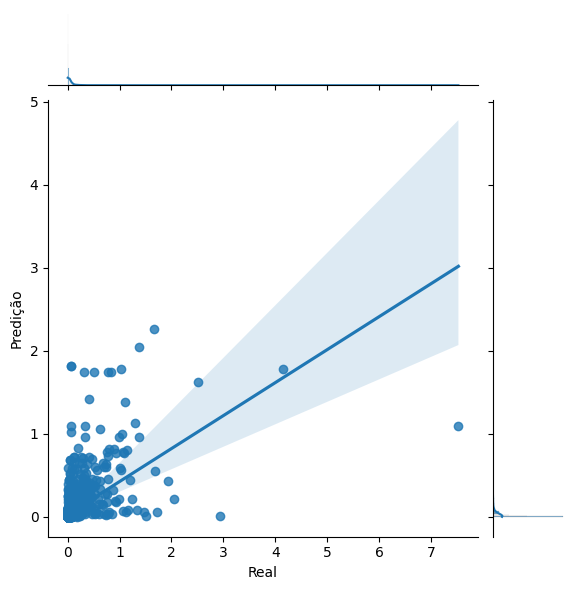

In [ ]:
test_NA_OU = pd.DataFrame({'Predição':yTreePre_NA_OU,'Real':y_test_NA_OU})
fig_NA_OU = plt.figure(figsize=(16,8))
test_NA_OU = test_NA_OU.reset_index()
test_NA_OU = test_NA_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_OU,kind='reg',);

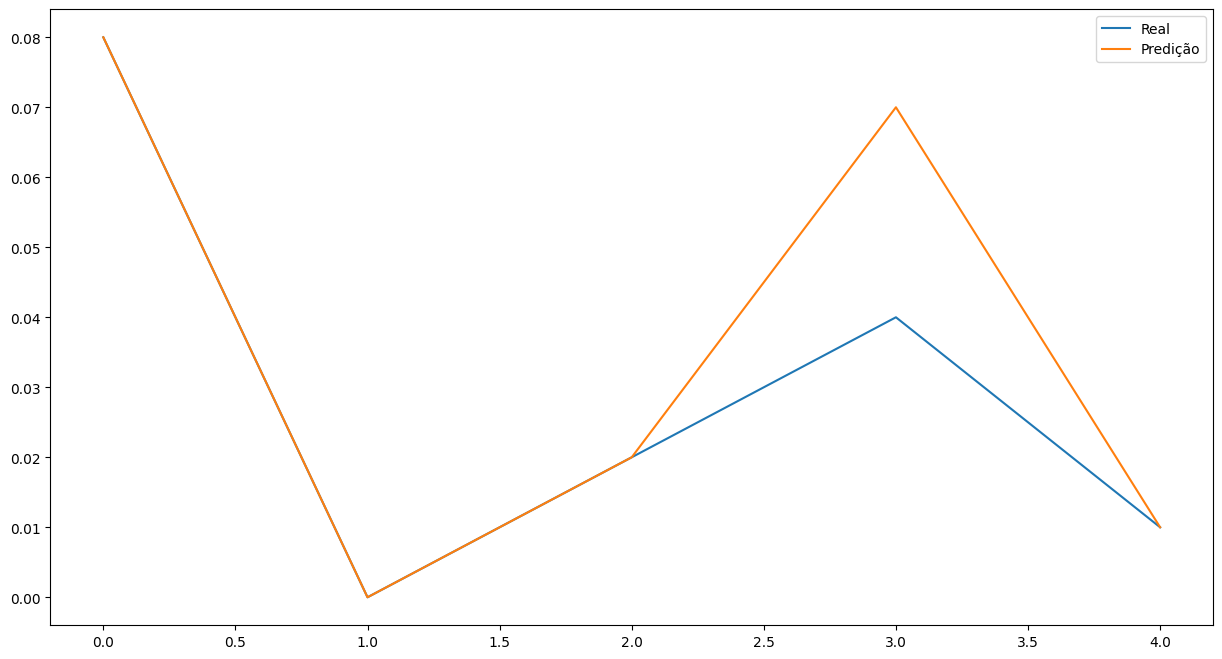

In [ ]:
db1_NA_OU = db_NA_OU.head()
db1_NA_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
regressor_NA_OU.feature_importances_

array([0.09102302, 0.21844541, 0.08562069, 0.04039504, 0.56451584])

------------------------------------------

**Ridge**

In [ ]:
rid_NA_OU = Ridge()
rid_NA_OU.fit(x_train_NA_OU,y_train_NA_OU)

Ridge()

In [ ]:
rid_NA_OU.score(x_train_NA_OU,y_train_NA_OU)

0.43949110990754725

In [ ]:
rid_NA_OU.score(x_test_NA_OU,y_test_NA_OU)

0.11478864486556817

In [ ]:
yRidPre_NA_OU = rid_NA_OU.predict(x_test_NA_OU)

In [ ]:
r2Rid_NA_OU = r2_score(y_test_NA_OU ,yRidPre_NA_OU )
r2Rid_NA_OU

0.11478864486556817

In [ ]:
mae_NA_OU = mean_absolute_error(yRidPre_NA_OU, y_test_NA_OU)
print('Erro Absoluto Médio '+str(mae_NA_OU))

Erro Absoluto Médio 0.04337836717709597


In [ ]:
dbRidge_NA_OU = pd.DataFrame({'Real': y_test_NA_OU, 'Predição': yRidPre_NA_OU})
dbRidge_NA_OU

Real  Predição
0     0.08  0.072713
1     0.00  0.020960
2     0.02  0.058999
3     0.04  0.015277
4     0.01  0.037185
...    ...       ...
4068  0.00  0.041133
4069  0.02 -0.010763
4070  0.23  0.171492
4071  0.00  0.028857
4072  0.01  0.032813

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

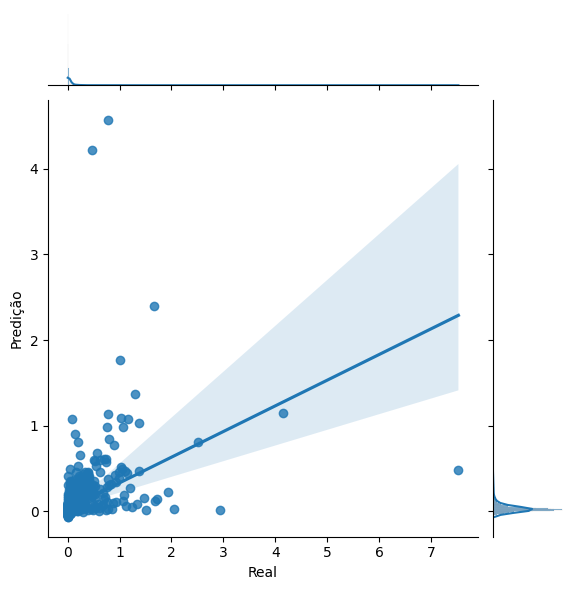

In [ ]:
test_NA_OU = pd.DataFrame({'Predição':yRidPre_NA_OU,'Real':y_test_NA_OU})
fig = plt.figure(figsize=(16,8))
test_NA_OU = test_NA_OU.reset_index()
test_NA_OU = test_NA_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_OU,kind='reg',);

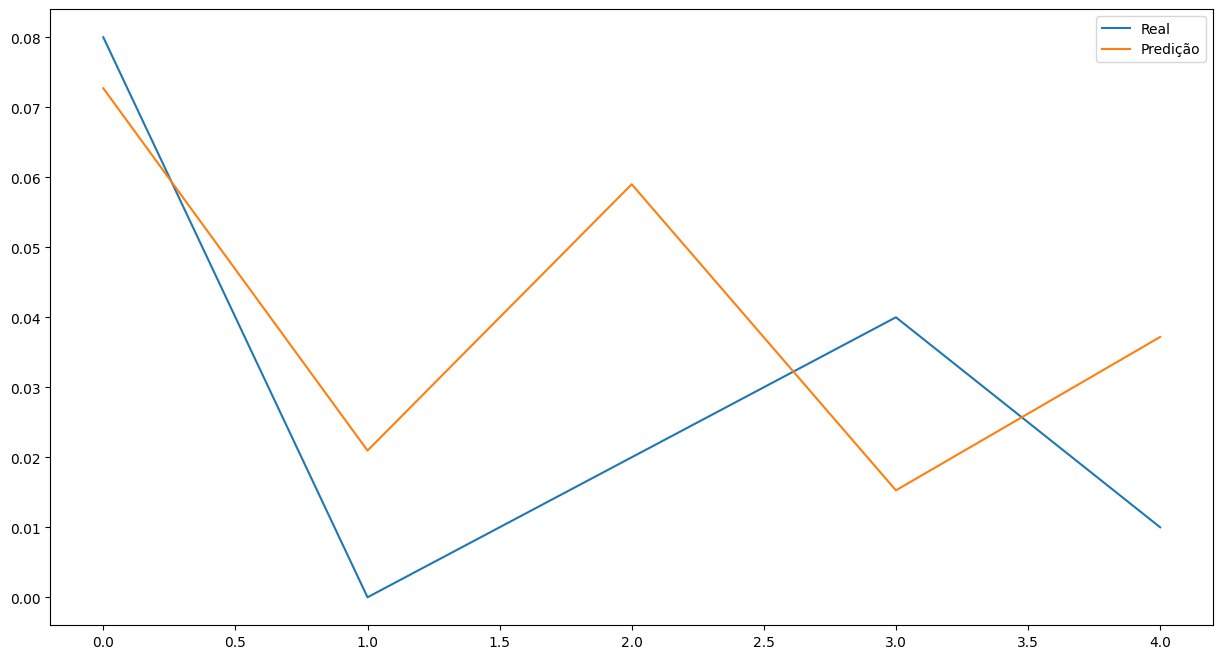

In [ ]:
dbridge1_NA_OU = dbRidge_NA_OU.head()
dbridge1_NA_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rid_NA_OU.coef_

array([0.00230873, 0.02148345, 0.00170573, 0.00421347, 0.03819646])

------------------------------------------

**LinearRegression**

In [ ]:
lr_NA_OU = LinearRegression()
lr_NA_OU.fit(x_train_NA_OU,y_train_NA_OU)

LinearRegression()

In [ ]:
lr_NA_OU.score(x_train_NA_OU,y_train_NA_OU)

0.43949111013526443

In [ ]:
lr_NA_OU.score(x_test_NA_OU,y_test_NA_OU)

0.11478522582315343

In [ ]:
yLinearPre_NA_OU = lr_NA_OU.predict(x_test_NA_OU)

In [ ]:
r2Linear_NA_OU = r2_score(y_test_NA_OU , yLinearPre_NA_OU)
r2Linear_NA_OU

0.11478522582315343

<Figure size 1600x800 with 0 Axes>

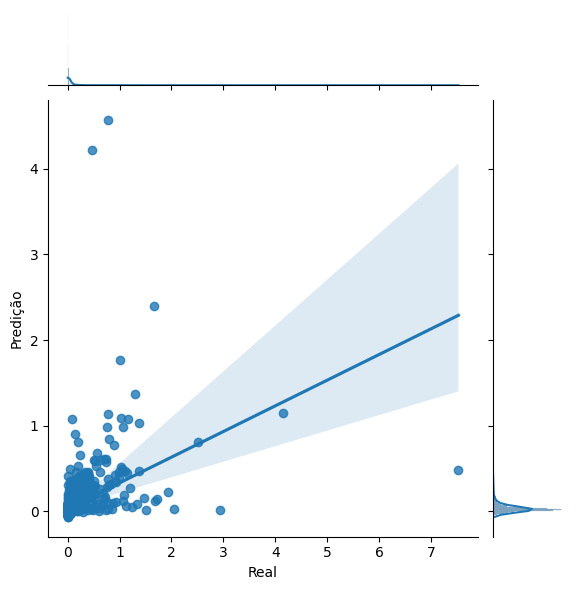

In [ ]:
test_NA_OU = pd.DataFrame({'Predição':yLinearPre_NA_OU,'Real':y_test_NA_OU})
fig= plt.figure(figsize=(16,8))
test_NA_OU = test_NA_OU.reset_index()
test_NA_OU = test_NA_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_OU,kind='reg',);

In [ ]:
mae_NA_OU = mean_absolute_error(yLinearPre_NA_OU, y_test_NA_OU)
print('Erro Absoluto Médio '+str(mae_NA_OU))

Erro Absoluto Médio 0.04337925030759818


In [ ]:
dbLinear_NA_OU = pd.DataFrame({'Real': y_test_NA_OU, 'Predição': yLinearPre_NA_OU})
dbLinear_NA_OU

Real  Predição
0     0.08  0.072713
1     0.00  0.020960
2     0.02  0.059000
3     0.04  0.015275
4     0.01  0.037185
...    ...       ...
4068  0.00  0.041136
4069  0.02 -0.010769
4070  0.23  0.171493
4071  0.00  0.028860
4072  0.01  0.032815

[4073 rows x 2 columns]

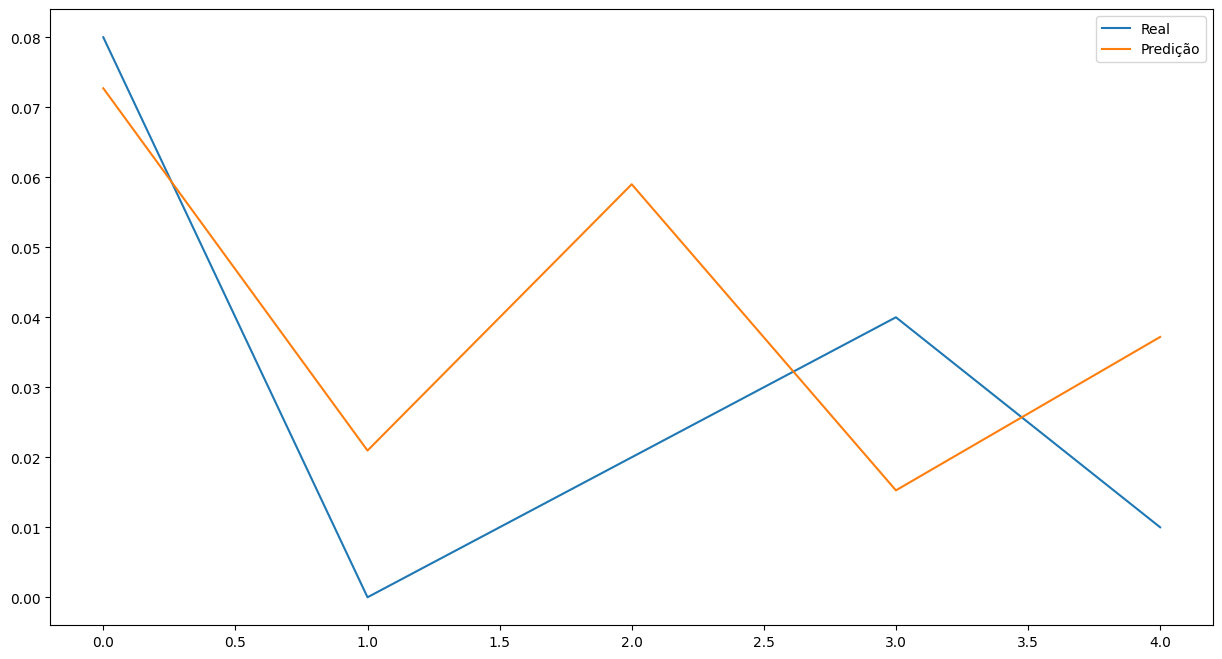

In [ ]:
dbLinear1_NA_OU = dbLinear_NA_OU.head()
dbLinear1_NA_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
lr_NA_OU.coef_

array([0.00230848, 0.02148618, 0.00170676, 0.00421453, 0.03819689])

-----------------------------------------------

**RandomForestRegressor**

In [ ]:
rf_NA_OU = RandomForestRegressor()
rf_NA_OU.fit(x_train_NA_OU , y_train_NA_OU)

RandomForestRegressor()

In [ ]:
rf_NA_OU.score(x_train_NA_OU,y_train_NA_OU)

0.9293323566205386

In [ ]:
rf_NA_OU.score(x_test_NA_OU,y_test_NA_OU)

0.43071397290179736

In [ ]:
yRandomPre_NA_OU = rf_NA_OU.predict(x_test_NA_OU)

In [ ]:
r2Random_NA_OU = r2_score(y_test_NA_OU , yRandomPre_NA_OU)
r2Random_NA_OU

0.43071397290179736

In [ ]:
mae_NA_OU = mean_absolute_error(yRandomPre_NA_OU, y_test_NA_OU)
print('Erro Absoluto Médio '+str(mae_NA_OU))

Erro Absoluto Médio 0.02809158674801751


In [ ]:
dbRandom_NA_OU = pd.DataFrame({'Real': y_test_NA_OU, 'Predição': yRandomPre_NA_OU})
dbRandom_NA_OU

Real  Predição
0     0.08    0.1070
1     0.00    0.0000
2     0.02    0.0334
3     0.04    0.0464
4     0.01    0.0193
...    ...       ...
4068  0.00    0.0026
4069  0.02    0.0158
4070  0.23    0.1588
4071  0.00    0.0000
4072  0.01    0.0138

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

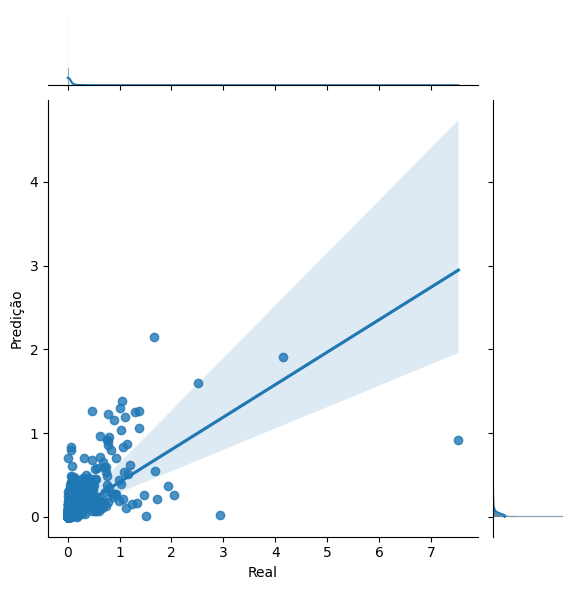

In [ ]:
test_NA_OU = pd.DataFrame({'Predição':yRandomPre_NA_OU,'Real':y_test_NA_OU})
fig= plt.figure(figsize=(16,8))
test_NA_OU = test_NA_OU.reset_index()
test_NA_OU = test_NA_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_OU,kind='reg',);

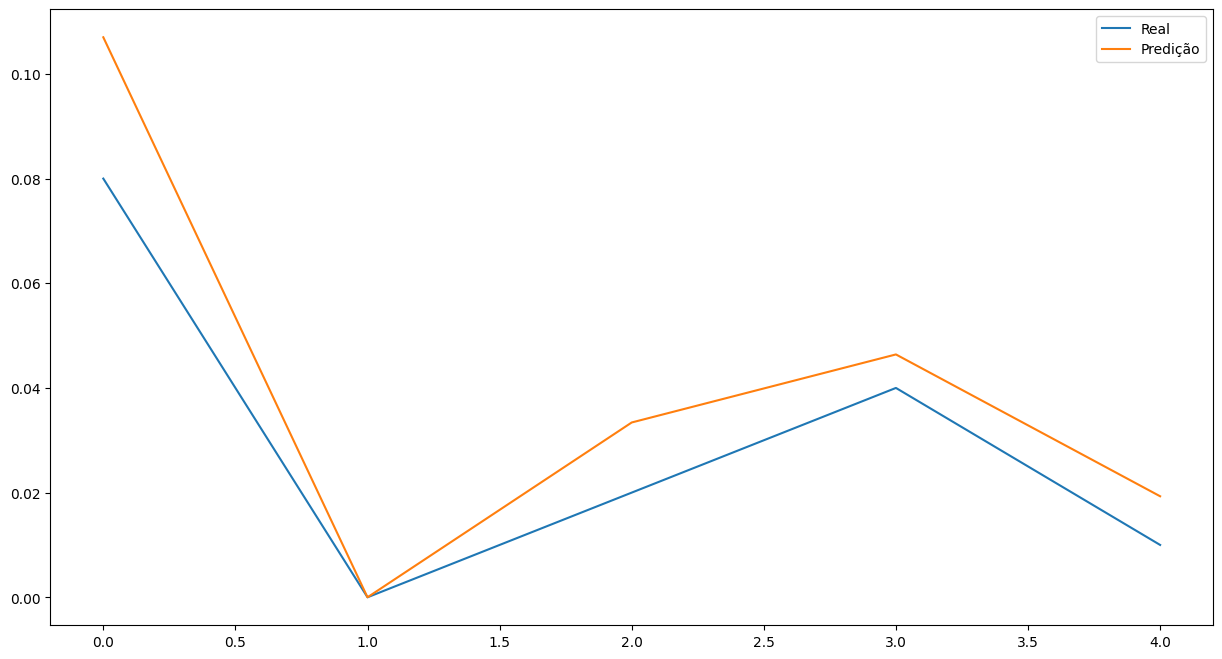

In [ ]:
dbRandom1_NA_OU = dbRandom_NA_OU.head()
dbRandom1_NA_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
rf_NA_OU.feature_importances_

array([0.09420622, 0.14278131, 0.07125195, 0.05141113, 0.64034938])

----------------------------------------------------------------

**KNN**

In [ ]:
knn_NA_OU = KNeighborsRegressor()
knn_NA_OU.fit(x_train_NA_OU, y_train_NA_OU)

KNeighborsRegressor()

In [ ]:
knn_NA_OU.score(x_train_NA_OU,y_train_NA_OU)

0.6079854731781456

In [ ]:
knn_NA_OU.score(x_test_NA_OU , y_test_NA_OU)

0.33159553003446085

In [ ]:
pred_NA_OU = knn_NA_OU.predict(x_test_NA_OU)

r2_knn_NA_OU = r2_score(y_test_NA_OU,pred_NA_OU)
print(r2_knn_NA_OU)

0.33159553003446085


In [ ]:
mae_NA_OU = mean_absolute_error(pred_NA_OU, y_test_NA_OU)
print('Erro Absoluto Médio '+str(mae_NA_OU))

Erro Absoluto Médio 0.031017922906948193


In [ ]:
dbKNN_NA_OU = pd.DataFrame({'Real': y_test_NA_OU, 'Predição': pred_NA_OU})
dbKNN_NA_OU

Real  Predição
0     0.08     0.102
1     0.00     0.000
2     0.02     0.040
3     0.04     0.042
4     0.01     0.042
...    ...       ...
4068  0.00     0.002
4069  0.02     0.012
4070  0.23     0.112
4071  0.00     0.000
4072  0.01     0.022

[4073 rows x 2 columns]

<Figure size 1600x800 with 0 Axes>

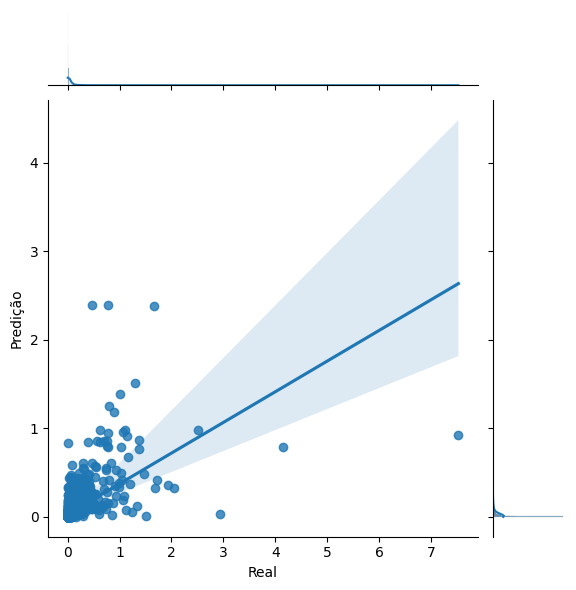

In [ ]:
test_NA_OU = pd.DataFrame({'Predição':pred_NA_OU,'Real':y_test_NA_OU})
fig= plt.figure(figsize=(16,8))
test_NA_OU = test_NA_OU.reset_index()
test_NA_OU = test_NA_OU.drop(['index'],axis=1)
sns.jointplot(x='Real',y='Predição',data=test_NA_OU,kind='reg',);

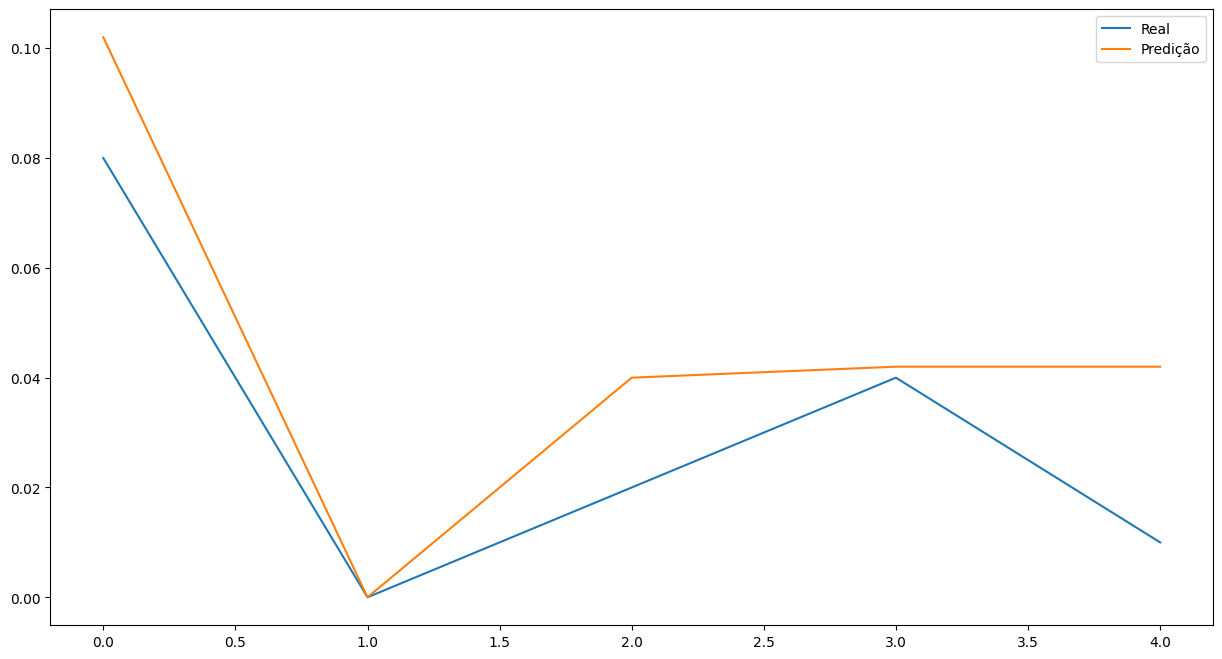

In [ ]:
dbKNN1_NA_OU = dbKNN_NA_OU.head()
dbKNN1_NA_OU.plot(kind='line',figsize=(15,8))
plt.show()

In [ ]:
np.random.seed(1)
m_NA_OU = sm.add_constant(X_NA_OU)
est_NA_OU = sm.OLS(y_NA_OU, m_NA_OU)
est2_NA_OU = est_NA_OU.fit()
print(est2_NA_OU.params)

[-6.19318144e+00  2.79701374e-04  3.08761777e-03  4.96111840e-04
  9.60202844e-06  1.38366277e-01]


--------------------------------------------------------------------------------------

In [ ]:
m_NA_OU = sm.add_constant(X_NA_OU)
est_NA_OU=sm.OLS(y_NA_OU,m_NA_OU)
est2_NA_OU = est_NA_OU.fit()
print(est2_NA_OU.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1711.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:28:57   Log-Likelihood:                 8414.8
No. Observations:               16290   AIC:                        -1.682e+04
Df Residuals:                   16284   BIC:                        -1.677e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1932      0.400    -15.465      0.0

--------------------------------------------------------------------------------------